## 1. i (a)

### Data Munging

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
data = np.genfromtxt("./boston.csv", dtype=np.float32, delimiter=",", names=True)

In [111]:
x1 = np.array([i[0] for i in data])
x2 = np.array([i[1] for i in data])
x3 = np.array([i[2] for i in data])
x4 = np.array([i[3] for i in data])
x5 = np.array([i[4] for i in data])
x6 = np.array([i[5] for i in data])
x7 = np.array([i[6] for i in data])
x8 = np.array([i[7] for i in data])
x9 = np.array([i[8] for i in data])
x10 = np.array([i[9] for i in data])
x11 = np.array([i[10] for i in data])
x12 = np.array([i[11] for i in data])
x13 = np.array([i[12] for i in data])
y = np.array([i[13] for i in data])

In [112]:
x1 = (x1 - x1.mean())/np.std(x1)

### Scaling

In [113]:
x2 = (x2 - x2.mean())/np.std(x2)
x3 = (x3 - x3.mean())/np.std(x3)
x4 = (x4 - x4.mean())/np.std(x4)
x5 = (x5 - x5.mean())/np.std(x5)
x6 = (x6 - x6.mean())/np.std(x6)
x7 = (x7 - x7.mean())/np.std(x7)
x8 = (x8 - x8.mean())/np.std(x8)
x9 = (x9 - x9.mean())/np.std(x9)
x10 = (x10 - x10.mean())/np.std(x10)
x11 = (x11 - x11.mean())/np.std(x11)
x12 = (x12 - x12.mean())/np.std(x12)
x13 = (x13 - x13.mean())/np.std(x13)
y = (y - y.mean())/np.std(y)

### Generate 5-fold sample indices for dataset

In [114]:
m = len(data)
np.random.seed(6754)

In [115]:
full_range = np.array([i for i in range(m)])
validation_choose_set = [i for i in range(m)]

In [116]:
validation_sample1 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample1)
validation_sample2 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample2)
validation_sample3 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample3)
validation_sample4 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample4)

In [117]:
validation_sample5 = validation_choose_set[:]

In [118]:
X = np.column_stack((np.ones(len(x1)), x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13))

### Function for splitting 

In [119]:
def test_train_split(X, y, sample):
    RANGE = len(X)
    train_sample = np.setdiff1d(np.array([i for i in range(RANGE)]), sample)
    test_sample = sample[:]
    X_train = X[train_sample]
    X_test = X[test_sample]
    y_train = y[train_sample]
    y_test = y[test_sample]
    return X_train, X_test, y_train, y_test

### Helper function to compute intermediate values

In [120]:
def input_func(X, y, theta, j):   
    temp = np.zeros(len(X))
    for i in range(len(theta)):
        temp += theta[i]*X[:,i]
        
    return np.matmul((temp - y), X[:,j])

### Linear Regression function

In [121]:
m = len(X_train)

In [131]:
def linear_regression(X_train, y_train, X_test, y_test, learning_rate=0.01):
    
    #init
    n = len(X_train[0])
    m = float(len(X_train))
    theta = np.array([1.5 for i in range(n)])
    number_of_iterations = 0
    train_error = []
    valid_error = []
    y_hat = np.zeros((len(y), 1))
    err = 1000000
    
    #Gradient Descent
    while True:
        print ("=========="*10)
        print ("Iteration: ", number_of_iterations)

        prev_theta = theta[:]

        print ("Previous theta : ", prev_theta)
        number_of_iterations += 1

        # Updating all thetas simultaneously
        for i in range(n):
            theta[i] = theta[i] - (learning_rate/m)*input_func(X_train, y_train, theta, i)


        print("New theta_0 :", theta)

        # Training Error
        y_hat = np.matmul(X_train, theta)
        new_err = np.linalg.norm(y_hat-y_train)/(float(len(X_train)))
        train_error.append(new_err)
        print ("Training Error: ", new_err)


        # Validation error
        y_hat_v = np.matmul(X_test, theta)
        err_valid = np.linalg.norm(y_hat_v-y_test)/(float(len(X_test)))
        valid_error.append(err_valid)

        if (err-new_err) <= 0.000001:
            return train_error, valid_error, theta

        err = new_err

# Running Linear Regression for all folds and creating the graphs

In [132]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample1)
learning_rate = 0.01
train_error1, valid_error1, theta1 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.48479049 1.45726037 1.51952653 1.44879134 1.48829407 1.45025845
 1.52104921 1.45466805 1.53573596 1.44290825 1.4421503  1.46569122
 1.52039123 1.45466105]
Training Error:  0.3366015025033994
Iteration:  1
Previous theta :  [1.48479049 1.45726037 1.51952653 1.44879134 1.48829407 1.45025845
 1.52104921 1.45466805 1.53573596 1.44290825 1.4421503  1.46569122
 1.52039123 1.45466105]
New theta_0 : [1.46979206 1.4167196  1.53705429 1.40056026 1.47666572 1.40347506
 1.54047919 1.41199347 1.56883424 1.38866551 1.38724098 1.43305455
 1.53907406 1.4118564 ]
Training Error:  0.32261173503991925
Iteration:  2
Previous theta :  [1.46979206 1.4167196  1.53705429 1.40056026 1.47666572 1.40347506
 1.54047919 1.41199347 1.56883424 1.38866551 1.38724098 1.43305455
 1.53907406 1.4118564 ]
New theta_0 : [1.45499878 1.37825132 1.5527088  1.35513018 1.4651155  1.35947366
 1.55838834 1.37181703 1.5994545

New theta_0 : [0.93335174 0.66362279 1.41092676 0.64585092 1.01853422 0.69972246
 1.65378361 0.74165781 1.81616571 0.34595928 0.35087529 0.77495118
 1.56555457 0.68541609]
Training Error:  0.1409084182901179
Iteration:  49
Previous theta :  [0.93335174 0.66362279 1.41092676 0.64585092 1.01853422 0.69972246
 1.65378361 0.74165781 1.81616571 0.34595928 0.35087529 0.77495118
 1.56555457 0.68541609]
New theta_0 : [0.9246078  0.65782653 1.40175943 0.64228696 1.01056282 0.69695
 1.65005762 0.73816076 1.81127788 0.33743207 0.34261937 0.76873726
 1.55949187 0.68055763]
Training Error:  0.1399434367688199
Iteration:  50
Previous theta :  [0.9246078  0.65782653 1.40175943 0.64228696 1.01056282 0.69695
 1.65005762 0.73816076 1.81127788 0.33743207 0.34261937 0.76873726
 1.55949187 0.68055763]
New theta_0 : [0.9159506  0.65217988 1.39257512 0.63887027 1.00265858 0.69431475
 1.64627998 0.73478019 1.80629933 0.32911663 0.33456955 0.76263893
 1.55337205 0.6758237 ]
Training Error:  0.13899598671864524

New theta_0 : [0.64860833 0.50766548 1.07044973 0.56541566 0.75313136 0.64353932
 1.49628942 0.64826259 1.60119271 0.1166975  0.12726304 0.58795253
 1.31668823 0.5457234 ]
Training Error:  0.11129015103104285
Iteration:  88
Previous theta :  [0.64860833 0.50766548 1.07044973 0.56541566 0.75313136 0.64353932
 1.49628942 0.64826259 1.60119271 0.1166975  0.12726304 0.58795253
 1.31668823 0.5457234 ]
New theta_0 : [0.6426303  0.50483823 1.0626112  0.56409226 0.74743597 0.64268012
 1.49233629 0.64632744 1.59570919 0.11264792 0.12322319 0.58412064
 1.31046831 0.54278421]
Training Error:  0.11067895288699078
Iteration:  89
Previous theta :  [0.6426303  0.50483823 1.0626112  0.56409226 0.74743597 0.64268012
 1.49233629 0.64632744 1.59570919 0.11264792 0.12322319 0.58412064
 1.31046831 0.54278421]
New theta_0 : [0.63670952 0.50204726 1.0548259  0.56278239 0.74179019 0.64182752
 1.48839783 0.64439685 1.59024467 0.10865945 0.11923818 0.58032067
 1.3042701  0.53985795]
Training Error:  0.110073439

New theta_0 : [ 0.40264975  0.39549235  0.72940246  0.5053766   0.51449926  0.59974424
  1.31183485  0.54869715  1.34476758 -0.03232654 -0.02821049  0.42160113
  1.02637941  0.4032045 ]
Training Error:  0.08581279045951688
Iteration:  140
Previous theta :  [ 0.40264975  0.39549235  0.72940246  0.5053766   0.51449926  0.59974424
  1.31183485  0.54869715  1.34476758 -0.03232654 -0.02821049  0.42160113
  1.02637941  0.4032045 ]
New theta_0 : [ 0.39901584  0.39384808  0.72404449  0.50430717  0.51090379  0.59885273
  1.30869662  0.54677932  1.34040445 -0.03424435 -0.03036451  0.41892936
  1.02148282  0.40061013]
Training Error:  0.08542759934736512
Iteration:  141
Previous theta :  [ 0.39901584  0.39384808  0.72404449  0.50430717  0.51090379  0.59885273
  1.30869662  0.54677932  1.34040445 -0.03424435 -0.03036451  0.41892936
  1.02148282  0.40061013]
New theta_0 : [ 0.39541641  0.39221828  0.71872612  0.50323959  0.50734028  0.59795881
  1.30557241  0.54486199  1.33606099 -0.03613431 -0.032

New theta_0 : [ 0.28118999  0.33939089  0.54307544  0.46397481  0.39308988  0.56249026
  1.1963425   0.47302363  1.18430825 -0.09018673 -0.09766421  0.32626556
  0.84941819  0.30341126]
Training Error:  0.07264532870413891
Iteration:  180
Previous theta :  [ 0.28118999  0.33939089  0.54307544  0.46397481  0.39308988  0.56249026
  1.1963425   0.47302363  1.18430825 -0.09018673 -0.09766421  0.32626556
  0.84941819  0.30341126]
New theta_0 : [ 0.27870593  0.33820403  0.5390786   0.46297568  0.39057904  0.56152591
  1.19369539  0.47117585  1.180633   -0.09120731 -0.0990208   0.32415489
  0.84546553  0.30102564]
Training Error:  0.07236767020300841
Iteration:  181
Previous theta :  [ 0.27870593  0.33820403  0.5390786   0.46297568  0.39057904  0.56152591
  1.19369539  0.47117585  1.180633   -0.09120731 -0.0990208   0.32415489
  0.84546553  0.30102564]
New theta_0 : [ 0.27624532  0.337026    0.53511052  0.46197833  0.38809074  0.5605604
  1.19105889  0.46933098  1.17697255 -0.09221024 -0.1003

Training Error:  0.06325398795377159
Iteration:  219
Previous theta :  [ 0.19979551  0.29881136  0.40659787  0.42635448  0.31018907  0.524284
  1.1003528   0.40347876  1.05106025 -0.11852484 -0.14019707  0.25203419
  0.71040409  0.21458003]
New theta_0 : [ 0.19807733  0.29790379  0.40357193  0.4254267   0.30842469  0.52329487
  1.09807136  0.40177212  1.04789286 -0.11898346 -0.14104309  0.25032955
  0.70722316  0.21241788]
Training Error:  0.06304744864741035
Iteration:  220
Previous theta :  [ 0.19807733  0.29790379  0.40357193  0.4254267   0.30842469  0.52329487
  1.09807136  0.40177212  1.04789286 -0.11898346 -0.14104309  0.25032955
  0.70722316  0.21241788]
New theta_0 : [ 0.19637526  0.2970019   0.40056726  0.42450077  0.30667624  0.52230557
  1.09579816  0.40006968  1.04473682 -0.11943064 -0.14187856  0.24863392
  0.7040601   0.21026156]
Training Error:  0.06284240911162657
Iteration:  221
Previous theta :  [ 0.19637526  0.2970019   0.40056726  0.42450077  0.30667624  0.52230557


Iteration:  257
Previous theta :  [ 0.1446286   0.26783682  0.30531019  0.39240071  0.25322931  0.48672945
  1.01906733  0.34171122  0.93811558 -0.12888065 -0.16576877  0.19309218
  0.60134537  0.13652218]
New theta_0 : [ 0.14342556  0.26710676  0.3029908   0.39154304  0.25198003  0.48574591
  1.01706798  0.34017436  0.93533374 -0.12898298 -0.16628174  0.19168954
  0.59878176  0.1345813 ]
Training Error:  0.05619464303284239
Iteration:  258
Previous theta :  [ 0.14342556  0.26710676  0.3029908   0.39154304  0.25198003  0.48574591
  1.01706798  0.34017436  0.93533374 -0.12898298 -0.16628174  0.19168954
  0.59878176  0.1345813 ]
New theta_0 : [ 0.14223369  0.26638047  0.30068748  0.39068718  0.25074206  0.4847628
  1.01507528  0.33864215  0.9325609  -0.12907784 -0.16678761  0.19029386
  0.59623275  0.13264617]
Training Error:  0.05603753124080565
Iteration:  259
Previous theta :  [ 0.14223369  0.26638047  0.30068748  0.39068718  0.25074206  0.4847628
  1.01507528  0.33864215  0.9325609  

Iteration:  307
Previous theta :  [ 0.09629699  0.23528334  0.20696551  0.35169123  0.20281063  0.43826781
  0.92664452  0.27060778  0.80913672 -0.12632882 -0.18400438  0.13064903
  0.4895499   0.04638009]
New theta_0 : [ 0.09554026  0.23470195  0.2053251   0.35092106  0.20201773  0.437317
  0.92494114  0.26930477  0.80674967 -0.12614636 -0.18423959  0.12954399
  0.48762439  0.04471719]
Training Error:  0.049470326479303335
Iteration:  308
Previous theta :  [ 0.09554026  0.23470195  0.2053251   0.35092106  0.20201773  0.437317
  0.92494114  0.26930477  0.80674967 -0.12614636 -0.18423959  0.12954399
  0.48762439  0.04471719]
New theta_0 : [ 0.09479047  0.23412286  0.203696    0.35015256  0.20123201  0.43636703
  0.92324302  0.26800636  0.80436951 -0.12595976 -0.18447062  0.12844399
  0.48570987  0.0430596 ]
Training Error:  0.049356320658227315
Iteration:  309
Previous theta :  [ 0.09479047  0.23412286  0.203696    0.35015256  0.20123201  0.43636703
  0.92324302  0.26800636  0.80436951 

Training Error:  0.04460810481021053
Iteration:  357
Previous theta :  [ 0.06579448  0.20865781  0.13742889  0.31516203  0.17078842  0.39184604
  0.84749931  0.21096485  0.69761405 -0.11300108 -0.19141795  0.08101207
  0.40556855 -0.03047944]
New theta_0 : [ 0.06531481  0.20816925  0.13627073  0.31447117  0.17028414  0.39094244
  0.84603366  0.20988316  0.6955345  -0.11266377 -0.19149081  0.08012512
  0.40412097 -0.03189087]
Training Error:  0.044522462939120884
Iteration:  358
Previous theta :  [ 0.06531481  0.20816925  0.13627073  0.31447117  0.17028414  0.39094244
  0.84603366  0.20988316  0.6955345  -0.11266377 -0.19149081  0.08012512
  0.40412097 -0.03189087]
New theta_0 : [ 0.06483944  0.20768217  0.13512068  0.31378181  0.16978437  0.39003987
  0.84457231  0.20880568  0.69346041 -0.11232428 -0.19156126  0.0792419
  0.40268158 -0.03329758]
Training Error:  0.0444372978767401
Iteration:  359
Previous theta :  [ 0.06483944  0.20768217  0.13512068  0.31378181  0.16978437  0.39003987

New theta_0 : [ 0.04860476  0.1888553   0.09434438  0.28676493  0.15271762  0.35393686
  0.78816882  0.16811778  0.61286196 -0.09686552 -0.19267639  0.04599985
  0.35015072 -0.08706559]
Training Error:  0.0413169785703828
Iteration:  400
Previous theta :  [ 0.04860476  0.1888553   0.09434438  0.28676493  0.15271762  0.35393686
  0.78816882  0.16811778  0.61286196 -0.09686552 -0.19267639  0.04599985
  0.35015072 -0.08706559]
New theta_0 : [ 0.04827818  0.18842116  0.09349166  0.28613539  0.15237447  0.35307869
  0.78687452  0.16720726  0.6109983  -0.09645821 -0.19266705  0.04525591
  0.3490146  -0.08828551]
Training Error:  0.041249068319703375
Iteration:  401
Previous theta :  [ 0.04827818  0.18842116  0.09349166  0.28613539  0.15237447  0.35307869
  0.78687452  0.16720726  0.6109983  -0.09645821 -0.19266705  0.04525591
  0.3490146  -0.08828551]
New theta_0 : [ 0.04795448  0.18798809  0.09264509  0.2855072   0.15203437  0.3522216
  0.78558391  0.16630049  0.60913922 -0.09604976 -0.1926

Training Error:  0.038579653751888904
Iteration:  445
Previous theta :  [ 0.03641065  0.17028878  0.06154716  0.25973121  0.13991871  0.31639191
  0.73340612  0.13069043  0.53331137 -0.07765895 -0.19104697  0.01522094
  0.3047823  -0.13800148]
New theta_0 : [ 0.03619024  0.16989673  0.06093625  0.25915952  0.1396877   0.31558252
  0.73226615  0.12993725  0.5316385  -0.07721705 -0.19098769  0.01459491
  0.30389628 -0.13904558]
Training Error:  0.03852554409075966
Iteration:  446
Previous theta :  [ 0.03619024  0.16989673  0.06093625  0.25915952  0.1396877   0.31558252
  0.73226615  0.12993725  0.5316385  -0.07721705 -0.19098769  0.01459491
  0.30389628 -0.13904558]
New theta_0 : [ 0.03597172  0.16950548  0.06032997  0.25858904  0.13945869  0.31477421
  0.73112937  0.12918731  0.52996953 -0.0767747  -0.19092761  0.01397119
  0.30301508 -0.14008604]
Training Error:  0.03847169838664922
Iteration:  447
Previous theta :  [ 0.03597172  0.16950548  0.06032997  0.25858904  0.13945869  0.314774

New theta_0 : [ 0.02891218  0.15520005  0.04046144  0.23778594  0.13206765  0.28485523
  0.69019218  0.10298429  0.46931434 -0.05974355 -0.18815527 -0.00811979
  0.27283001 -0.17704602]
Training Error:  0.0366061400287862
Iteration:  485
Previous theta :  [ 0.02891218  0.15520005  0.04046144  0.23778594  0.13206765  0.28485523
  0.69019218  0.10298429  0.46931434 -0.05974355 -0.18815527 -0.00811979
  0.27283001 -0.17704602]
New theta_0 : [ 0.02875537  0.15483743  0.04001541  0.23726082  0.13190362  0.2840887
  0.68917196  0.10235235  0.4677878  -0.05929203 -0.1880719  -0.00866144
  0.27211579 -0.17795374]
Training Error:  0.03656143312456104
Iteration:  486
Previous theta :  [ 0.02875537  0.15483743  0.04001541  0.23726082  0.13190362  0.2840887
  0.68917196  0.10235235  0.4677878  -0.05929203 -0.1880719  -0.00866144
  0.27211579 -0.17795374]
New theta_0 : [ 0.02859987  0.15447547  0.03957301  0.23673681  0.13174098  0.28332323
  0.68815455  0.10172323  0.46626469 -0.05884046 -0.187988

Iteration:  529
Previous theta :  [ 0.02310885  0.13983867  0.0239888   0.21569926  0.12599774  0.25211658
  0.64784985  0.07770918  0.40524715 -0.03991482 -0.18418159 -0.03026241
  0.24470154 -0.21411202]
New theta_0 : [ 0.0229998   0.13950288  0.02368297  0.21522074  0.12588359  0.25139573
  0.64694549  0.0771917   0.40386161 -0.03946708 -0.18408606 -0.03072808
  0.24413407 -0.21488942]
Training Error:  0.03478406379803552
Iteration:  530
Previous theta :  [ 0.0229998   0.13950288  0.02368297  0.21522074  0.12588359  0.25139573
  0.64694549  0.0771917   0.40386161 -0.03946708 -0.18408606 -0.03072808
  0.24413407 -0.21488942]
New theta_0 : [ 0.02289164  0.13916765  0.0233799   0.21474323  0.12577036  0.25067588
  0.64604359  0.0766766   0.40247907 -0.03901955 -0.18399039 -0.0311922
  0.24356949 -0.21566408]
Training Error:  0.034747625290068855
Iteration:  531
Previous theta :  [ 0.02289164  0.13916765  0.0233799   0.21474323  0.12577036  0.25067588
  0.64604359  0.0766766   0.4024790

Training Error:  0.03305622872083531
Iteration:  583
Previous theta :  [ 0.01830702  0.12246352  0.0110464   0.19124869  0.12095356  0.21461613
  0.60236066  0.05295833  0.33450964 -0.01613741 -0.17891871 -0.0533424
  0.21781662 -0.2523983 ]
New theta_0 : [ 0.01823592  0.12215555  0.01086822  0.1908216   0.12087837  0.21394852
  0.60157925  0.05255711  0.33327429 -0.01570645 -0.17882107 -0.05373306
  0.21738367 -0.25304067]
Training Error:  0.033027261197653125
Iteration:  584
Previous theta :  [ 0.01823592  0.12215555  0.01086822  0.1908216   0.12087837  0.21394852
  0.60157925  0.05255711  0.33327429 -0.01570645 -0.17882107 -0.05373306
  0.21738367 -0.25304067]
New theta_0 : [ 0.01816537  0.12184806  0.01069202  0.19039541  0.12080373  0.21328186
  0.60079994  0.05215782  0.33204152 -0.01527589 -0.17872349 -0.05412248
  0.21695283 -0.25368077]
Training Error:  0.032998415842177754
Iteration:  585
Previous theta :  [ 0.01816537  0.12184806  0.01069202  0.19039541  0.12080373  0.213281

Training Error:  0.03174625493710328
Iteration:  633
Previous theta :  [ 0.01533816  0.10762593  0.00434863  0.17095908  0.11778278  0.18238087
  0.56574461  0.0351081   0.27577065  0.00489109 -0.17414767 -0.07145881
  0.19852518 -0.28189151]
New theta_0 : [ 0.01528936  0.10734042  0.00425619  0.17057471  0.11772989  0.18175951
  0.56506097  0.03479404  0.27465626  0.00530017 -0.17405542 -0.07179356
  0.19818386 -0.28242988]
Training Error:  0.03172270998168845
Iteration:  634
Previous theta :  [ 0.01528936  0.10734042  0.00425619  0.17057471  0.11772989  0.18175951
  0.56506097  0.03479404  0.27465626  0.00530017 -0.17405542 -0.07179356
  0.19818386 -0.28242988]
New theta_0 : [ 0.01524092  0.10705533  0.0041652   0.17019115  0.11767734  0.18113903
  0.56437913  0.03448155  0.27354413  0.00570877 -0.17396332 -0.0721273
  0.19784412 -0.28296636]
Training Error:  0.03169926057634219
Iteration:  635
Previous theta :  [ 0.01524092  0.10705533  0.0041652   0.17019115  0.11767734  0.18113903

Training Error:  0.030736001257817464
Iteration:  680
Previous theta :  [ 0.01338563  0.09465292  0.00143983  0.15374455  0.11562928  0.15412423
  0.53549205  0.0219358   0.22575507  0.02359298 -0.16999854 -0.08616173
  0.18404867 -0.30525111]
New theta_0 : [ 0.01335073  0.09438651  0.0014068   0.1533966   0.11558988  0.15354362
  0.53488824  0.02168853  0.22474136  0.02397901 -0.16991481 -0.086453
  0.18377245 -0.30570733]
Training Error:  0.030716495303905144
Iteration:  681
Previous theta :  [ 0.01335073  0.09438651  0.0014068   0.1533966   0.11558988  0.15354362
  0.53488824  0.02168853  0.22474136  0.02397901 -0.16991481 -0.086453
  0.18377245 -0.30570733]
New theta_0 : [ 0.01331608  0.0941205   0.00137486  0.15304938  0.1155507   0.15296385
  0.53428603  0.02144253  0.22372967  0.02436454 -0.16983127 -0.08674343
  0.18349744 -0.30616195]
Training Error:  0.030697066109785672
Iteration:  682
Previous theta :  [ 0.01331608  0.0941205   0.00137486  0.15304938  0.1155507   0.15296385

Training Error:  0.02988063023945566
Iteration:  728
Previous theta :  [ 0.01195195  0.08229402  0.00096007  0.13785112  0.11396567  0.12718187
  0.50822011  0.0114179   0.17929642  0.04155323 -0.16621904 -0.09924162
  0.17204109 -0.32543944]
New theta_0 : [ 0.0119267   0.08204561  0.00097168  0.13753703  0.11393532  0.12664026
  0.50768743  0.01122614  0.17837455  0.04191502 -0.16614569 -0.09949564
  0.1718158  -0.32582497]
Training Error:  0.029864446796843476
Iteration:  729
Previous theta :  [ 0.0119267   0.08204561  0.00097168  0.13753703  0.11393532  0.12664026
  0.50768743  0.01122614  0.17837455  0.04191502 -0.16614569 -0.09949564
  0.1718158  -0.32582497]
New theta_0 : [ 0.0119016   0.08179757  0.00098408  0.13722361  0.11390512  0.12609943
  0.50715613  0.01103541  0.1774545   0.04227631 -0.16607256 -0.09974895
  0.17159144 -0.32620915]
Training Error:  0.029848325357688447
Iteration:  730
Previous theta :  [ 0.0119016   0.08179757  0.00098408  0.13722361  0.11390512  0.12609

Iteration:  769
Previous theta :  [ 0.01103851  0.07239983  0.00202783  0.12551098  0.11283316  0.10560799
  0.4874711   0.0043583   0.14293978  0.05597607 -0.16339847 -0.10909971
  0.16351214 -0.34019217]
New theta_0 : [ 0.01101904  0.0721658   0.00206766  0.12522341  0.1128081   0.10509768
  0.48699189  0.00420544  0.14208879  0.05631742 -0.16333449 -0.10932656
  0.16332097 -0.3405263 ]
Training Error:  0.029251369891296636
Iteration:  770
Previous theta :  [ 0.01101904  0.0721658   0.00206766  0.12522341  0.1128081   0.10509768
  0.48699189  0.00420544  0.14208879  0.05631742 -0.16333449 -0.10932656
  0.16332097 -0.3405263 ]
New theta_0 : [ 0.0109997   0.07193211  0.00210808  0.12493647  0.11278314  0.10458811
  0.48651391  0.00405345  0.14123945  0.05665827 -0.16327074 -0.10955278
  0.16313054 -0.34085928]
Training Error:  0.029237573953970915
Iteration:  771
Previous theta :  [ 0.0109997   0.07193211  0.00210808  0.12493647  0.11278314  0.10458811
  0.48651391  0.00405345  0.14123

Previous theta :  [ 0.010376    0.0637421   0.00392367  0.11501007  0.11194991  0.08672861
  0.47009562 -0.00087596  0.11173161  0.06860505 -0.16112837 -0.11730345
  0.15673835 -0.35210736]
New theta_0 : [ 0.01036051  0.06352069  0.00398323  0.11474528  0.11192841  0.08624574
  0.46966069 -0.00099867  0.11094082  0.06892802 -0.16107308 -0.11750827
  0.15657284 -0.3524002 ]
Training Error:  0.02876178749700919
Iteration:  808
Previous theta :  [ 0.01036051  0.06352069  0.00398323  0.11474528  0.11192841  0.08624574
  0.46966069 -0.00099867  0.11094082  0.06892802 -0.16107308 -0.11750827
  0.15657284 -0.3524002 ]
New theta_0 : [ 0.01034512  0.06329959  0.00404323  0.11448107  0.11190698  0.08576358
  0.46922687 -0.00112066  0.11015154  0.06925051 -0.16101801 -0.11771255
  0.15640794 -0.35269202]
Training Error:  0.02874981605650841
Iteration:  809
Previous theta :  [ 0.01034512  0.06329959  0.00404323  0.11448107  0.11190698  0.08576358
  0.46922687 -0.00112066  0.11015154  0.06925051 -0

Iteration:  862
Previous theta :  [ 0.00964296  0.05203311  0.00778123  0.10127532  0.11087211  0.06118904
  0.44773278 -0.00663236  0.07040973  0.0856794  -0.15841758 -0.12780736
  0.14846581 -0.36680194]
New theta_0 : [ 0.0096316   0.05182885  0.00786084  0.10104068  0.11085425  0.06074339
  0.44735408 -0.00671984  0.06969781  0.08597715 -0.1583744  -0.12798481
  0.14832969 -0.3670442 ]
Training Error:  0.02816461128593723
Iteration:  863
Previous theta :  [ 0.0096316   0.05182885  0.00786084  0.10104068  0.11085425  0.06074339
  0.44735408 -0.00671984  0.06969781  0.08597715 -0.1583744  -0.12798481
  0.14832969 -0.3670442 ]
New theta_0 : [ 0.00962029  0.0516249   0.00794073  0.10080656  0.11083644  0.06029839
  0.44697632 -0.00680676  0.06898724  0.08627446 -0.15833143 -0.12816181
  0.14819404 -0.36728563]
Training Error:  0.02815482646424321
Iteration:  864
Previous theta :  [ 0.00962029  0.0516249   0.00794073  0.10080656  0.11083644  0.06029839
  0.44697632 -0.00680676  0.0689872

New theta_0 : [ 0.00911621  0.04161283  0.0123411   0.08953173  0.10999247  0.03844467
  0.42890258 -0.01055592  0.03447576  0.1008663  -0.15641495 -0.13661871
  0.14184284 -0.37856429]
Training Error:  0.027699910474316462
Iteration:  915
Previous theta :  [ 0.00911621  0.04161283  0.0123411   0.08953173  0.10999247  0.03844467
  0.42890258 -0.01055592  0.03447576  0.1008663  -0.15641495 -0.13661871
  0.14184284 -0.37856429]
New theta_0 : [ 0.00910758  0.04142399  0.01243278  0.08932327  0.10997705  0.03803226
  0.42857044 -0.01061712  0.03383173  0.10114151 -0.15638261 -0.13677395
  0.14172854 -0.37876641]
Training Error:  0.027691797898759238
Iteration:  916
Previous theta :  [ 0.00910758  0.04142399  0.01243278  0.08932327  0.10997705  0.03803226
  0.42857044 -0.01061712  0.03383173  0.10114151 -0.15638261 -0.13677395
  0.14172854 -0.37876641]
New theta_0 : [ 0.009099    0.04123542  0.01252464  0.08911527  0.10996167  0.03762045
  0.42823911 -0.01067788  0.0331889   0.10141632 -0.1

Training Error:  0.027334508021508722
Iteration:  964
Previous theta :  [ 0.00873939  0.03268295  0.01700535  0.07985113  0.10927872  0.01893098
  0.41354493 -0.01308101  0.00429789  0.11388383 -0.15505352 -0.1437941
  0.1366395  -0.38770392]
New theta_0 : [ 0.00873258  0.03250744  0.01710353  0.07966457  0.10926497  0.01854717
  0.41325015 -0.01312326  0.00371039  0.11413981 -0.15503033 -0.1439318
  0.13654117 -0.38787511]
Training Error:  0.027327692421632844
Iteration:  965
Previous theta :  [ 0.00873258  0.03250744  0.01710353  0.07966457  0.10926497  0.01854717
  0.41325015 -0.01312326  0.00371039  0.11413981 -0.15503033 -0.1439318
  0.13654117 -0.38787511]
New theta_0 : [ 0.00872579  0.03233219  0.01720181  0.07947843  0.10925125  0.01816392
  0.41295608 -0.01316516  0.00312399  0.11439541 -0.15500732 -0.14406917
  0.13644313 -0.38804573]
Training Error:  0.02732090086296747
Iteration:  966
Previous theta :  [ 0.00872579  0.03233219  0.01720181  0.07947843  0.10925125  0.01816392

New theta_0 : [ 0.00850116  0.02619586  0.02079186  0.07305401  0.10877611  0.00473582
  0.40282724 -0.01446051 -0.01727405  0.12335162 -0.15429416 -0.14880185
  0.13309788 -0.3938208 ]
Training Error:  0.027091681242008718
Iteration:  1002
Previous theta :  [ 0.00850116  0.02619586  0.02079186  0.07305401  0.10877611  0.00473582
  0.40282724 -0.01446051 -0.01727405  0.12335162 -0.15429416 -0.14880185
  0.13309788 -0.3938208 ]
New theta_0 : [ 0.00849542  0.02603012  0.02089274  0.07288304  0.10876341  0.00437288
  0.40255817 -0.01449094 -0.01782137  0.12359373 -0.15427747 -0.14892762
  0.1330098  -0.39397146]
Training Error:  0.027085718763421782
Iteration:  1003
Previous theta :  [ 0.00849542  0.02603012  0.02089274  0.07288304  0.10876341  0.00437288
  0.40255817 -0.01449094 -0.01782137  0.12359373 -0.15427747 -0.14892762
  0.1330098  -0.39397146]
New theta_0 : [ 0.0084897   0.02586463  0.02099367  0.07271247  0.10875073  0.00401047
  0.40228973 -0.01452108 -0.01836767  0.12383549 -0

Training Error:  0.026768354590721015
Iteration:  1062
Previous theta :  [ 0.00819657  0.01668357  0.02689513  0.0634686   0.10805492 -0.0161202
  0.38776054 -0.01583479 -0.04838046  0.13727416 -0.15356966 -0.15585209
  0.12822138 -0.40202657]
New theta_0 : [ 0.00819211  0.01653228  0.02699716  0.06331998  0.10804355 -0.01645238
  0.38752702 -0.01585069 -0.04887019  0.13749615 -0.15356215 -0.15596153
  0.12814661 -0.40214994]
Training Error:  0.02676351696324428
Iteration:  1063
Previous theta :  [ 0.00819211  0.01653228  0.02699716  0.06331998  0.10804355 -0.01645238
  0.38752702 -0.01585069 -0.04887019  0.13749615 -0.15356215 -0.15596153
  0.12814661 -0.40214994]
New theta_0 : [ 0.00818766  0.01638123  0.02709919  0.06317171  0.10803221 -0.01678407
  0.38729406 -0.01586638 -0.04935902  0.13771782 -0.15355478 -0.15607072
  0.12807203 -0.4022729 ]
Training Error:  0.026758696067435653
Iteration:  1064
Previous theta :  [ 0.00818766  0.01638123  0.02709919  0.06317171  0.10803221 -0.016

Training Error:  0.026529629349328402
Iteration:  1116
Previous theta :  [ 0.00797868  0.00883702  0.03237811  0.055927    0.10746834 -0.03337201
  0.37589677 -0.01642513 -0.0735754   0.14882091 -0.15335895 -0.16142214
  0.12444721 -0.40813845]
New theta_0 : [ 0.00797505  0.00869777  0.03247882  0.05579631  0.10745797 -0.03367863
  0.37569074 -0.01643139 -0.07401876  0.14902654 -0.15335863 -0.16151908
  0.12438207 -0.40824171]
Training Error:  0.026525613791397055
Iteration:  1117
Previous theta :  [ 0.00797505  0.00869777  0.03247882  0.05579631  0.10745797 -0.03367863
  0.37569074 -0.01643139 -0.07401876  0.14902654 -0.15335863 -0.16151908
  0.12438207 -0.40824171]
New theta_0 : [ 0.00797143  0.00855873  0.03257948  0.05566593  0.10744761 -0.03398481
  0.37548518 -0.0164375  -0.07446132  0.14923187 -0.15335844 -0.16161582
  0.12431709 -0.40834463]
Training Error:  0.026521611997062752
Iteration:  1118
Previous theta :  [ 0.00797143  0.00855873  0.03257948  0.05566593  0.10744761 -0.0

New theta_0 : [ 0.00778818  0.00110612  0.03813726  0.04884624  0.10689325 -0.05042361
  0.36469171 -0.01656064 -0.09799237  0.16028591 -0.15353623 -0.16670882
  0.12091927 -0.41360346]
Training Error:  0.026318031680729905
Iteration:  1174
Previous theta :  [ 0.00778818  0.00110612  0.03813726  0.04884624  0.10689325 -0.05042361
  0.36469171 -0.01656064 -0.09799237  0.16028591 -0.15353623 -0.16670882
  0.12091927 -0.41360346]
New theta_0 : [ 0.00778522  0.00097884  0.03823485  0.04873272  0.10688378 -0.05070488
  0.36451115 -0.01655935 -0.09839102  0.16047563 -0.1535426  -0.16679428
  0.12086263 -0.41368894]
Training Error:  0.026314738313347533
Iteration:  1175
Previous theta :  [ 0.00778522  0.00097884  0.03823485  0.04873272  0.10688378 -0.05070488
  0.36451115 -0.01655935 -0.09839102  0.16047563 -0.1535426  -0.16679428
  0.12086263 -0.41368894]
New theta_0 : [ 0.00778227  0.00085175  0.03833237  0.04861948  0.10687433 -0.05098573
  0.36433101 -0.01655794 -0.09878895  0.16066509 -0

Training Error:  0.02617191319049281
Iteration:  1222
Previous theta :  [ 0.00765649 -0.0047854   0.04274251  0.04370174  0.10645458 -0.0634617
  0.35646633 -0.01638592 -0.11632997  0.16910707 -0.15395762 -0.17061308
  0.11834315 -0.41741052]
New theta_0 : [ 0.00765396 -0.00490351  0.04283663  0.04360095  0.10644577 -0.0637235
  0.35630416 -0.01638006 -0.11669519  0.16928482 -0.1539688  -0.1706903
  0.11829243 -0.41748375]
Training Error:  0.026169114612349127
Iteration:  1223
Previous theta :  [ 0.00765396 -0.00490351  0.04283663  0.04360095  0.10644577 -0.0637235
  0.35630416 -0.01638006 -0.11669519  0.16928482 -0.1539688  -0.1706903
  0.11829243 -0.41748375]
New theta_0 : [ 0.00765143 -0.00502143  0.04293067  0.04350042  0.10643697 -0.06398491
  0.35614236 -0.01637413 -0.11705974  0.16946233 -0.15398007 -0.17076736
  0.11824182 -0.41755674]
Training Error:  0.026166325476770662
Iteration:  1224
Previous theta :  [ 0.00765143 -0.00502143  0.04293067  0.04350042  0.10643697 -0.0639849

Training Error:  0.026042927959059086
Iteration:  1272
Previous theta :  [ 0.00753878 -0.0104697   0.04734779  0.03896095  0.10602936 -0.07608279
  0.34878117 -0.01600348 -0.13380076  0.17771023 -0.15462586 -0.17428532
  0.11594031 -0.42080001]
New theta_0 : [ 0.0075366  -0.0105789   0.04743773  0.03887214  0.10602117 -0.07632568
  0.34863591 -0.01599416 -0.13413423  0.17787655 -0.15464139 -0.174355
  0.1158949  -0.42086245]
Training Error:  0.02604056313197228
Iteration:  1273
Previous theta :  [ 0.0075366  -0.0105789   0.04743773  0.03887214  0.10602117 -0.07632568
  0.34863591 -0.01599416 -0.13413423  0.17787655 -0.15464139 -0.174355
  0.1158949  -0.42086245]
New theta_0 : [ 0.00753442 -0.01068792  0.04752758  0.03878354  0.10601298 -0.0765682
  0.34849097 -0.01598478 -0.1344671   0.17804265 -0.15465701 -0.17442454
  0.11584958 -0.42092469]
Training Error:  0.026038206228194694
Iteration:  1274
Previous theta :  [ 0.00753442 -0.01068792  0.04752758  0.03878354  0.10601298 -0.0765682

Training Error:  0.025921968482852376
Iteration:  1328
Previous theta :  [ 0.00742561 -0.01632724  0.052246    0.03432307  0.10558755 -0.08913722
  0.34111381 -0.01540254 -0.15157432  0.18669781 -0.15561427 -0.1779796
  0.1135414  -0.42401004]
New theta_0 : [ 0.00742374 -0.01642721  0.05233086  0.03424622  0.10557997 -0.08936047
  0.34098514 -0.01539054 -0.1518756   0.18685246 -0.15563399 -0.1780419
  0.1135011  -0.42406239]
Training Error:  0.025920007423167732
Iteration:  1329
Previous theta :  [ 0.00742374 -0.01642721  0.05233086  0.03424622  0.10557997 -0.08936047
  0.34098514 -0.01539054 -0.1518756   0.18685246 -0.15563399 -0.1780419
  0.1135011  -0.42406239]
New theta_0 : [ 0.00742188 -0.01652701  0.05241562  0.03416958  0.1055724  -0.08958339
  0.34085676 -0.01537849 -0.15217634  0.18700691 -0.15565378 -0.17810408
  0.11346088 -0.42411457]
Training Error:  0.025918052882624092
Iteration:  1330
Previous theta :  [ 0.00742188 -0.01652701  0.05241562  0.03416958  0.1055724  -0.0895

New theta_0 : [ 0.0073297  -0.02159688  0.05677352  0.03038388  0.1051854  -0.10092893
  0.3344299  -0.01469313 -0.16736183  0.19491794 -0.15679563 -0.18123181
  0.11144448 -0.42665982]
Training Error:  0.025823225069570688
Iteration:  1383
Previous theta :  [ 0.0073297  -0.02159688  0.05677352  0.03038388  0.1051854  -0.10092893
  0.3344299  -0.01469313 -0.16736183  0.19491794 -0.15679563 -0.18123181
  0.11144448 -0.42665982]
New theta_0 : [ 0.00732808 -0.0216885   0.05685319  0.03031747  0.10517836 -0.10113438
  0.33431545 -0.01467944 -0.16763461  0.19506218 -0.15681883 -0.1812878
  0.11140851 -0.42670393]
Training Error:  0.025821591040917018
Iteration:  1384
Previous theta :  [ 0.00732808 -0.0216885   0.05685319  0.03031747  0.10517836 -0.10113438
  0.33431545 -0.01467944 -0.16763461  0.19506218 -0.15681883 -0.1812878
  0.11140851 -0.42670393]
New theta_0 : [ 0.00732646 -0.02177998  0.05693276  0.03025123  0.10517132 -0.10133952
  0.33420125 -0.01466573 -0.16790689  0.19520624 -0.1

  0.10973192 -0.42870755]
New theta_0 : [ 0.00725161 -0.02608881  0.06071544  0.02721612  0.10483783 -0.11101972
  0.32888923 -0.01396945 -0.18066481  0.20205037 -0.15804895 -0.18395575
  0.10969939 -0.42874539]
Training Error:  0.02574639040025119
Iteration:  1434
Previous theta :  [ 0.00725161 -0.02608881  0.06071544  0.02721612  0.10483783 -0.11101972
  0.32888923 -0.01396945 -0.18066481  0.20205037 -0.15804895 -0.18395575
  0.10969939 -0.42874539]
New theta_0 : [ 0.00725017 -0.0261733   0.06079026  0.02715832  0.10483125 -0.11120988
  0.32878638 -0.01395483 -0.18091363  0.20218579 -0.15807487 -0.18400658
  0.10966693 -0.42878312]
Training Error:  0.0257450088770184
Iteration:  1435
Previous theta :  [ 0.00725017 -0.0261733   0.06079026  0.02715832  0.10483125 -0.11120988
  0.32878638 -0.01395483 -0.18091363  0.20218579 -0.15807487 -0.18400658
  0.10966693 -0.42878312]
New theta_0 : [ 0.00724873 -0.02625765  0.06086499  0.02710067  0.10482467 -0.11139975
  0.32868375 -0.01394019 -0.

New theta_0 : [ 0.00719772 -0.02928598  0.0635638   0.02507671  0.10458707 -0.1182258
  0.32503211 -0.01339096 -0.19004439  0.20721146 -0.1590951  -0.18586999
  0.1084797  -0.43013503]
Training Error:  0.025695724575424465
Iteration:  1473
Previous theta :  [ 0.00719772 -0.02928598  0.0635638   0.02507671  0.10458707 -0.1182258
  0.32503211 -0.01339096 -0.19004439  0.20721146 -0.1590951  -0.18586999
  0.1084797  -0.43013503]
New theta_0 : [ 0.0071964  -0.02936538  0.06363496  0.02502487  0.10458081 -0.118405
  0.32493723 -0.01337594 -0.19027635  0.20734062 -0.15912283 -0.18591728
  0.10844964 -0.43016854]
Training Error:  0.025694508413215626
Iteration:  1474
Previous theta :  [ 0.0071964  -0.02936538  0.06363496  0.02502487  0.10458081 -0.118405
  0.32493723 -0.01337594 -0.19027635  0.20734062 -0.15912283 -0.18591728
  0.10844964 -0.43016854]
New theta_0 : [ 0.00719508 -0.02944464  0.06370603  0.02497317  0.10457455 -0.11858394
  0.32484255 -0.01336092 -0.19050789  0.20746962 -0.15915

New theta_0 : [ 0.00713969 -0.03281001  0.06674144  0.02283828  0.1043067  -0.12619308
  0.32086287 -0.01269492 -0.20029459  0.21299601 -0.16041298 -0.18795856
  0.10715594 -0.43157732]
Training Error:  0.02564367869481006
Iteration:  1519
Previous theta :  [ 0.00713969 -0.03281001  0.06674144  0.02283828  0.1043067  -0.12619308
  0.32086287 -0.01269492 -0.20029459  0.21299601 -0.16041298 -0.18795856
  0.10715594 -0.43157732]
New theta_0 : [ 0.00713848 -0.03288379  0.06680837  0.02279283  0.10430078 -0.12636015
  0.3207765  -0.01267971 -0.20050816  0.21311829 -0.16044255 -0.18800206
  0.10712845 -0.43160652]
Training Error:  0.02564263125234649
Iteration:  1520
Previous theta :  [ 0.00713848 -0.03288379  0.06680837  0.02279283  0.10430078 -0.12636015
  0.3207765  -0.01267971 -0.20050816  0.21311829 -0.16044255 -0.18800206
  0.10712845 -0.43160652]
New theta_0 : [ 0.00713728 -0.03295744  0.0668752   0.02274751  0.10429487 -0.12652696
  0.32069031 -0.0126645  -0.20072134  0.21324042 -0.1

Text(0.5,1,'First Sample')

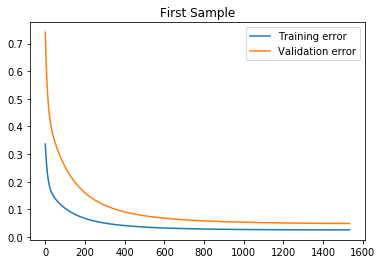

In [135]:
plt.plot([i for i in range(len(train_error1))], train_error1, label='Training error')
plt.plot([i for i in range(len(valid_error1))], valid_error1, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('First Sample')

In [136]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample2)
learning_rate = 0.01
train_error2, valid_error2, theta2 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.48489751 1.45253084 1.52259206 1.44617062 1.48638409 1.44835481
 1.51909791 1.45343059 1.53647155 1.44031168 1.43893424 1.46137132
 1.51980939 1.45280659]
Training Error:  0.34964979372237864
Iteration:  1
Previous theta :  [1.48489751 1.45253084 1.52259206 1.44617062 1.48638409 1.44835481
 1.51909791 1.45343059 1.53647155 1.44031168 1.43893424 1.46137132
 1.51980939 1.45280659]
New theta_0 : [1.46987302 1.40752625 1.54277077 1.39560162 1.47298466 1.39993081
 1.53659324 1.40973599 1.57004139 1.38368642 1.38104487 1.42472773
 1.53783668 1.40840837]
Training Error:  0.33474227642852544
Iteration:  2
Previous theta :  [1.46987302 1.40752625 1.54277077 1.39560162 1.47298466 1.39993081
 1.53659324 1.40973599 1.57004139 1.38368642 1.38104487 1.42472773
 1.53783668 1.40840837]
New theta_0 : [1.45493088 1.36483969 1.56069584 1.34809064 1.45979296 1.35452676
 1.55258906 1.36873521 1.600894

New theta_0 : [0.86491815 0.5491164  1.36969416 0.61948541 0.97873789 0.69566891
 1.59274803 0.74565596 1.75139963 0.28852743 0.27347187 0.70040287
 1.51057673 0.68849634]
Training Error:  0.14135368797452022
Iteration:  51
Previous theta :  [0.86491815 0.5491164  1.36969416 0.61948541 0.97873789 0.69566891
 1.59274803 0.74565596 1.75139963 0.28852743 0.27347187 0.70040287
 1.51057673 0.68849634]
New theta_0 : [0.85531157 0.54264313 1.35952014 0.61618254 0.97087765 0.69334062
 1.58868239 0.74256148 1.7453244  0.28008073 0.26495802 0.69419324
 1.50380965 0.68447292]
Training Error:  0.1402927884826689
Iteration:  52
Previous theta :  [0.85531157 0.54264313 1.35952014 0.61618254 0.97087765 0.69334062
 1.58868239 0.74256148 1.7453244  0.28008073 0.26495802 0.69419324
 1.50380965 0.68447292]
New theta_0 : [0.84580453 0.53632317 1.34935851 0.61300427 0.96308411 0.6911221
 1.58459303 0.73955535 1.73919336 0.27183277 0.25663789 0.68809646
 1.49700574 0.68055386]
Training Error:  0.13924864860

Training Error:  0.10461930046027294
Iteration:  96
Previous theta :  [0.51907954 0.35331039 0.95960335 0.53142341 0.6830593  0.63913559
 1.4131227  0.64262324 1.47320029 0.03529235 0.01153157 0.49035308
 1.20542644 0.55784343]
New theta_0 : [0.51312448 0.35036233 0.9519297  0.53006546 0.67767677 0.63823979
 1.40950739 0.64055658 1.46749217 0.03159551 0.00751558 0.48670644
 1.1990887  0.55543917]
Training Error:  0.10399044483212198
Iteration:  97
Previous theta :  [0.51312448 0.35036233 0.9519297  0.53006546 0.67767677 0.63823979
 1.40950739 0.64055658 1.46749217 0.03159551 0.00751558 0.48670644
 1.1990887  0.55543917]
New theta_0 : [0.50723302 0.3474539  0.94431978 0.52871643 0.67233971 0.6373444
 1.40591265 0.63848838 1.46181414 0.02795571 0.00355201 0.48308957
 1.19277957 0.55304281]
Training Error:  0.10336798891236539
Iteration:  98
Previous theta :  [0.50723302 0.3474539  0.94431978 0.52871643 0.67233971 0.6373444
 1.40591265 0.63848838 1.46181414 0.02795571 0.00355201 0.4830895

Training Error:  0.08596949636749457
Iteration:  131
Previous theta :  [ 0.34446159  0.2696451   0.72613699  0.48751246  0.51956531  0.60690989
  1.29820829  0.56912388  1.29080261 -0.06543136 -0.10269351  0.37793745
  1.00117299  0.47722951]
New theta_0 : [ 0.34037649  0.26774083  0.72043288  0.48633512  0.51558209  0.6059476
  1.29524977  0.56699595  1.2860861  -0.06757919 -0.10528483  0.37512341
  0.99587061  0.4750139 ]
Training Error:  0.08552547238277823
Iteration:  132
Previous theta :  [ 0.34037649  0.26774083  0.72043288  0.48633512  0.51558209  0.6059476
  1.29524977  0.56699595  1.2860861  -0.06757919 -0.10528483  0.37512341
  0.99587061  0.4750139 ]
New theta_0 : [ 0.33633526  0.26585865  0.7147768   0.48516106  0.51163349  0.60498289
  1.29230754  0.56486741  1.28139478 -0.06969304 -0.10784469  0.37232859
  0.99059733  0.47280272]
Training Error:  0.08508571295518423
Iteration:  133
Previous theta :  [ 0.33633526  0.26585865  0.7147768   0.48516106  0.51163349  0.60498289


Training Error:  0.07141668300623687
Iteration:  170
Previous theta :  [ 0.21377322  0.20922448  0.53552959  0.44382043  0.3875272   0.56791685
  1.19363609  0.48653379  1.12376361 -0.12753234 -0.18354275  0.28091722
  0.81508018  0.39416661]
New theta_0 : [ 0.21109519  0.2079873   0.53140415  0.44275669  0.38470791  0.56688781
  1.19121368  0.48444912  1.11988967 -0.12862713 -0.18514706  0.27873558
  0.81083997  0.39212996]
Training Error:  0.07110807517278325
Iteration:  171
Previous theta :  [ 0.21109519  0.2079873   0.53140415  0.44275669  0.38470791  0.56688781
  1.19121368  0.48444912  1.11988967 -0.12862713 -0.18514706  0.27873558
  0.81083997  0.39212996]
New theta_0 : [ 0.2084461   0.20676295  0.52731213  0.44169568  0.38191385  0.56585786
  1.18880266  0.48236715  1.11603391 -0.12970104 -0.18673144  0.27656751
  0.80662479  0.39009813]
Training Error:  0.07080222557992892
Iteration:  172
Previous theta :  [ 0.2084461   0.20676295  0.52731213  0.44169568  0.38191385  0.5658578

Iteration:  211
Previous theta :  [ 0.12473115  0.16741871  0.39083564  0.40238433  0.29055048  0.52531952
  1.10268029  0.40384728  0.97837487 -0.15769988 -0.23510914  0.20152137
  0.66052434  0.31470299]
New theta_0 : [ 0.123019    0.16658976  0.38786063  0.40142793  0.28860989  0.52427838
  1.10065272  0.40191474  0.97513762 -0.1581163  -0.23605398  0.19981599
  0.65721568  0.3128698 ]
Training Error:  0.06052046811582528
Iteration:  212
Previous theta :  [ 0.123019    0.16658976  0.38786063  0.40142793  0.28860989  0.52427838
  1.10065272  0.40191474  0.97513762 -0.1581163  -0.23605398  0.19981599
  0.65721568  0.3128698 ]
New theta_0 : [ 0.12132553  0.16576826  0.38490877  0.40047403  0.28668713  0.52323749
  1.0986332   0.39998672  0.97191349 -0.15852005 -0.23698617  0.19812043
  0.65392735  0.31104165]
Training Error:  0.060305404075945736
Iteration:  213
Previous theta :  [ 0.12132553  0.16576826  0.38490877  0.40047403  0.28668713  0.52323749
  1.0986332   0.39998672  0.971913

New theta_0 : [ 0.05280032  0.13021897  0.25502339  0.35249732  0.20548652  0.46786819
  1.00005514  0.30312225  0.81491931 -0.165194   -0.27186997  0.11930926
  0.50360237  0.21971599]
Training Error:  0.050881140110400506
Iteration:  267
Previous theta :  [ 0.05280032  0.13021897  0.25502339  0.35249732  0.20548652  0.46786819
  1.00005514  0.30312225  0.81491931 -0.165194   -0.27186997  0.11930926
  0.50360237  0.21971599]
New theta_0 : [ 0.05187911  0.1296892   0.25308607  0.35167082  0.20433833  0.46686522
  0.99840005  0.30146886  0.81229069 -0.16509561 -0.27228247  0.11805597
  0.50127145  0.21815903]
Training Error:  0.050740167198873164
Iteration:  268
Previous theta :  [ 0.05187911  0.1296892   0.25308607  0.35167082  0.20433833  0.46686522
  0.99840005  0.30146886  0.81229069 -0.16509561 -0.27228247  0.11805597
  0.50127145  0.21815903]
New theta_0 : [ 0.05096815  0.12916308  0.25116328  0.35084643  0.20320102  0.46586324
  0.99675043  0.29982069  0.809671   -0.16499094 -0.2

Training Error:  0.04520241422533453
Iteration:  314
Previous theta :  [ 0.0190007   0.10861966  0.1779857   0.31583482  0.1618349   0.42191804
  0.92769995  0.23102497  0.70021578 -0.1549429  -0.28492644  0.06680242
  0.40857104  0.15151908]
New theta_0 : [ 0.0184598   0.10822069  0.17662237  0.31510072  0.16110475  0.42096865
  0.92627124  0.22961402  0.69795456 -0.15462358 -0.28508587  0.06581315
  0.40684161  0.15017485]
Training Error:  0.04509977089526825
Iteration:  315
Previous theta :  [ 0.0184598   0.10822069  0.17662237  0.31510072  0.16110475  0.42096865
  0.92627124  0.22961402  0.69795456 -0.15462358 -0.28508587  0.06581315
  0.40684161  0.15017485]
New theta_0 : [ 0.01792509  0.10782378  0.17526916  0.31436842  0.16038169  0.42002051
  0.92484677  0.22820809  0.69570015 -0.15430095 -0.28524121  0.06482866
  0.40512315  0.14883489]
Training Error:  0.044997777261422185
Iteration:  316
Previous theta :  [ 0.01792509  0.10782378  0.17526916  0.31436842  0.16038169  0.420020

New theta_0 : [ 0.00227963  0.09472478  0.13269783  0.28915837  0.1385618   0.38672993
  0.87622619  0.18086387  0.61879169 -0.14083961 -0.28846262  0.03232402
  0.35000573  0.10334891]
Training Error:  0.04171478302357891
Iteration:  352
Previous theta :  [ 0.00227963  0.09472478  0.13269783  0.28915837  0.1385618   0.38672993
  0.87622619  0.18086387  0.61879169 -0.14083961 -0.28846262  0.03232402
  0.35000573  0.10334891]
New theta_0 : [ 0.00193231  0.09438956  0.13167088  0.28848873  0.13805965  0.38582894
  0.87494544  0.17963724  0.61676614 -0.14042345 -0.28849503  0.03149647
  0.34864744  0.10215922]
Training Error:  0.041633289382060394
Iteration:  353
Previous theta :  [ 0.00193231  0.09438956  0.13167088  0.28848873  0.13805965  0.38582894
  0.87494544  0.17963724  0.61676614 -0.14042345 -0.28849503  0.03149647
  0.34864744  0.10215922]
New theta_0 : [ 0.00158908  0.09405568  0.13065159  0.28782067  0.13756248  0.38492925
  0.87366827  0.17841525  0.61474622 -0.14000546 -0.28

  0.30185182  0.05864929]
Training Error:  0.03878823024042352
Iteration:  392
Previous theta :  [-0.00881976  0.08223442  0.09709315  0.26355726  0.12193295  0.35170228
  0.82764724  0.13530917  0.54191556 -0.12303112 -0.28796228  0.00194622
  0.30185182  0.05864929]
New theta_0 : [-0.00903378  0.08194323  0.09633406  0.262947    0.12159733  0.35085314
  0.82649896  0.13425931  0.54009637 -0.1225622  -0.28790944  0.00125296
  0.30079676  0.05760464]
Training Error:  0.03872296817211953
Iteration:  393
Previous theta :  [-0.00903378  0.08194323  0.09633406  0.262947    0.12159733  0.35085314
  0.82649896  0.13425931  0.54009637 -0.1225622  -0.28790944  0.00125296
  0.30079676  0.05760464]
New theta_0 : [-9.24516553e-03  8.16529287e-02  9.55807639e-02  2.62338119e-01
  1.21265130e-01  3.50005282e-01  8.25353742e-01  1.33213623e-01
  5.38281888e-01 -1.22092440e-01 -2.87854958e-01  5.62675345e-04
  2.99748299e-01  5.65633898e-02]
Training Error:  0.03865805210820377
Iteration:  394
Previo

Iteration:  433
Previous theta :  [-0.01571058  0.07094606  0.07032184  0.23962614  0.11064883  0.31793384
  0.78297012  0.09555454  0.47099884 -0.1033012  -0.28464064 -0.02420882
  0.26357348  0.01849154]
New theta_0 : [-0.01583719  0.07068551  0.06977048  0.23906918  0.11042921  0.31713671
  0.78193918  0.09466563  0.46935824 -0.10281159 -0.28453483 -0.02479287
  0.26275634  0.01757752]
Training Error:  0.03631871370189112
Iteration:  434
Previous theta :  [-0.01583719  0.07068551  0.06977048  0.23906918  0.11042921  0.31713671
  0.78193918  0.09466563  0.46935824 -0.10281159 -0.28453483 -0.02479287
  0.26275634  0.01757752]
New theta_0 : [-0.01596212  0.07042559  0.06922351  0.23851343  0.11021189  0.31634082
  0.78091091  0.09378039  0.46772166 -0.10232178 -0.28442805 -0.02537456
  0.26194423  0.01666647]
Training Error:  0.03626606622832089
Iteration:  435
Previous theta :  [-0.01596212  0.07042559  0.06922351  0.23851343  0.11021189  0.31634082
  0.78091091  0.09378039  0.4677216

New theta_0 : [-0.0196383   0.06096641  0.05141752  0.21826133  0.1034522   0.28700428
  0.74373277  0.06274103  0.408367   -0.08366862 -0.27977608 -0.04584018
  0.23450131 -0.01584933]
Training Error:  0.03444259746272478
Iteration:  473
Previous theta :  [-0.0196383   0.06096641  0.05141752  0.21826133  0.1034522   0.28700428
  0.74373277  0.06274103  0.408367   -0.08366862 -0.27977608 -0.04584018
  0.23450131 -0.01584933]
New theta_0 : [-0.01971081  0.06072749  0.05102074  0.2177503   0.10330892  0.28625574
  0.74280229  0.06198956  0.40687623 -0.08317921 -0.27964088 -0.04633851
  0.23386141 -0.01665211]
Training Error:  0.03439889729051304
Iteration:  474
Previous theta :  [-0.01971081  0.06072749  0.05102074  0.2177503   0.10330892  0.28625574
  0.74280229  0.06198956  0.40687623 -0.08317921 -0.27964088 -0.04633851
  0.23386141 -0.01665211]
New theta_0 : [-0.01978226  0.06048904  0.05062732  0.21724035  0.10316719  0.28550839
  0.74187416  0.06124129  0.40538895 -0.08268999 -0.279

New theta_0 : [-0.02214187  0.04976459  0.03556133  0.1944392   0.09800112  0.25168653
  0.70078927  0.02947629  0.33921734 -0.06002939 -0.27268271 -0.06815937
  0.20723928 -0.05229876]
Training Error:  0.032518670368313345
Iteration:  522
Previous theta :  [-0.02214187  0.04976459  0.03556133  0.1944392   0.09800112  0.25168653
  0.70078927  0.02947629  0.33921734 -0.06002939 -0.27268271 -0.06815937
  0.20723928 -0.05229876]
New theta_0 : [-0.02217453  0.04954584  0.03530632  0.19397782  0.09791822  0.25099399
  0.69996661  0.02886866  0.3378848  -0.05955651 -0.27253086 -0.06857364
  0.20676097 -0.05298466]
Training Error:  0.032483616929879854
Iteration:  523
Previous theta :  [-0.02217453  0.04954584  0.03530632  0.19397782  0.09791822  0.25099399
  0.69996661  0.02886866  0.3378848  -0.05955651 -0.27253086 -0.06857364
  0.20676097 -0.05298466]
New theta_0 : [-0.02220659  0.04932745  0.03505377  0.19351739  0.09783628  0.25030255
  0.69914601  0.02826371  0.33655524 -0.05908408 -0.2

New theta_0 : [-0.02300311  0.04190172  0.0276427   0.17798124  0.09549738  0.22678222
  0.67167116  0.0086988   0.29183357 -0.04286714 -0.26698377 -0.08252824
  0.19125757 -0.07628137]
Training Error:  0.03131748785129753
Iteration:  559
Previous theta :  [-0.02300311  0.04190172  0.0276427   0.17798124  0.09549738  0.22678222
  0.67167116  0.0086988   0.29183357 -0.04286714 -0.26698377 -0.08252824
  0.19125757 -0.07628137]
New theta_0 : [-0.02301787  0.04169551  0.02746865  0.1775534   0.09544388  0.22612926
  0.67092058  0.00818365  0.29060577 -0.04241355 -0.26682849 -0.08289073
  0.19087074 -0.07689142]
Training Error:  0.03128758548852123
Iteration:  560
Previous theta :  [-0.02301787  0.04169551  0.02746865  0.1775534   0.09544388  0.22612926
  0.67092058  0.00818365  0.29060577 -0.04241355 -0.26682849 -0.08289073
  0.19087074 -0.07689142]
New theta_0 : [-0.02303225  0.04148961  0.02729653  0.17712642  0.09539103  0.22547733
  0.67017184  0.00767082  0.28938065 -0.04196053 -0.266

  0.17734816 -0.09925409]
New theta_0 : [-0.02334284  0.03369727  0.0219663   0.16112788  0.09377137  0.20084398
  0.64235989 -0.01061078  0.24361359 -0.02475968 -0.26064102 -0.09639552
  0.17703807 -0.09979256]
Training Error:  0.03018841707009198
Iteration:  600
Previous theta :  [-0.02334284  0.03369727  0.0219663   0.16112788  0.09377137  0.20084398
  0.64235989 -0.01061078  0.24361359 -0.02475968 -0.26064102 -0.09639552
  0.17703807 -0.09979256]
New theta_0 : [-0.02334543  0.03350335  0.02186208  0.16073391  0.09373965  0.20023221
  0.64168108 -0.01103776  0.24248979 -0.02433102 -0.26048776 -0.09670974
  0.17672966 -0.10032938]
Training Error:  0.0301632000844811
Iteration:  601
Previous theta :  [-0.02334543  0.03350335  0.02186208  0.16073391  0.09373965  0.20023221
  0.64168108 -0.01103776  0.24248979 -0.02433102 -0.26048776 -0.09670974
  0.17672966 -0.10032938]
New theta_0 : [-0.02334779  0.03330971  0.02175934  0.16034072  0.09370835  0.1996214
  0.64100391 -0.01146277  0.241

Training Error:  0.02917023934029164
Iteration:  644
Previous theta :  [-0.02328151  0.02542615  0.01866406  0.14451554  0.09272146  0.17482296
  0.61399842 -0.02762706  0.19635179 -0.00650981 -0.25402379 -0.10926134
  0.16490615 -0.12191921]
New theta_0 : [-0.02327673  0.02524422  0.01861675  0.14415465  0.09270461  0.1742524
  0.61338829 -0.02797407  0.19532772 -0.00610974 -0.25387698 -0.10953225
  0.16466153 -0.12238836]
Training Error:  0.029149129596726386
Iteration:  645
Previous theta :  [-0.02327673  0.02524422  0.01861675  0.14415465  0.09270461  0.1742524
  0.61338829 -0.02797407  0.19532772 -0.00610974 -0.25387698 -0.10953225
  0.16466153 -0.12238836]
New theta_0 : [-0.02327183  0.02506255  0.01857056  0.14379446  0.09268803  0.17368274
  0.61277963 -0.02831942  0.19430578 -0.00571033 -0.25373035 -0.10980227
  0.16441817 -0.12285609]
Training Error:  0.029128103904786696
Iteration:  646
Previous theta :  [-0.02327183  0.02506255  0.01857056  0.14379446  0.09268803  0.1736827

Training Error:  0.02831619257520657
Iteration:  688
Previous theta :  [-0.02298007  0.0176641   0.01754343  0.12929487  0.09219354  0.15055263
  0.58849231 -0.04141248  0.15324794  0.01047183 -0.24775154 -0.12037837
  0.15522644 -0.14128266]
New theta_0 : [-0.02297152  0.01749335  0.01753869  0.12896415  0.09218584  0.1500204
  0.58794327 -0.04169257  0.15231318  0.01084305 -0.24761376 -0.12061299
  0.15502993 -0.14169383]
Training Error:  0.02829844983249382
Iteration:  689
Previous theta :  [-0.02297152  0.01749335  0.01753869  0.12896415  0.09218584  0.1500204
  0.58794327 -0.04169257  0.15231318  0.01084305 -0.24761376 -0.12061299
  0.15502993 -0.14169383]
New theta_0 : [-0.02296291  0.01732284  0.01753477  0.1286341   0.09217829  0.14948902
  0.58739554 -0.04197126  0.15138034  0.01121363 -0.24747621 -0.12084686
  0.15483436 -0.14210378]
Training Error:  0.028280776332321476
Iteration:  690
Previous theta :  [-0.02296291  0.01732284  0.01753477  0.1286341   0.09217829  0.14948902

New theta_0 : [-0.02255248  0.01022003  0.01807486  0.11504409  0.09198057  0.1274142
  0.56503231 -0.05272258  0.11302286  0.02654043 -0.24178142 -0.13022854
  0.14724067 -0.15863822]
Training Error:  0.02758230976448618
Iteration:  733
Previous theta :  [-0.02255248  0.01022003  0.01807486  0.11504409  0.09198057  0.1274142
  0.56503231 -0.05272258  0.11302286  0.02654043 -0.24178142 -0.13022854
  0.14724067 -0.15863822]
New theta_0 : [-0.02254227  0.01006008  0.01810226  0.11474166  0.09197843  0.12691842
  0.56453882 -0.05294568  0.11217022  0.02688293 -0.24165424 -0.13043189
  0.14708136 -0.1589986 ]
Training Error:  0.02756740844036872
Iteration:  734
Previous theta :  [-0.02254227  0.01006008  0.01810226  0.11474166  0.09197843  0.12691842
  0.56453882 -0.05294568  0.11217022  0.02688293 -0.24165424 -0.13043189
  0.14708136 -0.1589986 ]
New theta_0 : [-0.02253204  0.00990037  0.01813027  0.11443982  0.09197639  0.12642342
  0.5640465  -0.05316763  0.11131931  0.02722479 -0.24152

Training Error:  0.02711953065784179
Iteration:  766
Previous theta :  [-0.02220798  0.00506395  0.0192764   0.10537494  0.09195271  0.11145841
  0.5493441  -0.05950379  0.08577759  0.03751725 -0.23771427 -0.13661515
  0.14233862 -0.16999943]
New theta_0 : [-0.02219739  0.00491159  0.01932164  0.10509175  0.09195306  0.11098771
  0.54888737 -0.05969142  0.08497998  0.03783955 -0.23759522 -0.13679867
  0.14220077 -0.17032724]
Training Error:  0.02710639832699704
Iteration:  767
Previous theta :  [-0.02219739  0.00491159  0.01932164  0.10509175  0.09195306  0.11098771
  0.54888737 -0.05969142  0.08497998  0.03783955 -0.23759522 -0.13679867
  0.14220077 -0.17032724]
New theta_0 : [-0.0221868   0.00475946  0.01936736  0.10480913  0.09195347  0.11051775
  0.54843171 -0.05987805  0.08418397  0.03816125 -0.23747642 -0.13698162
  0.14206351 -0.17065412]
Training Error:  0.027093315950025197
Iteration:  768
Previous theta :  [-0.0221868   0.00475946  0.01936736  0.10480913  0.09195347  0.110517

New theta_0 : [-0.02193243  0.00117552  0.02059832  0.09819297  0.09197918  0.09945754
  0.53780832 -0.06406814  0.0655519   0.04570465 -0.23469971 -0.14120827
  0.13893641 -0.17822801]
Training Error:  0.02679381048875949
Iteration:  792
Previous theta :  [-0.02193243  0.00117552  0.02059832  0.09819297  0.09197918  0.09945754
  0.53780832 -0.06406814  0.0655519   0.04570465 -0.23469971 -0.14120827
  0.13893641 -0.17822801]
New theta_0 : [-0.02192186  0.00102896  0.02065483  0.09792413  0.09198084  0.09900569
  0.53737841 -0.06423112  0.06479485  0.04601166 -0.23458712 -0.14137775
  0.13881274 -0.17853261]
Training Error:  0.026781913291366272
Iteration:  793
Previous theta :  [-0.02192186  0.00102896  0.02065483  0.09792413  0.09198084  0.09900569
  0.53737841 -0.06423112  0.06479485  0.04601166 -0.23458712 -0.14137775
  0.13881274 -0.17853261]
New theta_0 : [-0.0219113   0.00088262  0.02071173  0.09765584  0.09198254  0.09855454
  0.53694949 -0.0643932   0.06403932  0.0463181  -0.23

New theta_0 : [-0.02145458 -0.00534182  0.02355737  0.08636921  0.09208976  0.07938967
  0.51902472 -0.07069497  0.03224563  0.05924476 -0.22977401 -0.14849842
  0.13372659 -0.19139932]
Training Error:  0.026290466052014717
Iteration:  838
Previous theta :  [-0.02145458 -0.00534182  0.02355737  0.08636921  0.09208976  0.07938967
  0.51902472 -0.07069497  0.03224563  0.05924476 -0.22977401 -0.14849842
  0.13372659 -0.19139932]
New theta_0 : [-0.02144445 -0.00547849  0.0236289   0.08612415  0.09209277  0.07896931
  0.51863804 -0.07082054  0.03155491  0.05952621 -0.22967263 -0.14864602
  0.13362331 -0.19166752]
Training Error:  0.02628046218676039
Iteration:  839
Previous theta :  [-0.02144445 -0.00547849  0.0236289   0.08612415  0.09209277  0.07896931
  0.51863804 -0.07082054  0.03155491  0.05952621 -0.22967263 -0.14864602
  0.13362331 -0.19166752]
New theta_0 : [-0.02143434 -0.00561495  0.02370069  0.08587959  0.0920958   0.07854961
  0.51825224 -0.07094537  0.03086556  0.05980713 -0.22

Training Error:  0.025926769382204225
Iteration:  877
Previous theta :  [-0.02107048 -0.0105186   0.02652395  0.07717073  0.09221821  0.06347476
  0.50457874 -0.07507676  0.00629587  0.06983447 -0.22599544 -0.15394378
  0.12996679 -0.20133855]
New theta_0 : [-0.02106095 -0.01064726  0.02660425  0.07694433  0.09222172  0.06307936
  0.5042249  -0.07517597  0.00565644  0.07009579 -0.22590321 -0.15407538
  0.12987713 -0.20157994]
Training Error:  0.025918122485295913
Iteration:  878
Previous theta :  [-0.02106095 -0.01064726  0.02660425  0.07694433  0.09222172  0.06307936
  0.5042249  -0.07517597  0.00565644  0.07009579 -0.22590321 -0.15407538
  0.12987713 -0.20157994]
New theta_0 : [-0.02105143 -0.01077572  0.02668474  0.07671839  0.09222525  0.06268458
  0.50387185 -0.07527457  0.00501826  0.07035662 -0.22581121 -0.1542066
  0.12978778 -0.20182069]
Training Error:  0.025909507740862595
Iteration:  879
Previous theta :  [-0.02105143 -0.01077572  0.02668474  0.07671839  0.09222525  0.06268

Previous theta :  [-0.02057222 -0.01730204  0.03116966  0.0653823   0.09241767  0.04262371
  0.48625342 -0.07968362 -0.0270697   0.08349296 -0.22125442 -0.16064566
  0.12545999 -0.21371148]
New theta_0 : [-0.02056366 -0.01741997  0.03125763  0.06518007  0.09242132  0.04226102
  0.48594068 -0.07975262 -0.02764363  0.08372829 -0.2211743  -0.16075801
  0.12538533 -0.21392038]
Training Error:  0.025488788388566507
Iteration:  933
Previous theta :  [-0.02056366 -0.01741997  0.03125763  0.06518007  0.09242132  0.04226102
  0.48594068 -0.07975262 -0.02764363  0.08372829 -0.2211743  -0.16075801
  0.12538533 -0.21392038]
New theta_0 : [-0.02055512 -0.01753772  0.03134571  0.06497825  0.09242498  0.0418989
  0.48562863 -0.07982113 -0.02821644  0.08396318 -0.22109439 -0.16087004
  0.12531091 -0.21412874]
Training Error:  0.025481763845690276
Iteration:  934
Previous theta :  [-0.02055512 -0.01753772  0.03134571  0.06497825  0.09242498  0.0418989
  0.48562863 -0.07982113 -0.02821644  0.08396318 -0

Training Error:  0.02513846516116553
Iteration:  988
Previous theta :  [-0.02012052 -0.02362165  0.03621229  0.05467982  0.09261736  0.02316563
  0.46976414 -0.08286025 -0.05754358  0.09600698 -0.21708247 -0.16647524
  0.1216123  -0.22462429]
New theta_0 : [-0.02011295 -0.02372935  0.03630388  0.05449984  0.09262079  0.02283349
  0.46948778 -0.0829053  -0.05805808  0.0962186  -0.2170136  -0.1665713
  0.12154924 -0.22480544]
Training Error:  0.0251327293088282
Iteration:  989
Previous theta :  [-0.02011295 -0.02372935  0.03630388  0.05449984  0.09262079  0.02283349
  0.46948778 -0.0829053  -0.05805808  0.0962186  -0.2170136  -0.1665713
  0.12154924 -0.22480544]
New theta_0 : [-0.02010541 -0.02383688  0.0363955   0.05432024  0.09262422  0.02250188
  0.46921203 -0.08294998 -0.05857159  0.09642983 -0.21694493 -0.1666671
  0.12148635 -0.22498615]
Training Error:  0.025127014490869213
Iteration:  990
Previous theta :  [-0.02010541 -0.02383688  0.0363955   0.05432024  0.09262422  0.02250188
 

Previous theta :  [-0.0197293  -0.02928945  0.04127763  0.04532302  0.09279637  0.00565254
  0.45542413 -0.08482586 -0.08440799  0.10707425 -0.21356847 -0.17138727
  0.11839169 -0.23395032]
New theta_0 : [-0.01972264 -0.02938779  0.04136984  0.04516278  0.09279943  0.00534795
  0.4551789  -0.08485274 -0.08487039  0.1072651  -0.21350955 -0.17146999
  0.11833745 -0.23410851]
Training Error:  0.02484756429337201
Iteration:  1044
Previous theta :  [-0.01972264 -0.02938779  0.04136984  0.04516278  0.09279943  0.00534795
  0.4551789  -0.08485274 -0.08487039  0.1072651  -0.21350955 -0.17146999
  0.11833745 -0.23410851]
New theta_0 : [-0.01971599 -0.02948597  0.04146204  0.04500288  0.09280248  0.00504384
  0.45493419 -0.08487933 -0.0853319   0.10745558 -0.21345081 -0.17155248
  0.11828335 -0.23426632]
Training Error:  0.02484289256709071
Iteration:  1045
Previous theta :  [-0.01971599 -0.02948597  0.04146204  0.04500288  0.09280248  0.00504384
  0.45493419 -0.08487933 -0.0853319   0.10745558 

Training Error:  0.024614343035628754
Iteration:  1099
Previous theta :  [-0.01937924 -0.03454998  0.04640944  0.03685711  0.0929557  -0.01068614
  0.44246964 -0.08592303 -0.10897373  0.11723327 -0.21052296 -0.17569696
  0.11555772 -0.24224951]
New theta_0 : [-0.01937339 -0.03463947  0.04650019  0.03671501  0.09295833 -0.01096499
  0.44225208 -0.08593573 -0.10938872  0.11740528 -0.21047309 -0.1757683
  0.11551061 -0.24238791]
Training Error:  0.024610520463286815
Iteration:  1100
Previous theta :  [-0.01937339 -0.03463947  0.04650019  0.03671501  0.09295833 -0.01096499
  0.44225208 -0.08593573 -0.10938872  0.11740528 -0.21047309 -0.1757683
  0.11551061 -0.24238791]
New theta_0 : [-0.01936756 -0.03472881  0.04659091  0.03657321  0.09296094 -0.01124339
  0.44203498 -0.0859482  -0.1098029   0.11757698 -0.21042337 -0.17583945
  0.11546362 -0.24252598]
Training Error:  0.024606711778499362
Iteration:  1101
Previous theta :  [-0.01936756 -0.03472881  0.04659091  0.03657321  0.09296094 -0.011

Previous theta :  [-0.01907708 -0.03925223  0.05132943  0.02948218  0.09308864 -0.02538655
  0.43116019 -0.08632261 -0.13065143  0.12624129 -0.20799726 -0.17935998
  0.11312492 -0.2494027 ]
New theta_0 : [-0.01907193 -0.03933369  0.05141734  0.02935612  0.09309085 -0.02564217
  0.43096641 -0.08632474 -0.13102473  0.12639686 -0.20795527 -0.17942194
  0.11308348 -0.24952456]
Training Error:  0.024420308904880134
Iteration:  1155
Previous theta :  [-0.01907193 -0.03933369  0.05141734  0.02935612  0.09309085 -0.02564217
  0.43096641 -0.08632474 -0.13102473  0.12639686 -0.20795527 -0.17942194
  0.11308348 -0.24952456]
New theta_0 : [-0.0190668  -0.03941501  0.0515052   0.02923034  0.09309305 -0.02589739
  0.43077304 -0.08632671 -0.13139731  0.12655215 -0.20791341 -0.17948374
  0.11304213 -0.24964613]
Training Error:  0.024417189972267824
Iteration:  1156
Previous theta :  [-0.0190668  -0.03941501  0.0515052   0.02923034  0.09309305 -0.02589739
  0.43077304 -0.08632671 -0.13139731  0.1265521

Training Error:  0.024320356188163385
Iteration:  1189
Previous theta :  [-0.01890373 -0.04202131  0.05436821  0.02523117  0.09316155 -0.03409684
  0.42461233 -0.0863041  -0.14329961  0.13152268 -0.20660575 -0.18143876
  0.11172807 -0.25350742]
New theta_0 : [-0.01889898 -0.04209799  0.05445381  0.02511448  0.0931635  -0.03433868
  0.42443214 -0.08630092 -0.14364865  0.13166874 -0.20656829 -0.18149553
  0.11168972 -0.25362001]
Training Error:  0.024317598640461336
Iteration:  1190
Previous theta :  [-0.01889898 -0.04209799  0.05445381  0.02511448  0.0931635  -0.03433868
  0.42443214 -0.08630092 -0.14364865  0.13166874 -0.20656829 -0.18149553
  0.11168972 -0.25362001]
New theta_0 : [-0.01889423 -0.04217453  0.05453935  0.02499805  0.09316545 -0.03458013
  0.42425233 -0.0862976  -0.14399703  0.13181455 -0.20653096 -0.18155216
  0.11165145 -0.25373235]
Training Error:  0.024314851051762072
Iteration:  1191
Previous theta :  [-0.01889423 -0.04217453  0.05453935  0.02499805  0.09316545 -0.0

New theta_0 : [-0.01861992 -0.04666902  0.05969722  0.01826384  0.09327319 -0.04882631
  0.41379648 -0.08585224 -0.16434327  0.14036656 -0.20444784 -0.18480647
  0.10943073 -0.26023335]
Training Error:  0.024162509909054494
Iteration:  1253
Previous theta :  [-0.01861992 -0.04666902  0.05969722  0.01826384  0.09327319 -0.04882631
  0.41379648 -0.08585224 -0.16434327  0.14036656 -0.20444784 -0.18480647
  0.10943073 -0.26023335]
New theta_0 : [-0.0186158  -0.04673759  0.05977795  0.01816272  0.09327473 -0.04904479
  0.41363847 -0.08584163 -0.16465206  0.14049698 -0.2044178  -0.18485507
  0.10939721 -0.26033115]
Training Error:  0.024160321396813074
Iteration:  1254
Previous theta :  [-0.0186158  -0.04673759  0.05977795  0.01816272  0.09327473 -0.04904479
  0.41363847 -0.08584163 -0.16465206  0.14049698 -0.2044178  -0.18485507
  0.10939721 -0.26033115]
New theta_0 : [-0.01861168 -0.04680604  0.0598586   0.01806183  0.09327626 -0.04926292
  0.41348078 -0.08583092 -0.16496026  0.14062716 -0

  0.10792628 -0.26460979]
New theta_0 : [-0.0184317  -0.04982791  0.06347917  0.01366006  0.0933403  -0.05893096
  0.4065617  -0.08524381 -0.17851923  0.14637715 -0.20312248 -0.18701485
  0.10789578 -0.26469822]
Training Error:  0.02406586542764005
Iteration:  1301
Previous theta :  [-0.0184317  -0.04982791  0.06347917  0.01366006  0.0933403  -0.05893096
  0.4065617  -0.08524381 -0.17851923  0.14637715 -0.20312248 -0.18701485
  0.10789578 -0.26469822]
New theta_0 : [-0.01842798 -0.04989092  0.0635559   0.0135694   0.09334156 -0.05913337
  0.4064183  -0.08522918 -0.17880096  0.14649714 -0.20309731 -0.18705827
  0.10786534 -0.26478647]
Training Error:  0.024064024171127112
Iteration:  1302
Previous theta :  [-0.01842798 -0.04989092  0.0635559   0.0135694   0.09334156 -0.05913337
  0.4064183  -0.08522918 -0.17880096  0.14649714 -0.20309731 -0.18705827
  0.10786534 -0.26478647]
New theta_0 : [-0.01842427 -0.04995381  0.06363255  0.01347896  0.09334282 -0.05933546
  0.40627519 -0.08521449 -

Training Error:  0.023979904444522127
Iteration:  1352
Previous theta :  [-0.01825171 -0.05290284  0.06728283  0.00929293  0.09339784 -0.06885357
  0.39960242 -0.08441566 -0.19222428  0.15224228 -0.20195662 -0.18910756
  0.10641672 -0.26897068]
New theta_0 : [-0.01824836 -0.05296039  0.06735516  0.00921235  0.09339884 -0.06904018
  0.39947292 -0.08439792 -0.19247992  0.15235228 -0.20193606 -0.18914622
  0.10638915 -0.26905   ]
Training Error:  0.023978371183415715
Iteration:  1353
Previous theta :  [-0.01824836 -0.05296039  0.06735516  0.00921235  0.09339884 -0.06904018
  0.39947292 -0.08439792 -0.19247992  0.15235228 -0.20193606 -0.18914622
  0.10638915 -0.26905   ]
New theta_0 : [-0.01824503 -0.05301783  0.0674274   0.00913196  0.09339983 -0.06922649
  0.39934367 -0.08438014 -0.19273507  0.15246209 -0.20191559 -0.1891848
  0.10636164 -0.26912915]
Training Error:  0.02397684340749205
Iteration:  1354
Previous theta :  [-0.01824503 -0.05301783  0.0674274   0.00913196  0.09339983 -0.069

New theta_0 : [-0.01808676 -0.05576323  0.07092839  0.00534313  0.09344361 -0.07817261
  0.39319646 -0.08343374 -0.20489263  0.15772472 -0.2009961  -0.19100863
  0.10505034 -0.27288709]
Training Error:  0.023907026776656667
Iteration:  1404
Previous theta :  [-0.01808676 -0.05576323  0.07092839  0.00534313  0.09344361 -0.07817261
  0.39319646 -0.08343374 -0.20489263  0.15772472 -0.2009961  -0.19100863
  0.10505034 -0.27288709]
New theta_0 : [-0.01808375 -0.05581568  0.07099619  0.00527181  0.09344437 -0.07834434
  0.39307959 -0.08341381 -0.20512418  0.15782557 -0.20097971 -0.1910431
  0.10502535 -0.27295842]
Training Error:  0.02390575385854866
Iteration:  1405
Previous theta :  [-0.01808375 -0.05581568  0.07099619  0.00527181  0.09344437 -0.07834434
  0.39307959 -0.08341381 -0.20512418  0.15782557 -0.20097971 -0.1910431
  0.10502535 -0.27295842]
New theta_0 : [-0.01808076 -0.05586802  0.0710639   0.00520066  0.09344513 -0.0785158
  0.39296294 -0.08339385 -0.20535529  0.15792626 -0.200

Iteration:  1439
Previous theta :  [-0.01798513 -0.05754387  0.07324983  0.00294503  0.0934679  -0.08402276
  0.38923896 -0.08271787 -0.21274057  0.16115766 -0.20046581 -0.19217214
  0.10420281 -0.27530023]
New theta_0 : [-0.01798233 -0.05759312  0.0733146   0.00287941  0.09346852 -0.08418514
  0.38912981 -0.08269691 -0.21295722  0.16125288 -0.20045194 -0.19220412
  0.1041794  -0.27536672]
Training Error:  0.023863947866072106
Iteration:  1440
Previous theta :  [-0.01798233 -0.05759312  0.0733146   0.00287941  0.09346852 -0.08418514
  0.38912981 -0.08269691 -0.21295722  0.16125288 -0.20045194 -0.19220412
  0.1041794  -0.27536672]
New theta_0 : [-0.01797953 -0.05764228  0.07337929  0.00281395  0.09346914 -0.08434726
  0.38902088 -0.08267593 -0.21317345  0.16134795 -0.20043814 -0.19223603
  0.10415602 -0.27543309]
Training Error:  0.02386282843586998
Iteration:  1441
Previous theta :  [-0.01797953 -0.05764228  0.07337929  0.00281395  0.09346914 -0.08434726
  0.38902088 -0.08267593 -0.213

Text(0.5,1,'Second Sample')

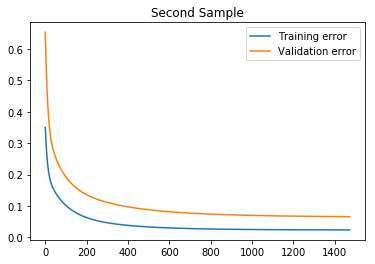

In [139]:
plt.plot([i for i in range(len(train_error2))], train_error2, label='Training error')
plt.plot([i for i in range(len(valid_error2))], valid_error2, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Second Sample')

In [140]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample3)
learning_rate = 0.01
train_error3, valid_error3, theta3 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.48518248 1.45189251 1.52116857 1.44910239 1.48927179 1.45150797
 1.51750734 1.45596105 1.53555008 1.44395596 1.44250671 1.46513963
 1.51915361 1.45558253]
Training Error:  0.33760551751825174
Iteration:  1
Previous theta :  [1.48518248 1.45189251 1.52116857 1.44910239 1.48927179 1.45150797
 1.51750734 1.45596105 1.53555008 1.44395596 1.44250671 1.46513963
 1.51915361 1.45558253]
New theta_0 : [1.47044458 1.40614572 1.54008827 1.40121537 1.47855909 1.40594397
 1.53354818 1.41460555 1.56836872 1.39073412 1.38794968 1.43202594
 1.53661994 1.41367133]
Training Error:  0.3238791227865595
Iteration:  2
Previous theta :  [1.47044458 1.40614572 1.54008827 1.40121537 1.47855909 1.40594397
 1.53354818 1.41460555 1.56836872 1.39073412 1.38794968 1.43202594
 1.53661994 1.41367133]
New theta_0 : [1.45579016 1.36262385 1.55690498 1.35615621 1.46786591 1.36312947
 1.5482147  1.37576807 1.5986260

New theta_0 : [0.89641161 0.50240923 1.38897604 0.65682185 1.02987062 0.72198162
 1.58257483 0.79183357 1.78365159 0.36867346 0.35178284 0.77628056
 1.52598511 0.69677007]
Training Error:  0.14410939544486256
Iteration:  49
Previous theta :  [0.89641161 0.50240923 1.38897604 0.65682185 1.02987062 0.72198162
 1.58257483 0.79183357 1.78365159 0.36867346 0.35178284 0.77628056
 1.52598511 0.69677007]
New theta_0 : [0.88677855 0.49456631 1.37907091 0.65319538 1.02178651 0.71909348
 1.57849692 0.78887981 1.77828996 0.36025457 0.34329583 0.77017214
 1.5193904  0.69166925]
Training Error:  0.14304838422006666
Iteration:  50
Previous theta :  [0.88677855 0.49456631 1.37907091 0.65319538 1.02178651 0.71909348
 1.57849692 0.78887981 1.77828996 0.36025457 0.34329583 0.77017214
 1.5193904  0.69166925]
New theta_0 : [0.87724403 0.4869059  1.36916381 0.64970865 1.01376468 0.71633235
 1.57438583 0.7860277  1.77284985 0.35204305 0.33501236 0.76417644
 1.5127435  0.68668513]
Training Error:  0.142005432

New theta_0 : [0.5487484  0.2651792  0.98332452 0.56207107 0.72329812 0.6507183
 1.39685433 0.70124289 1.52373249 0.11948472 0.09456221 0.56908167
 1.21944732 0.52548704]
Training Error:  0.1076372524022347
Iteration:  94
Previous theta :  [0.5487484  0.2651792  0.98332452 0.56207107 0.72329812 0.6507183
 1.39685433 0.70124289 1.52373249 0.11948472 0.09456221 0.56908167
 1.21944732 0.52548704]
New theta_0 : [0.5427441  0.26163995 0.9756659  0.56064594 0.71769501 0.6496375
 1.39303377 0.69949585 1.51823845 0.11586418 0.09064781 0.56543959
 1.21296099 0.52229703]
Training Error:  0.10701131181426245
Iteration:  95
Previous theta :  [0.5427441  0.26163995 0.9756659  0.56064594 0.71769501 0.6496375
 1.39303377 0.69949585 1.51823845 0.11586418 0.09064781 0.56543959
 1.21296099 0.52229703]
New theta_0 : [0.5368032  0.25815053 0.96806968 0.55923087 0.71213891 0.64856061
 1.38923235 0.69774685 1.51276955 0.11229841 0.08678385 0.56182448
 1.2065008  0.51911836]
Training Error:  0.10639154677453

Training Error:  0.08508210579690378
Iteration:  138
Previous theta :  [ 0.33663433  0.14701961  0.70017776  0.50527804  0.51682153  0.60409151
  1.24601341  0.62182334  1.30560798  0.00170032 -0.03943064  0.42982044
  0.9605757   0.3933419 ]
New theta_0 : [ 3.32875210e-01  1.45044069e-01  6.94881392e-01  5.04081084e-01
  5.12978205e-01  6.03024862e-01  1.24296097e+00  6.19970170e-01
  1.30117772e+00 -1.84361942e-04 -4.17430324e-02  4.27073560e-01
  9.55335571e-01  3.90505122e-01]
Training Error:  0.08466974008521899
Iteration:  139
Previous theta :  [ 3.32875210e-01  1.45044069e-01  6.94881392e-01  5.04081084e-01
  5.12978205e-01  6.03024862e-01  1.24296097e+00  6.19970170e-01
  1.30117772e+00 -1.84361942e-04 -4.17430324e-02  4.27073560e-01
  9.55335571e-01  3.90505122e-01]
New theta_0 : [ 0.32915597  0.14309343  0.68962907  0.50288731  0.50916814  0.60195763
  1.23992335  0.61811612  1.29676858 -0.00204085 -0.04402909  0.4243425
  0.9501236   0.38767531]
Training Error:  0.0842610975

Iteration:  177
Previous theta :  [ 0.21607645  0.08570542  0.52285307  0.4608394   0.3892584   0.56227648
  1.13689135  0.54972699  1.14706221 -0.05379902 -0.11263972  0.33330918
  0.77630243  0.2879107 ]
New theta_0 : [ 0.21359813  0.08449049  0.51900666  0.45975849  0.38652849  0.56120502
  1.13433367  0.54790432  1.14334337 -0.05480798 -0.11412179  0.33109351
  0.77209514  0.28534924]
Training Error:  0.07112998221945814
Iteration:  178
Previous theta :  [ 0.21359813  0.08449049  0.51900666  0.45975849  0.38652849  0.56120502
  1.13433367  0.54790432  1.14334337 -0.05480798 -0.11412179  0.33109351
  0.77209514  0.28534924]
New theta_0 : [ 0.21114621  0.08329035  0.51519106  0.45868044  0.38382261  0.56013393
  1.1317867   0.54608391  1.13964002 -0.05579952 -0.11558699  0.32888952
  0.76791233  0.28279494]
Training Error:  0.0708391069072135
Iteration:  179
Previous theta :  [ 0.21114621  0.08329035  0.51519106  0.45868044  0.38382261  0.56013393
  1.1317867   0.54608391  1.13964002

Previous theta :  [ 0.13024346  0.04474125  0.38218369  0.4168873   0.29125525  0.51677879
  1.03564978  0.47400845  0.99981561 -0.08373939 -0.16316434  0.2476441
  0.61616983  0.18422359]
New theta_0 : [ 0.12868165  0.04401688  0.37944381  0.41592509  0.28939365  0.51573986
  1.03348704  0.47232495  0.99666919 -0.08415953 -0.16406342  0.24586446
  0.61291811  0.18196842]
Training Error:  0.060534265004049105
Iteration:  221
Previous theta :  [ 0.12868165  0.04401688  0.37944381  0.41592509  0.28939365  0.51573986
  1.03348704  0.47232495  0.99666919 -0.08415953 -0.16406342  0.24586446
  0.61291811  0.18196842]
New theta_0 : [ 0.1271366   0.04330098  0.37672508  0.41496552  0.28754866  0.51470201
  1.03133212  0.47064543  0.99353412 -0.08456925 -0.16495189  0.24409355
  0.60968626  0.17972025]
Training Error:  0.060328165285485826
Iteration:  222
Previous theta :  [ 0.1271366   0.04330098  0.37672508  0.41496552  0.28754866  0.51470201
  1.03133212  0.47064543  0.99353412 -0.08456925 -

Training Error:  0.052325341719503045
Iteration:  268
Previous theta :  [ 0.07144752  0.01788251  0.27176057  0.37355191  0.21833849  0.46825977
  0.93987874  0.39799751  0.86039717 -0.09404486 -0.19605037  0.17119924
  0.4807448   0.08368888]
New theta_0 : [ 0.07051931  0.01746276  0.26986222  0.37270809  0.21712949  0.4672807
  0.9380424   0.39652273  0.85772095 -0.09408273 -0.19654665  0.16978355
  0.47833386  0.08175708]
Training Error:  0.05217900427681507
Iteration:  269
Previous theta :  [ 0.07051931  0.01746276  0.26986222  0.37270809  0.21712949  0.4672807
  0.9380424   0.39652273  0.85772095 -0.09408273 -0.19654665  0.16978355
  0.47833386  0.08175708]
New theta_0 : [ 0.06960118  0.01704755  0.26797818  0.37186656  0.21593135  0.46630301
  0.93621195  0.3950525   0.85505316 -0.09411475 -0.1970365   0.16837439
  0.47593812  0.07983168]
Training Error:  0.05203367628095232
Iteration:  270
Previous theta :  [ 0.06960118  0.01704755  0.26797818  0.37186656  0.21593135  0.46630301

Training Error:  0.047749572891853095
Iteration:  303
Previous theta :  [ 0.04431547  0.00554746  0.21314579  0.3453252   0.18189159  0.43482092
  0.87893045  0.34909165  0.7714518  -0.09231941 -0.20999045  0.12529874
  0.40484334  0.01978855]
New theta_0 : [ 0.04368347  0.00525628  0.21168761  0.34455666  0.18101011  0.43389088
  0.87728413  0.34777604  0.76904476 -0.09219022 -0.21029671  0.12409064
  0.40291402  0.01807184]
Training Error:  0.04763375404045947
Iteration:  304
Previous theta :  [ 0.04368347  0.00525628  0.21168761  0.34455666  0.18101011  0.43389088
  0.87728413  0.34777604  0.76904476 -0.09219022 -0.21029671  0.12409064
  0.40291402  0.01807184]
New theta_0 : [ 0.04305843  0.00496797  0.21024036  0.34379013  0.18013655  0.43296225
  0.87564279  0.34646493  0.76664471 -0.09205724 -0.21059848  0.1228879
  0.40099702  0.01636098]
Training Error:  0.047518678452566306
Iteration:  305
Previous theta :  [ 0.04305843  0.00496797  0.21024036  0.34379013  0.18013655  0.432962

Training Error:  0.04400719907317819
Iteration:  339
Previous theta :  [ 0.02546138 -0.0033644   0.16699479  0.31887558  0.15467348  0.40222984
  0.82265623  0.30451924  0.6889714  -0.08559803 -0.21849183  0.08498356
  0.34263612 -0.03844009]
New theta_0 : [ 0.02503843 -0.00357258  0.1658834   0.31817508  0.1540363   0.40135053
  0.82117672  0.30336144  0.68679609 -0.08535934 -0.21866247  0.08395118
  0.34110571 -0.03995628]
Training Error:  0.04391461463557524
Iteration:  340
Previous theta :  [ 0.02503843 -0.00357258  0.1658834   0.31817508  0.1540363   0.40135053
  0.82117672  0.30336144  0.68679609 -0.08535934 -0.21866247  0.08395118
  0.34110571 -0.03995628]
New theta_0 : [ 0.02462022 -0.00377897  0.1647804   0.31747634  0.15340484  0.40047262
  0.81970151  0.30220788  0.68462668 -0.08511828 -0.21883001  0.08292322
  0.33958515 -0.04146719]
Training Error:  0.04382258396191878
Iteration:  341
Previous theta :  [ 0.02462022 -0.00377897  0.1647804   0.31747634  0.15340484  0.4004726

Training Error:  0.04012015628709958
Iteration:  387
Previous theta :  [ 0.00972977 -0.01170035  0.12216352  0.28713263  0.12970904  0.36156602
  0.75622572  0.25356134  0.59080062 -0.07197305 -0.22368612  0.04004531
  0.27928164 -0.10555406]
New theta_0 : [ 0.00948571 -0.01184504  0.12139483  0.28650984  0.12929432  0.36075166
  0.75493586  0.25259603  0.58888235 -0.07165193 -0.22373926  0.03920158
  0.27815992 -0.10683546]
Training Error:  0.04004990315627932
Iteration:  388
Previous theta :  [ 0.00948571 -0.01184504  0.12139483  0.28650984  0.12929432  0.36075166
  0.75493586  0.25259603  0.58888235 -0.07165193 -0.22373926  0.03920158
  0.27815992 -0.10683546]
New theta_0 : [ 0.00924448 -0.0119888   0.12063213  0.28588854  0.12888327  0.35993861
  0.75364962  0.25163447  0.58696893 -0.07132965 -0.22379053  0.03836133
  0.27704545 -0.10811236]
Training Error:  0.039980036001146926
Iteration:  389
Previous theta :  [ 0.00924448 -0.0119888   0.12063213  0.28588854  0.12888327  0.359938

Iteration:  442
Previous theta :  [-1.83204158e-04 -1.85660825e-02  8.77975485e-02  2.54944705e-01
  1.11552138e-01  3.18658893e-01  6.90373628e-01  2.05761571e-01
  4.92040479e-01 -5.30268619e-02 -2.24292173e-01 -1.61899746e-03
  2.27212725e-01 -1.69718983e-01]
New theta_0 : [-3.09133108e-04 -1.86750497e-02  8.73045135e-02  2.54396021e-01
  1.11296015e-01  3.17913119e-01  6.89266937e-01  2.04986686e-01
  4.90363913e-01 -5.26654926e-02 -2.24267466e-01 -2.29460264e-03
  2.26427072e-01 -1.70773856e-01]
Training Error:  0.036712384583763566
Iteration:  443
Previous theta :  [-3.09133108e-04 -1.86750497e-02  8.73045135e-02  2.54396021e-01
  1.11296015e-01  3.17913119e-01  6.89266937e-01  2.04986686e-01
  4.90363913e-01 -5.26654926e-02 -2.24267466e-01 -2.29460264e-03
  2.26427072e-01 -1.70773856e-01]
New theta_0 : [-4.33501272e-04 -1.87835954e-02  8.68156053e-02  2.53848559e-01
  1.11042090e-01  3.17168529e-01  6.88163298e-01  2.04214959e-01
  4.88691323e-01 -5.23037523e-02 -2.24241740e-01 

New theta_0 : [-0.0052434  -0.02416496  0.06584819  0.2259974   0.10008843  0.2786586
  0.63285737  0.16694357  0.40393312 -0.03246783 -0.22162788 -0.03565655
  0.19016199 -0.22339168]
Training Error:  0.03418975488098481
Iteration:  498
Previous theta :  [-0.0052434  -0.02416496  0.06584819  0.2259974   0.10008843  0.2786586
  0.63285737  0.16694357  0.40393312 -0.03246783 -0.22162788 -0.03565655
  0.19016199 -0.22339168]
New theta_0 : [-0.00530375 -0.02425795  0.06554886  0.22551154  0.09992848  0.27797579
  0.63190843  0.16632966  0.40246059 -0.03209885 -0.22156147 -0.03619977
  0.18961405 -0.22425658]
Training Error:  0.03414982573175693
Iteration:  499
Previous theta :  [-0.00530375 -0.02425795  0.06554886  0.22551154  0.09992848  0.27797579
  0.63190843  0.16632966  0.40246059 -0.03209885 -0.22156147 -0.03619977
  0.18961405 -0.22425658]
New theta_0 : [-0.00536326 -0.02435076  0.06525238  0.22502671  0.09976982  0.27729404
  0.63096209  0.16571834  0.4009914  -0.03172993 -0.22149

Training Error:  0.032247725627837745
Iteration:  553
Previous theta :  [-0.00753128 -0.02907964  0.05316675  0.20072557  0.09293667  0.24263143
  0.58432671  0.13678396  0.32764148 -0.01239021 -0.21738385 -0.06267607
  0.16466081 -0.26669248]
New theta_0 : [-0.00755709 -0.02916623  0.05299942  0.20029207  0.09283277  0.24200421
  0.58350987  0.13629903  0.32633838 -0.01203132 -0.21729831 -0.06311755
  0.1642746  -0.26740441]
Training Error:  0.03221674122772711
Iteration:  554
Previous theta :  [-0.00755709 -0.02916623  0.05299942  0.20029207  0.09283277  0.24200421
  0.58350987  0.13629903  0.32633838 -0.01203132 -0.21729831 -0.06311755
  0.1642746  -0.26740441]
New theta_0 : [-0.00758245 -0.02925274  0.05283406  0.19985945  0.09272965  0.24137794
  0.58269524  0.13581621  0.32503811 -0.01167272 -0.21721256 -0.06355739
  0.16389081 -0.26811383]
Training Error:  0.03218589570182893
Iteration:  555
Previous theta :  [-0.00758245 -0.02925274  0.05283406  0.19985945  0.09272965  0.241377

Training Error:  0.030707606614441604
Iteration:  609
Previous theta :  [-0.00841318 -0.03384695  0.04652048  0.17774667  0.08813357  0.20893424
  0.54183084  0.11265098  0.25883823  0.00720353 -0.21237133 -0.08505877
  0.14636801 -0.3029341 ]
New theta_0 : [-0.00842058 -0.03393096  0.04644636  0.17735925  0.08806359  0.20835804
  0.541129    0.112272    0.25768304  0.00754304 -0.21227939 -0.08541839
  0.14609595 -0.30351853]
Training Error:  0.03068338204708843
Iteration:  610
Previous theta :  [-0.00842058 -0.03393096  0.04644636  0.17735925  0.08806359  0.20835804
  0.541129    0.112272    0.25768304  0.00754304 -0.21227939 -0.08541839
  0.14609595 -0.30351853]
New theta_0 : [-0.00842776 -0.03401495  0.0463736   0.1769726   0.08799406  0.2077827
  0.54042906  0.11189472  0.2565303   0.00788216 -0.21218742 -0.08577672
  0.14582556 -0.30410091]
Training Error:  0.030659261492394545
Iteration:  611
Previous theta :  [-0.00842776 -0.03401495  0.0463736   0.1769726   0.08799406  0.207782

Iteration:  664
Previous theta :  [-0.00854641 -0.03843099  0.04425305  0.15753381  0.08486694  0.17848875
  0.50590736  0.0941416   0.19878022  0.02526435 -0.20732078 -0.10304515
  0.13363376 -0.33221774]
New theta_0 : [-0.00854476 -0.03851373  0.04424193  0.15718613  0.08481683  0.17795795
  0.50530215  0.09384591  0.19775088  0.02558078 -0.20722999 -0.10334079
  0.13343952 -0.33269969]
Training Error:  0.029497947700452748
Iteration:  665
Previous theta :  [-0.00854476 -0.03851373  0.04424193  0.15718613  0.08481683  0.17795795
  0.50530215  0.09384591  0.19775088  0.02558078 -0.20722999 -0.10334079
  0.13343952 -0.33269969]
New theta_0 : [-0.008543   -0.03859644  0.04423174  0.15683913  0.08476699  0.17742794
  0.50469856  0.09355158  0.19672367  0.02589678 -0.20713927 -0.10363539
  0.13324646 -0.33317996]
Training Error:  0.02947883075972377
Iteration:  666
Previous theta :  [-0.008543   -0.03859644  0.04423174  0.15683913  0.08476699  0.17742794
  0.50469856  0.09355158  0.196723

Training Error:  0.02855519403753947
Iteration:  720
Previous theta :  [-0.00831992 -0.04303043  0.0449082   0.13907124  0.08242511  0.14993997
  0.47439136  0.07951234  0.14428345  0.04230469 -0.20237029 -0.11811199
  0.12436897 -0.35677659]
New theta_0 : [-0.008314   -0.04311189  0.04494058  0.1387595   0.08238722  0.14945128
  0.47387029  0.07928414  0.14336599  0.04259635 -0.20228487 -0.11835545
  0.12422998 -0.35717308]
Training Error:  0.0285399367090348
Iteration:  721
Previous theta :  [-0.008314   -0.04311189  0.04494058  0.1387595   0.08238722  0.14945128
  0.47387029  0.07928414  0.14336599  0.04259635 -0.20228487 -0.11835545
  0.12422998 -0.35717308]
New theta_0 : [-0.00830804 -0.04319331  0.04497358  0.13844837  0.0823495   0.14896331
  0.4733506   0.079057    0.14245039  0.04288756 -0.20219957 -0.11859808
  0.12409181 -0.35756819]
Training Error:  0.02852474097703424
Iteration:  722
Previous theta :  [-0.00830804 -0.04319331  0.04497358  0.13844837  0.0823495   0.14896331

Iteration:  775
Previous theta :  [-0.00794251 -0.0474665   0.04750608  0.1227954   0.08055679  0.12409875
  0.44769003  0.06843385  0.09648392  0.05769321 -0.19786547 -0.13034834
  0.11781139 -0.37666322]
New theta_0 : [-0.00793498 -0.04754623  0.04756667  0.12251531  0.08052631  0.1236479
  0.4472396   0.06825811  0.09566294  0.05796083 -0.19778744 -0.13055055
  0.11771041 -0.37699088]
Training Error:  0.027788487379532625
Iteration:  776
Previous theta :  [-0.00793498 -0.04754623  0.04756667  0.12251531  0.08052631  0.1236479
  0.4472396   0.06825811  0.09566294  0.05796083 -0.19778744 -0.13055055
  0.11771041 -0.37699088]
New theta_0 : [-0.00792743 -0.04762592  0.04762766  0.12223576  0.08049594  0.12319772
  0.44679036  0.06808322  0.09484361  0.05822803 -0.19770955 -0.1307521
  0.11760999 -0.37731741]
Training Error:  0.02777629124351267
Iteration:  777
Previous theta :  [-0.00792743 -0.04762592  0.04762766  0.12223576  0.08049594  0.12319772
  0.44679036  0.06808322  0.09484361 

Training Error:  0.02718406017573103
Iteration:  831
Previous theta :  [-0.00750777 -0.05186886  0.05144002  0.1079229   0.07899213  0.09983899
  0.42420263  0.05979825  0.05294357  0.07203284 -0.19372466 -0.1407052
  0.11295048 -0.39337649]
New theta_0 : [-0.00749992 -0.05194621  0.05151876  0.10767185  0.07896648  0.09942355
  0.4238137   0.05966463  0.05220929  0.07227717 -0.19365503 -0.14087347
  0.11287677 -0.39364661]
Training Error:  0.027174228047174086
Iteration:  832
Previous theta :  [-0.00749992 -0.05194621  0.05151876  0.10767185  0.07896648  0.09942355
  0.4238137   0.05966463  0.05220929  0.07227717 -0.19365503 -0.14087347
  0.11287677 -0.39364661]
New theta_0 : [-0.00749208 -0.05202352  0.05159774  0.1074213   0.07894089  0.09900872
  0.42342578  0.05953167  0.05147645  0.0725211  -0.19358556 -0.1410412
  0.11280346 -0.39391579]
Training Error:  0.02716443401236945
Iteration:  833
Previous theta :  [-0.00749208 -0.05202352  0.05159774  0.1074213   0.07894089  0.09900872

Iteration:  847
Previous theta :  [-0.00738262 -0.05310064  0.05272821  0.10396473  0.07858971  0.09326415
  0.41809969  0.05773822  0.04136752  0.07589414 -0.192629   -0.14333349
  0.11181843 -0.39758878]
New theta_0 : [-0.00737483 -0.0531772   0.05281062  0.10372145  0.07856511  0.09285829
  0.41772662  0.05761487  0.0406561   0.0761321  -0.19256182 -0.14349331
  0.11175093 -0.39784444]
Training Error:  0.02702198828048796
Iteration:  848
Previous theta :  [-0.00737483 -0.0531772   0.05281062  0.10372145  0.07856511  0.09285829
  0.41772662  0.05761487  0.0406561   0.0761321  -0.19256182 -0.14349331
  0.11175093 -0.39784444]
New theta_0 : [-0.00736704 -0.05325371  0.05289325  0.10347865  0.07854057  0.09245303
  0.41735452  0.05749213  0.03994608  0.07636966 -0.1924948  -0.14365262
  0.11168379 -0.39809921]
Training Error:  0.02701278260160999
Iteration:  849
Previous theta :  [-0.00736704 -0.05325371  0.05289325  0.10347865  0.07854057  0.09245303
  0.41735452  0.05749213  0.0399460

New theta_0 : [-0.00696457 -0.05723159  0.05752136  0.09127286  0.07731896  0.07179867
  0.39894956  0.051804    0.0042452   0.08841163 -0.18916073 -0.15141191
  0.1085978  -0.41042457]
Training Error:  0.0265722228168559
Iteration:  902
Previous theta :  [-0.00696457 -0.05723159  0.05752136  0.09127286  0.07731896  0.07179867
  0.39894956  0.051804    0.0042452   0.08841163 -0.18916073 -0.15141191
  0.1085978  -0.41042457]
New theta_0 : [-0.00695722 -0.05730511  0.05761247  0.09105467  0.07729724  0.07142411
  0.39862588  0.0517109   0.00360661  0.08862876 -0.1891019  -0.15154625
  0.10854755 -0.41063628]
Training Error:  0.026564738935073846
Iteration:  903
Previous theta :  [-0.00695722 -0.05730511  0.05761247  0.09105467  0.07729724  0.07142411
  0.39862588  0.0517109   0.00360661  0.08862876 -0.1891019  -0.15154625
  0.10854755 -0.41063628]
New theta_0 : [-0.00694988 -0.05737856  0.05770368  0.0908369   0.07727557  0.07105011
  0.39830304  0.05161827  0.00296927  0.08884552 -0.189

  0.10677913 -0.41835288]
Training Error:  0.02629396108248064
Iteration:  942
Previous theta :  [-0.00667923 -0.06012458  0.06123646  0.08287575  0.07648245  0.05723513
  0.38662741  0.0484371  -0.02035156  0.09681942 -0.18692257 -0.15647508
  0.10677913 -0.41835288]
New theta_0 : [-0.00667234 -0.06019561  0.06133083  0.08267431  0.07646233  0.05688184
  0.38633518  0.04836178 -0.02094228  0.09702248 -0.18686959 -0.15659388
  0.10673831 -0.41853753]
Training Error:  0.026287530019807836
Iteration:  943
Previous theta :  [-0.00667234 -0.06019561  0.06133083  0.08267431  0.07646233  0.05688184
  0.38633518  0.04836178 -0.02094228  0.09702248 -0.18686959 -0.15659388
  0.10673831 -0.41853753]
New theta_0 : [-0.00666545 -0.06026659  0.06142525  0.08247328  0.07644224  0.05652907
  0.38604369  0.04828686 -0.02153186  0.09722521 -0.18681676 -0.15671233
  0.1066977  -0.41872156]
Training Error:  0.02628112317554176
Iteration:  944
Previous theta :  [-0.00666545 -0.06026659  0.06142525  0.0824

Iteration:  997
Previous theta :  [-0.00631859 -0.06393345  0.06647874  0.07237858  0.07542532  0.03855189
  0.37160456  0.04484992 -0.05120085  0.10749811 -0.18421683 -0.16250739
  0.10481426 -0.42762881]
New theta_0 : [-0.00631238 -0.06400081  0.06657452  0.07219834  0.07540697  0.03822593
  0.37135023  0.04479434 -0.05173197  0.10768332 -0.18417145 -0.16260821
  0.10478329 -0.42778189]
Training Error:  0.02596859307976791
Iteration:  998
Previous theta :  [-0.00631238 -0.06400081  0.06657452  0.07219834  0.07540697  0.03822593
  0.37135023  0.04479434 -0.05173197  0.10768332 -0.18417145 -0.16260821
  0.10478329 -0.42778189]
New theta_0 : [-0.00630619 -0.0640681   0.0666703   0.07201847  0.07538865  0.03790046
  0.37109654  0.04473907 -0.05226206  0.10786822 -0.18412621 -0.16270873
  0.10475247 -0.42793444]
Training Error:  0.025963380741201053
Iteration:  999
Previous theta :  [-0.00630619 -0.0640681   0.0666703   0.07201847  0.07538865  0.03790046
  0.37109654  0.04473907 -0.052262

New theta_0 : [-0.00605181 -0.06689543  0.07077719  0.06462182  0.07462661  0.02434756
  0.36076684  0.04264069 -0.07411824  0.11553458 -0.18230319 -0.16676632
  0.10355979 -0.43402646]
Training Error:  0.025756653137318015
Iteration:  1042
Previous theta :  [-0.00605181 -0.06689543  0.07077719  0.06462182  0.07462661  0.02434756
  0.36076684  0.04264069 -0.07411824  0.11553458 -0.18230319 -0.16676632
  0.10355979 -0.43402646]
New theta_0 : [-0.00604617 -0.06695963  0.07087219  0.06445745  0.07460946  0.02404245
  0.36053953  0.04259793 -0.07460537  0.11570643 -0.18226357 -0.16685484
  0.10353489 -0.4341578 ]
Training Error:  0.025752227310147337
Iteration:  1043
Previous theta :  [-0.00604617 -0.06695963  0.07087219  0.06445745  0.07460946  0.02404245
  0.36053953  0.04259793 -0.07460537  0.11570643 -0.18226357 -0.16685484
  0.10353489 -0.4341578 ]
New theta_0 : [-0.00604054 -0.06702375  0.07096716  0.06429342  0.07459234  0.0237378
  0.36031279  0.04255542 -0.07509157  0.11587799 -0.

New theta_0 : [-0.00586142 -0.0690998   0.07407893  0.05906647  0.07404091  0.01393173
  0.35313658  0.04128829 -0.09062523  0.12138322 -0.18098835 -0.16972048
  0.10275456 -0.43836768]
Training Error:  0.025611084202333226
Iteration:  1077
Previous theta :  [-0.00586142 -0.0690998   0.07407893  0.05906647  0.07404091  0.01393173
  0.35313658  0.04128829 -0.09062523  0.12138322 -0.18098835 -0.16972048
  0.10275456 -0.43836768]
New theta_0 : [-0.00585619 -0.06916149  0.07417245  0.05891359  0.0740246   0.01364196
  0.35292811  0.04125379 -0.09108082  0.1215454  -0.18095291 -0.1698007
  0.10273344 -0.43848428]
Training Error:  0.02560719510630562
Iteration:  1078
Previous theta :  [-0.00585619 -0.06916149  0.07417245  0.05891359  0.0740246   0.01364196
  0.35292811  0.04125379 -0.09108082  0.1215454  -0.18095291 -0.1698007
  0.10273344 -0.43848428]
New theta_0 : [-0.00585098 -0.06922311  0.07426591  0.05876104  0.07400832  0.01335261
  0.35272015  0.0412195  -0.09153555  0.12170733 -0.18

Training Error:  0.025439633755337636
Iteration:  1125
Previous theta :  [-0.00562317 -0.07197946  0.07850208  0.05207738  0.07328299  0.00049431
  0.34368487  0.0398592  -0.11154369  0.12887555 -0.17941366 -0.17333277
  0.1018428  -0.4435406 ]
New theta_0 : [-5.61847208e-03 -7.20376854e-02  7.85926520e-02  5.19391388e-02
  7.32677231e-02  2.24379502e-04  3.43499499e-01  3.98339933e-02
 -1.11959508e-01  1.29025473e-01 -1.79383514e-01 -1.73403128e-01
  1.01825846e-01 -4.43639646e-01]
Training Error:  0.025436373037067896
Iteration:  1126
Previous theta :  [-5.61847208e-03 -7.20376854e-02  7.85926520e-02  5.19391388e-02
  7.32677231e-02  2.24379502e-04  3.43499499e-01  3.98339933e-02
 -1.11959508e-01  1.29025473e-01 -1.79383514e-01 -1.73403128e-01
  1.01825846e-01 -4.43639646e-01]
New theta_0 : [-5.61378596e-03 -7.20958370e-02  7.86831517e-02  5.18011855e-02
  7.32524778e-02 -4.51497995e-05  3.43314581e-01  3.98089614e-02
 -1.12374534e-01  1.29175150e-01 -1.79353476e-01 -1.73473298e-01
 

New theta_0 : [-0.00541769 -0.07458329  0.08259116  0.04601185  0.07260162 -0.0115174
  0.33560629  0.0388655  -0.12987807  0.13552621 -0.17813271 -0.17638342
  0.10113597 -0.44776548]
Training Error:  0.025301311706728932
Iteration:  1171
Previous theta :  [-0.00541769 -0.07458329  0.08259116  0.04601185  0.07260162 -0.0115174
  0.33560629  0.0388655  -0.12987807  0.13552621 -0.17813271 -0.17638342
  0.10113597 -0.44776548]
New theta_0 : [-0.00541345 -0.07463821  0.08267821  0.04588648  0.07258726 -0.01176952
  0.33544044  0.03884739 -0.13025917  0.13566537 -0.17810719 -0.17644573
  0.10112215 -0.44785018]
Training Error:  0.025298554811651598
Iteration:  1172
Previous theta :  [-0.00541345 -0.07463821  0.08267821  0.04588648  0.07258726 -0.01176952
  0.33544044  0.03884739 -0.13025917  0.13566537 -0.17810719 -0.17644573
  0.10112215 -0.44785018]
New theta_0 : [-0.00540923 -0.07469306  0.08276517  0.04576137  0.07257293 -0.01202127
  0.33527499  0.03882941 -0.13063956  0.13580431 -0.1

New theta_0 : [-0.00523622 -0.07698458  0.08642429  0.04062833  0.07197432 -0.02249962
  0.32852311  0.03817667 -0.14633487  0.14157282 -0.17707607 -0.17903499
  0.10056944 -0.45130548]
Training Error:  0.025186651625351678
Iteration:  1216
Previous theta :  [-0.00523622 -0.07698458  0.08642429  0.04062833  0.07197432 -0.02249962
  0.32852311  0.03817667 -0.14633487  0.14157282 -0.17707607 -0.17903499
  0.10056944 -0.45130548]
New theta_0 : [-0.00523239 -0.07703632  0.08650746  0.04051453  0.0719608  -0.02273541
  0.32837419  0.03816408 -0.14668495  0.14170232 -0.17705466 -0.17909054
  0.10055805 -0.45137815]
Training Error:  0.025184310095414438
Iteration:  1217
Previous theta :  [-0.00523239 -0.07703632  0.08650746  0.04051453  0.0719608  -0.02273541
  0.32837419  0.03816408 -0.14668495  0.14170232 -0.17705466 -0.17909054
  0.10055805 -0.45137815]
New theta_0 : [-0.00522857 -0.07708799  0.08659054  0.04040098  0.0719473  -0.02297084
  0.32822562  0.03815161 -0.14703437  0.14183161 -0

Iteration:  1263
Previous theta :  [-0.00506519 -0.07934182  0.0902348   0.03553897  0.07135779 -0.0332095
  0.32189206  0.03769429 -0.16209679  0.14744341 -0.17616051 -0.18150277
  0.10008306 -0.45446643]
New theta_0 : [-0.00506174 -0.07939034  0.09031366  0.03543627  0.07134508 -0.0334293
  0.32175882  0.03768627 -0.16241726  0.14756366 -0.17614298 -0.18155225
  0.10007372 -0.45452832]
Training Error:  0.025083278981079496
Iteration:  1264
Previous theta :  [-0.00506174 -0.07939034  0.09031366  0.03543627  0.07134508 -0.0334293
  0.32175882  0.03768627 -0.16241726  0.14756366 -0.17614298 -0.18155225
  0.10007372 -0.45452832]
New theta_0 : [-0.0050583  -0.07943878  0.09039241  0.0353338   0.07133239 -0.03364876
  0.32162589  0.03767832 -0.16273712  0.14768373 -0.17612553 -0.18160162
  0.10006442 -0.45459001]
Training Error:  0.025081310010990097
Iteration:  1265
Previous theta :  [-0.0050583  -0.07943878  0.09039241  0.0353338   0.07133239 -0.03364876
  0.32162589  0.03767832 -0.16273

New theta_0 : [-0.00494889 -0.08099989  0.09293852  0.03207601  0.07092285 -0.04070959
  0.31740987  0.03746122 -0.17296313  0.15154267 -0.1755924  -0.18316608
  0.09977809 -0.45651151]
Training Error:  0.025020152400865747
Iteration:  1298
Previous theta :  [-0.00494889 -0.08099989  0.09293852  0.03207601  0.07092285 -0.04070959
  0.31740987  0.03746122 -0.17296313  0.15154267 -0.1755924  -0.18316608
  0.09977809 -0.45651151]
New theta_0 : [-0.0049457  -0.08104607  0.09301407  0.03198096  0.07091071 -0.04091815
  0.31728713  0.03745592 -0.17326324  0.15165655 -0.17557751 -0.1832116
  0.09977001 -0.45656642]
Training Error:  0.02501840996587284
Iteration:  1299
Previous theta :  [-0.0049457  -0.08104607  0.09301407  0.03198096  0.07091071 -0.04091815
  0.31728713  0.03745592 -0.17326324  0.15165655 -0.17557751 -0.1832116
  0.09977001 -0.45656642]
New theta_0 : [-0.00494251 -0.08109218  0.09308952  0.03188612  0.0708986  -0.04112639
  0.31716467  0.03745069 -0.1735628   0.15177025 -0.17

New theta_0 : [-0.00482057 -0.08288348  0.09602927  0.02826107  0.07042671 -0.04920465
  0.31249298  0.03729532 -0.18509691  0.15617778 -0.1750274  -0.18498976
  0.09946551 -0.45866256]
Training Error:  0.02495208992699112
Iteration:  1340
Previous theta :  [-0.00482057 -0.08288348  0.09602927  0.02826107  0.07042671 -0.04920465
  0.31249298  0.03729532 -0.18509691  0.15617778 -0.1750274  -0.18498976
  0.09946551 -0.45866256]
New theta_0 : [-0.00481765 -0.08292695  0.09610081  0.02817455  0.07041523 -0.04940044
  0.31238165  0.03729268 -0.18537436  0.15628455 -0.17501541 -0.18503107
  0.0994587  -0.45871008]
Training Error:  0.0249505908245715
Iteration:  1341
Previous theta :  [-0.00481765 -0.08292695  0.09610081  0.02817455  0.07041523 -0.04940044
  0.31238165  0.03729268 -0.18537436  0.15628455 -0.17501541 -0.18503107
  0.0994587  -0.45871008]
New theta_0 : [-0.00481474 -0.08297035  0.09617225  0.02808822  0.07040376 -0.04959594
  0.31227058  0.03729009 -0.1856513   0.15639115 -0.17

Iteration:  1375
Previous theta :  [-0.00472216 -0.08436771  0.0984766   0.02534617  0.07003373 -0.05588486
  0.30874542  0.03723413 -0.19450618  0.1598197  -0.17464588 -0.18638166
  0.09924277 -0.46023206]
New theta_0 : [-0.00471945 -0.084409    0.09854482  0.02526624  0.07002277 -0.05607059
  0.30864272  0.03723327 -0.1947661   0.15992095 -0.1746361  -0.18641986
  0.09923685 -0.46027418]
Training Error:  0.024901355877500038
Iteration:  1376
Previous theta :  [-0.00471945 -0.084409    0.09854482  0.02526624  0.07002277 -0.05607059
  0.30864272  0.03723327 -0.1947661   0.15992095 -0.1746361  -0.18641986
  0.09923685 -0.46027418]
New theta_0 : [-0.00471675 -0.08445023  0.09861294  0.02518649  0.07001182 -0.05625604
  0.30854026  0.03723245 -0.19502553  0.16002205 -0.17462638 -0.18645796
  0.09923096 -0.46031614]
Training Error:  0.02490003747362097
Iteration:  1377
Previous theta :  [-0.00471675 -0.08445023  0.09861294  0.02518649  0.07001182 -0.05625604
  0.30854026  0.03723245 -0.195

  0.09908054 -0.46139598]
New theta_0 : [-0.00464344 -0.08558028  0.10048228  0.02302605  0.06971104 -0.0613365
  0.30576451  0.03722703 -0.20209698  0.16279196 -0.17437834 -0.18749177
  0.09907527 -0.46143406]
Training Error:  0.02486496421660697
Iteration:  1405
Previous theta :  [-0.00464344 -0.08558028  0.10048228  0.02302605  0.06971104 -0.0613365
  0.30576451  0.03722703 -0.20209698  0.16279196 -0.17437834 -0.18749177
  0.09907527 -0.46143406]
New theta_0 : [-0.0046409  -0.08561978  0.10054769  0.02295143  0.0697005  -0.061514
  0.30566862  0.03722742 -0.20234278  0.16288876 -0.17437032 -0.18752754
  0.09907003 -0.46147201]
Training Error:  0.024863775029475163
Iteration:  1406
Previous theta :  [-0.0046409  -0.08561978  0.10054769  0.02295143  0.0697005  -0.061514
  0.30566862  0.03722742 -0.20234278  0.16288876 -0.17437032 -0.18752754
  0.09907003 -0.46147201]
New theta_0 : [-0.00463836 -0.08565921  0.10061301  0.02287698  0.06968998 -0.06169123
  0.30557296  0.03722786 -0.2025

Iteration:  1441
Previous theta :  [-0.00455528 -0.08696536  0.10277874  0.02044538  0.06934031 -0.06756013
  0.30244645  0.03726364 -0.21066422  0.16618765 -0.17412426 -0.18873248
  0.09889909 -0.46272028]
New theta_0 : [-0.00455292 -0.08700277  0.10284084  0.02037673  0.06933026 -0.06772821
  0.3023581   0.03726527 -0.21089412  0.16627942 -0.17411819 -0.18876561
  0.09889455 -0.46275376]
Training Error:  0.024823656927126847
Iteration:  1442
Previous theta :  [-0.00455292 -0.08700277  0.10284084  0.02037673  0.06933026 -0.06772821
  0.3023581   0.03726527 -0.21089412  0.16627942 -0.17411819 -0.18876561
  0.09889455 -0.46275376]
New theta_0 : [-0.00455057 -0.08704012  0.10290284  0.02030823  0.06932023 -0.06789603
  0.30226995  0.03726692 -0.21112359  0.16637105 -0.17411218 -0.18879867
  0.09889003 -0.46278711]
Training Error:  0.02482261396150947
Iteration:  1443
Previous theta :  [-0.00455057 -0.08704012  0.10290284  0.02030823  0.06932023 -0.06789603
  0.30226995  0.03726692 -0.211

Text(0.5,1,'Third Sample')

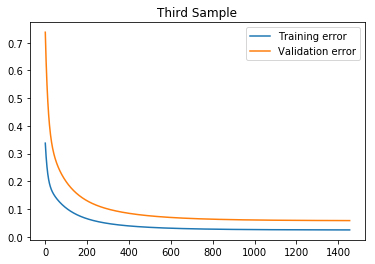

In [141]:
plt.plot([i for i in range(len(train_error3))], train_error3, label='Training error')
plt.plot([i for i in range(len(valid_error3))], valid_error3, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Third Sample')

In [142]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample4)
learning_rate = 0.01
train_error4, valid_error4, theta4 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.485601   1.45309522 1.51928745 1.44693832 1.48650092 1.45123335
 1.51967732 1.45596632 1.5342152  1.44223015 1.44001829 1.46374673
 1.52212719 1.45388393]
Training Error:  0.3407955621274191
Iteration:  1
Previous theta :  [1.485601   1.45309522 1.51928745 1.44693832 1.48650092 1.45123335
 1.51967732 1.45596632 1.5342152  1.44223015 1.44001829 1.46374673
 1.52212719 1.45388393]
New theta_0 : [1.47138942 1.40847842 1.53670439 1.39690394 1.47309802 1.40532828
 1.53779066 1.41450919 1.56593369 1.38734947 1.38306912 1.42927829
 1.54238548 1.41038972]
Training Error:  0.3266379124779582
Iteration:  2
Previous theta :  [1.47138942 1.40847842 1.53670439 1.39690394 1.47309802 1.40532828
 1.53779066 1.41450919 1.56593369 1.38734947 1.38306912 1.42927829
 1.54238548 1.41038972]
New theta_0 : [1.45736042 1.36602099 1.5523659  1.34972018 1.45979233 1.36211708
 1.55443516 1.37547644 1.5953042 

New theta_0 : [1.01833455 0.58925559 1.50726971 0.63211913 1.01869004 0.73331136
 1.64738173 0.7976645  1.83458723 0.40923367 0.37586852 0.79303564
 1.60726684 0.73364241]
Training Error:  0.14705755723576786
Iteration:  42
Previous theta :  [1.01833455 0.58925559 1.50726971 0.63211913 1.01869004 0.73331136
 1.64738173 0.7976645  1.83458723 0.40923367 0.37586852 0.79303564
 1.60726684 0.73364241]
New theta_0 : [1.00925682 0.580271   1.49939887 0.62676496 1.00929029 0.72934655
 1.64385154 0.79357444 1.83067333 0.39922252 0.3656127  0.78573857
 1.60108463 0.72837602]
Training Error:  0.1458901345814673
Iteration:  43
Previous theta :  [1.00925682 0.580271   1.49939887 0.62676496 1.00929029 0.72934655
 1.64385154 0.79357444 1.83067333 0.39922252 0.3656127  0.78573857
 1.60108463 0.72837602]
New theta_0 : [1.00026752 0.57152556 1.49145115 0.62165264 0.99997824 0.72560063
 1.64023959 0.78967075 1.8265988  0.38950928 0.35565777 0.77861071
 1.59479277 0.72330599]
Training Error:  0.1447541920

Iteration:  85
Previous theta :  [0.69675257 0.33445665 1.16079527 0.51460206 0.68526546 0.66077093
 1.47273692 0.70215166 1.60684532 0.14124839 0.0960493  0.56874144
 1.30830357 0.59484513]
New theta_0 : [0.69071177 0.33045346 1.15335504 0.51309543 0.67902861 0.66004343
 1.46880069 0.7006518  1.60129914 0.13735991 0.09180877 0.56477163
 1.30147523 0.59248692]
Training Error:  0.11062948803415322
Iteration:  86
Previous theta :  [0.69071177 0.33045346 1.15335504 0.51309543 0.67902861 0.66004343
 1.46880069 0.7006518  1.60129914 0.13735991 0.09180877 0.56477163
 1.30147523 0.59248692]
New theta_0 : [0.68472677 0.32650345 1.14595899 0.51160795 0.67285153 0.65932557
 1.46488412 0.69915634 1.59576881 0.13353502 0.08762789 0.56083483
 1.29467403 0.59013886]
Training Error:  0.11000138990301996
Iteration:  87
Previous theta :  [0.68472677 0.32650345 1.14595899 0.51160795 0.67285153 0.65932557
 1.46488412 0.69915634 1.59576881 0.13353502 0.08762789 0.56083483
 1.29467403 0.59013886]
New theta

Training Error:  0.08704682577269017
Iteration:  132
Previous theta :  [ 0.46529527  0.19030865  0.85835159  0.45485075  0.44844811  0.62862738
  1.30948401  0.63072968  1.3681625   0.01047997 -0.05484503  0.40986179
  1.02066519  0.48864467]
New theta_0 : [ 0.46137369  0.18800069  0.85290028  0.45370757  0.44448655  0.62789516
  1.30646266  0.62914205  1.3636018   0.00858295 -0.05723194  0.40697694
  1.01530662  0.4864268 ]
Training Error:  0.0866359977898591
Iteration:  133
Previous theta :  [ 0.46137369  0.18800069  0.85290028  0.45370757  0.44448655  0.62789516
  1.30646266  0.62914205  1.3636018   0.00858295 -0.05723194  0.40697694
  1.01530662  0.4864268 ]
New theta_0 : [ 0.4574877   0.18571762  0.84748597  0.45256739  0.44056314  0.62715945
  1.30345791  0.62755162  1.3590619   0.00671458 -0.059592    0.40410931
  1.00997891  0.48421015]
Training Error:  0.08622879694775239
Iteration:  134
Previous theta :  [ 0.4574877   0.18571762  0.84748597  0.45256739  0.44056314  0.62715945

  0.82915056  0.40129275]
New theta_0 : [ 0.3304369   0.11332827  0.6624637   0.41015069  0.31376499  0.59590206
  1.19769179  0.56408701  1.19698058 -0.0471599  -0.13363768  0.30438526
  0.82492615  0.39915701]
Training Error:  0.07281194605296758
Iteration:  173
Previous theta :  [ 0.3304369   0.11332827  0.6624637   0.41015069  0.31376499  0.59590206
  1.19769179  0.56408701  1.19698058 -0.0471599  -0.13363768  0.30438526
  0.82492615  0.39915701]
New theta_0 : [ 0.32773196  0.11183804  0.65832393  0.409112    0.31110352  0.59504201
  1.19523662  0.56244253  1.19317642 -0.04812786 -0.13513905  0.30210919
  0.82072732  0.39702422]
Training Error:  0.07252275365762077
Iteration:  174
Previous theta :  [ 0.32773196  0.11183804  0.65832393  0.409112    0.31110352  0.59504201
  1.19523662  0.56244253  1.19317642 -0.04812786 -0.13513905  0.30210919
  0.82072732  0.39702422]
New theta_0 : [ 0.32505125  0.11036346  0.65421134  0.40807568  0.30846781  0.59417948
  1.19279267  0.56079813  1.1

Training Error:  0.0635192279786159
Iteration:  210
Previous theta :  [ 0.24487459  0.06742261  0.52590459  0.37329422  0.23068817  0.56267352
  1.11359439  0.5037318   1.06611116 -0.07274115 -0.17904872  0.22801909
  0.6854753   0.32250017]
New theta_0 : [ 0.24293158  0.0664128   0.52264629  0.37234289  0.22883333  0.56174256
  1.11149415  0.50212634  1.06283391 -0.0731793  -0.18002084  0.22616127
  0.68212978  0.32049953]
Training Error:  0.06330354899542355
Iteration:  211
Previous theta :  [ 0.24293158  0.0664128   0.52264629  0.37234289  0.22883333  0.56174256
  1.11149415  0.50212634  1.06283391 -0.0731793  -0.18002084  0.22616127
  0.68212978  0.32049953]
New theta_0 : [ 0.24100574  0.06541351  0.51940863  0.3713939   0.22699656  0.56081025
  1.10940203  0.5005228   1.05956919 -0.07360604 -0.18098124  0.22431337
  0.67880492  0.31850295]
Training Error:  0.06308950386920571
Iteration:  212
Previous theta :  [ 0.24100574  0.06541351  0.51940863  0.3713939   0.22699656  0.56081025

Iteration:  259
Previous theta :  [ 0.16724355  0.02849662  0.38803389  0.32939957  0.15820945  0.51590685
  1.01918732  0.4279031   0.91890205 -0.08295684 -0.21482542  0.14754584
  0.54373328  0.22950251]
New theta_0 : [ 0.16598087  0.02789087  0.38563336  0.32856049  0.15706514  0.51493677
  1.01742152  0.42642627  0.91615488 -0.0829681  -0.21534151  0.14610529
  0.5412682   0.22771564]
Training Error:  0.054459876431225594
Iteration:  260
Previous theta :  [ 0.16598087  0.02789087  0.38563336  0.32856049  0.15706514  0.51493677
  1.01742152  0.42642627  0.91615488 -0.0829681  -0.21534151  0.14610529
  0.5412682   0.22771564]
New theta_0 : [ 0.16472914  0.02729136  0.38324749  0.32772362  0.15593213  0.51396638
  1.01566144  0.4249526   0.91341697 -0.08297299 -0.21585042  0.14467194
  0.5388185   0.22593331]
Training Error:  0.054309335074784706
Iteration:  261
Previous theta :  [ 0.16472914  0.02729136  0.38324749  0.32772362  0.15593213  0.51396638
  1.01566144  0.4249526   0.91341

Training Error:  0.049501056043870006
Iteration:  297
Previous theta :  [ 0.12617785  0.00935525  0.30633975  0.29903546  0.12183595  0.47895824
  0.95584368  0.37411112  0.82059667 -0.07950671 -0.22995366  0.0975032
  0.4601103   0.16479876]
New theta_0 : [ 0.12526815  0.00894543  0.30443301  0.29827752  0.12105345  0.47798693
  0.95427387  0.37276245  0.818167   -0.07932418 -0.2302423   0.09630655
  0.45816724  0.1631844 ]
Training Error:  0.04938267975834925
Iteration:  298
Previous theta :  [ 0.12526815  0.00894543  0.30443301  0.29827752  0.12105345  0.47798693
  0.95427387  0.37276245  0.818167   -0.07932418 -0.2302423   0.09630655
  0.45816724  0.1631844 ]
New theta_0 : [ 0.1243662   0.00853976  0.30253768  0.29752163  0.12027881  0.47701584
  0.9527087   0.37141731  0.81574481 -0.07913772 -0.23052605  0.09511558
  0.45623632  0.16157454]
Training Error:  0.049265037339629614
Iteration:  299
Previous theta :  [ 0.1243662   0.00853976  0.30253768  0.29752163  0.12027881  0.477015

New theta_0 : [ 0.0985197  -0.00278833  0.24594363  0.27369515  0.09866349  0.44515839
  0.90352349  0.32902499  0.73977024 -0.07108632 -0.23744903  0.05877242
  0.39883847  0.11093618]
Training Error:  0.045757332252651786
Iteration:  332
Previous theta :  [ 0.0985197  -0.00278833  0.24594363  0.27369515  0.09866349  0.44515839
  0.90352349  0.32902499  0.73977024 -0.07108632 -0.23744903  0.05877242
  0.39883847  0.11093618]
New theta_0 : [ 0.09784335 -0.00307666  0.24439627  0.27300606  0.0981154   0.44420053
  0.90210393  0.32780121  0.73758097 -0.07079334 -0.23759317  0.05775462
  0.39727697  0.10947583]
Training Error:  0.04566135979572363
Iteration:  333
Previous theta :  [ 0.09784335 -0.00307666  0.24439627  0.27300606  0.0981154   0.44420053
  0.90210393  0.32780121  0.73758097 -0.07079334 -0.23759317  0.05775462
  0.39727697  0.10947583]
New theta_0 : [ 0.09717264 -0.00336215  0.24285807  0.27231885  0.09757292  0.44324321
  0.90068834  0.32658101  0.73539797 -0.07049793 -0.23

Training Error:  0.042387724243528865
Iteration:  371
Previous theta :  [ 0.07590112 -0.01219191  0.19190162  0.24816936  0.08098703  0.40826169
  0.8509646   0.28393055  0.6587703  -0.05815432 -0.24083804  0.02223184
  0.34458521  0.0570814 ]
New theta_0 : [ 0.07541154 -0.01239001  0.19067328  0.24755     0.08062183  0.40732956
  0.84968906  0.28284453  0.6568047  -0.05778962 -0.24087237  0.02137381
  0.343359    0.05578194]
Training Error:  0.04231047084925585
Iteration:  372
Previous theta :  [ 0.07541154 -0.01239001  0.19067328  0.24755     0.08062183  0.40732956
  0.84968906  0.28284453  0.6568047  -0.05778962 -0.24087237  0.02137381
  0.343359    0.05578194]
New theta_0 : [ 0.07492594 -0.01258628  0.18945219  0.24693234  0.08026048  0.40639821
  0.84841695  0.28176197  0.65484433 -0.05742362 -0.24090444  0.02051942
  0.34214032  0.05448643]
Training Error:  0.04223363054627735
Iteration:  373
Previous theta :  [ 0.07492594 -0.01258628  0.18945219  0.24693234  0.08026048  0.406398

Previous theta :  [ 0.06092427 -0.01815806  0.15295367  0.2274689   0.07026369  0.3761211
  0.80829205  0.24794212  0.59294116 -0.04475416 -0.24084181 -0.00576002
  0.30584511  0.0138896 ]
New theta_0 : [ 0.0605553  -0.01830291  0.15195519  0.22690606  0.07001289  0.37521819
  0.8071303   0.24697383  0.59114576 -0.04435611 -0.24081005 -0.00650196
  0.30485538  0.01272283]
Training Error:  0.0398475340329782
Iteration:  407
Previous theta :  [ 0.0605553  -0.01830291  0.15195519  0.22690606  0.07001289  0.37521819
  0.8071303   0.24697383  0.59114576 -0.04435611 -0.24081005 -0.00650196
  0.30485538  0.01272283]
New theta_0 : [ 0.06018926 -0.01844653  0.15096261  0.22634474  0.06976482  0.37431617
  0.80597162  0.24600879  0.58935486 -0.04395744 -0.24077676 -0.00724089
  0.30387165  0.01155967]
Training Error:  0.03978349382629844
Iteration:  408
Previous theta :  [ 0.06018926 -0.01844653  0.15096261  0.22634474  0.06976482  0.37431617
  0.80597162  0.24600879  0.58935486 -0.04395744 -0.2

Training Error:  0.037414105178662616
Iteration:  449
Previous theta :  [ 0.04741629 -0.02343724  0.11496311  0.20459854  0.06164234  0.33813215
  0.76100349  0.2091578   0.51959734 -0.02724351 -0.23828705 -0.03513924
  0.2682485  -0.03313123]
New theta_0 : [ 0.04715288 -0.02354051  0.11419074  0.20409782  0.0614876   0.33726968
  0.75996611  0.20832306  0.51798063 -0.02683059 -0.23820322 -0.03576541
  0.26748426 -0.03415099]
Training Error:  0.037362031459898824
Iteration:  450
Previous theta :  [ 0.04715288 -0.02354051  0.11419074  0.20409782  0.0614876   0.33726968
  0.75996611  0.20832306  0.51798063 -0.02683059 -0.23820322 -0.03576541
  0.26748426 -0.03415099]
New theta_0 : [ 0.0468915  -0.02364306  0.113423    0.20359844  0.06133465  0.33640818
  0.75893146  0.20749126  0.51636774 -0.02641758 -0.23811847 -0.03638917
  0.26672455 -0.03516753]
Training Error:  0.037310206751189845
Iteration:  451
Previous theta :  [ 0.0468915  -0.02364306  0.113423    0.20359844  0.06133465  0.3364

New theta_0 : [ 0.03929237 -0.02667014  0.09052907  0.18785404  0.05718036  0.30853396
  0.72626486  0.18164367  0.46519849 -0.01279173 -0.23487905 -0.0557019
  0.24401064 -0.06697253]
Training Error:  0.03573059558137155
Iteration:  484
Previous theta :  [ 0.03929237 -0.02667014  0.09052907  0.18785404  0.05718036  0.30853396
  0.72626486  0.18164367  0.46519849 -0.01279173 -0.23487905 -0.0557019
  0.24401064 -0.06697253]
New theta_0 : [ 0.03909025 -0.02675255  0.08990471  0.18739847  0.05707855  0.30770627
  0.72531834  0.18090743  0.46370771 -0.01238048 -0.23476945 -0.05625073
  0.24338853 -0.06788537]
Training Error:  0.03568642911256926
Iteration:  485
Previous theta :  [ 0.03909025 -0.02675255  0.08990471  0.18739847  0.05707855  0.30770627
  0.72531834  0.18090743  0.46370771 -0.01238048 -0.23476945 -0.05625073
  0.24338853 -0.06788537]
New theta_0 : [ 0.03888963 -0.02683448  0.08928417  0.18694413  0.056978    0.3068796
  0.7243743   0.18017386  0.46222031 -0.01196941 -0.234659

New theta_0 : [ 0.031662   -0.02992458  0.06641818  0.1689218   0.05373656  0.27307136
  0.68687439  0.15167882  0.40265775  0.00506168 -0.22962107 -0.07805551
  0.21975773 -0.10451502]
Training Error:  0.03396587527064593
Iteration:  528
Previous theta :  [ 0.031662   -0.02992458  0.06641818  0.1689218   0.05373656  0.27307136
  0.68687439  0.15167882  0.40265775  0.00506168 -0.22962107 -0.07805551
  0.21975773 -0.10451502]
New theta_0 : [ 0.03151514 -0.02999132  0.06594408  0.1685169   0.0536795   0.27228815
  0.6860308   0.15105309  0.40130565  0.00546012 -0.22949348 -0.07852362
  0.21927402 -0.10530866]
Training Error:  0.033929693244713295
Iteration:  529
Previous theta :  [ 0.03151514 -0.02999132  0.06594408  0.1685169   0.0536795   0.27228815
  0.6860308   0.15105309  0.40130565  0.00546012 -0.22949348 -0.07852362
  0.21927402 -0.10530866]
New theta_0 : [ 0.03136933 -0.0300578   0.065473    0.16811308  0.05362325  0.27150595
  0.68518941  0.15042971  0.39995647  0.00585817 -0.22

Training Error:  0.03307523797624199
Iteration:  554
Previous theta :  [ 0.02815914 -0.03158554  0.05503246  0.15873716  0.0524931   0.25303546
  0.6656431   0.13615207  0.36843319  0.01528685 -0.22623138 -0.08970684
  0.20801871 -0.12435012]
New theta_0 : [ 0.02803661 -0.03164672  0.05463188  0.15835934  0.05245438  0.25227841
  0.66485503  0.13558487  0.36715451  0.01567421 -0.22609857 -0.09013418
  0.20760012 -0.12508069]
Training Error:  0.03304297309959486
Iteration:  555
Previous theta :  [ 0.02803661 -0.03164672  0.05463188  0.15835934  0.05245438  0.25227841
  0.66485503  0.13558487  0.36715451  0.01567421 -0.22609857 -0.09013418
  0.20760012 -0.12508069]
New theta_0 : [ 0.02791492 -0.03170772  0.05423392  0.15798252  0.05241626  0.25152237
  0.66406901  0.13501983  0.36587853  0.0160611  -0.22596562 -0.09056005
  0.20718381 -0.12580894]
Training Error:  0.03301084874630708
Iteration:  556
Previous theta :  [ 0.02791492 -0.03170772  0.05423392  0.15798252  0.05241626  0.2515223

New theta_0 : [ 0.02442388 -0.03358345  0.04280811  0.14643683  0.05148319  0.22785429
  0.63997381  0.11803402  0.32643361  0.02818528 -0.22166211 -0.10344263
  0.19499032 -0.14793009]
Training Error:  0.03205302591090056
Iteration:  588
Previous theta :  [ 0.02442388 -0.03358345  0.04280811  0.14643683  0.05148319  0.22785429
  0.63997381  0.11803402  0.32643361  0.02818528 -0.22166211 -0.10344263
  0.19499032 -0.14793009]
New theta_0 : [ 0.02432628 -0.03364009  0.04248958  0.14609155  0.05146196  0.22713097
  0.63925291  0.11753617  0.3252429   0.02855581 -0.22152676 -0.10382299
  0.19464208 -0.14858573]
Training Error:  0.032025166577633
Iteration:  589
Previous theta :  [ 0.02432628 -0.03364009  0.04248958  0.14609155  0.05146196  0.22713097
  0.63925291  0.11753617  0.3252429   0.02855581 -0.22152676 -0.10382299
  0.19464208 -0.14858573]
New theta_0 : [ 0.02422932 -0.03369663  0.04217325  0.14574718  0.05144115  0.22640862
  0.63853391  0.11704025  0.32405465  0.02892583 -0.22139

New theta_0 : [ 0.02216325 -0.03497394  0.03547851  0.13807227  0.0510696   0.21006365
  0.62250655  0.10614955  0.29738922  0.03728945 -0.21828084 -0.11257774
  0.18681304 -0.16371192]
Training Error:  0.03139087547884142
Iteration:  613
Previous theta :  [ 0.02216325 -0.03497394  0.03547851  0.13807227  0.0510696   0.21006365
  0.62250655  0.10614955  0.29738922  0.03728945 -0.21828084 -0.11257774
  0.18681304 -0.16371192]
New theta_0 : [ 0.0220801  -0.03502862  0.03521161  0.13774902  0.05105769  0.20936461
  0.6218314   0.10569782  0.29625809  0.03764661 -0.21814598 -0.11292746
  0.1865077  -0.1643175 ]
Training Error:  0.0313658187224269
Iteration:  614
Previous theta :  [ 0.0220801  -0.03502862  0.03521161  0.13774902  0.05105769  0.20936461
  0.6218314   0.10569782  0.29625809  0.03764661 -0.21814598 -0.11292746
  0.1865077  -0.1643175 ]
New theta_0 : [ 0.02199747 -0.03508324  0.03494664  0.13742661  0.05104609  0.20866654
  0.62115802  0.10524785  0.29512926  0.03800323 -0.2180

Training Error:  0.03053017047198059
Iteration:  650
Previous theta :  [ 0.01940388 -0.03696546  0.02681183  0.12666036  0.05081731  0.1848328
  0.5986685   0.09056237  0.25702403  0.05013675 -0.21334283 -0.12477631
  0.17649511 -0.18488738]
New theta_0 : [ 0.01933752 -0.03701861  0.02660992  0.12636706  0.05081516  0.18416875
  0.59805578  0.09017186  0.25597415  0.0504734  -0.21321131 -0.12508583
  0.17624215 -0.18542596]
Training Error:  0.030508695847218804
Iteration:  651
Previous theta :  [ 0.01933752 -0.03701861  0.02660992  0.12636706  0.05081516  0.18416875
  0.59805578  0.09017186  0.25597415  0.0504734  -0.21321131 -0.12508583
  0.17624215 -0.18542596]
New theta_0 : [ 0.01927156 -0.03707174  0.0264096   0.12607453  0.05081322  0.18350563
  0.59744467  0.0897829   0.25492637  0.0508095  -0.2130799  -0.12539434
  0.17599045 -0.18596284]
Training Error:  0.03048730970209264
Iteration:  652
Previous theta :  [ 0.01927156 -0.03707174  0.0264096   0.12607453  0.05081322  0.1835056

Previous theta :  [ 0.01626413 -0.03986643  0.01785994  0.11161751  0.05095374  0.14966328
  0.56724422  0.0712388   0.2022542   0.06782498 -0.2063287  -0.1403924
  0.16426305 -0.21212422]
New theta_0 : [ 0.01621542 -0.03991898  0.01773405  0.11136355  0.05096004  0.14904884
  0.56671372  0.07092544  0.201312    0.0681311  -0.2062059  -0.14065151
  0.16406903 -0.21257708]
Training Error:  0.02945327473079327
Iteration:  706
Previous theta :  [ 0.01621542 -0.03991898  0.01773405  0.11136355  0.05096004  0.14904884
  0.56671372  0.07092544  0.201312    0.0681311  -0.2062059  -0.14065151
  0.16406903 -0.21257708]
New theta_0 : [ 0.01616698 -0.03997152  0.01760934  0.11111025  0.05096645  0.14843528
  0.56618461  0.07061335  0.20037162  0.06843667 -0.20608329 -0.14090979
  0.16387591 -0.21302853]
Training Error:  0.029436181365506405
Iteration:  707
Previous theta :  [ 0.01616698 -0.03997152  0.01760934  0.11111025  0.05096645  0.14843528
  0.56618461  0.07061335  0.20037162  0.06843667 -0

Iteration:  754
Previous theta :  [ 0.01415026 -0.04244271  0.01297946  0.09992243  0.05136313  0.12056544
  0.5428137   0.05728623  0.15815961  0.08219221 -0.20054379 -0.15216737
  0.15572507 -0.23272793]
New theta_0 : [ 0.01411228 -0.04249536  0.01290496  0.09969901  0.05137317  0.11999265
  0.54234693  0.05702951  0.15730217  0.08247222 -0.20043089 -0.15238918
  0.15556956 -0.23311644]
Training Error:  0.02869105053610509
Iteration:  755
Previous theta :  [ 0.01411228 -0.04249536  0.01290496  0.09969901  0.05137317  0.11999265
  0.54234693  0.05702951  0.15730217  0.08247222 -0.20043089 -0.15238918
  0.15556956 -0.23311644]
New theta_0 : [ 0.01407448 -0.04254801  0.01283138  0.09947617  0.05138326  0.11942069
  0.54188138  0.05677384  0.15644637  0.08275171 -0.2003182  -0.15261028
  0.15541473 -0.23350374]
Training Error:  0.028676985621418048
Iteration:  756
Previous theta :  [ 0.01407448 -0.04254801  0.01283138  0.09947617  0.05138326  0.11942069
  0.54188138  0.05677384  0.156446

Iteration:  793
Previous theta :  [ 0.01279354 -0.04449808  0.01070932  0.09162805  0.05178532  0.09882825
  0.52548059  0.04801716  0.12589666  0.09273619 -0.19630181 -0.16032215
  0.1501291  -0.24701936]
New theta_0 : [ 0.01276183 -0.04455082  0.01066709  0.09142631  0.0517968   0.09828686
  0.52505884  0.04779857  0.12510027  0.09299658 -0.19619745 -0.16051845
  0.14999737 -0.24736355]
Training Error:  0.0281813799286478
Iteration:  794
Previous theta :  [ 0.01276183 -0.04455082  0.01066709  0.09142631  0.0517968   0.09828686
  0.52505884  0.04779857  0.12510027  0.09299658 -0.19619745 -0.16051845
  0.14999737 -0.24736355]
New theta_0 : [ 0.01273026 -0.04460357  0.0106256   0.0912251   0.05180829  0.09774626
  0.52463818  0.04758088  0.12430539  0.09325649 -0.19609331 -0.16071413
  0.14986619 -0.24770667]
Training Error:  0.02816930326085357
Iteration:  795
Previous theta :  [ 0.01273026 -0.04460357  0.0106256   0.0912251   0.05180829  0.09774626
  0.52463818  0.04758088  0.12430539

Training Error:  0.027701939556920352
Iteration:  837
Previous theta :  [ 0.01151933 -0.04681816  0.00950067  0.08323351  0.05230636  0.07573645
  0.50791924  0.0392104   0.0922302   0.10374336 -0.19192137 -0.16840742
  0.14481071 -0.26120186]
New theta_0 : [ 0.01149299 -0.04687083  0.00948744  0.08305377  0.05231844  0.07522866
  0.50754287  0.03902847  0.09149672  0.10398308 -0.19182686 -0.16857868
  0.14470032 -0.26150238]
Training Error:  0.02769170383178812
Iteration:  838
Previous theta :  [ 0.01149299 -0.04687083  0.00948744  0.08305377  0.05231844  0.07522866
  0.50754287  0.03902847  0.09149672  0.10398308 -0.19182686 -0.16857868
  0.14470032 -0.26150238]
New theta_0 : [ 0.01146675 -0.04692349  0.00947479  0.0828745   0.05233053  0.07472161
  0.50716747  0.03884731  0.09076462  0.10422235 -0.19173256 -0.1687494
  0.14459037 -0.26180198]
Training Error:  0.027681507080696992
Iteration:  839
Previous theta :  [ 0.01146675 -0.04692349  0.00947479  0.0828745   0.05233053  0.074721

Training Error:  0.02736585334632137
Iteration:  872
Previous theta :  [ 0.01065611 -0.04865762  0.0093621   0.07721589  0.05273023  0.05839847
  0.49530604  0.0332777   0.06735067  0.1118706  -0.18874568 -0.17409843
  0.1411881  -0.27119093]
New theta_0 : [ 0.0106331  -0.04871003  0.00936732  0.07705198  0.05274231  0.05791605
  0.49496207  0.03312076  0.0666632   0.11209502 -0.18865893 -0.17425221
  0.14109145 -0.27146092]
Training Error:  0.027356889753458718
Iteration:  873
Previous theta :  [ 0.0106331  -0.04871003  0.00936732  0.07705198  0.05274231  0.05791605
  0.49496207  0.03312076  0.0666632   0.11209502 -0.18865893 -0.17425221
  0.14109145 -0.27146092]
New theta_0 : [ 0.01061018 -0.04876242  0.00937302  0.07688851  0.05275439  0.05743434
  0.49461897  0.03296448  0.065977    0.11231902 -0.1885724  -0.17440552
  0.14099516 -0.27173009]
Training Error:  0.02734795987049423
Iteration:  874
Previous theta :  [ 0.01061018 -0.04876242  0.00937302  0.07688851  0.05275439  0.057434

  0.1367597  -0.28373304]
New theta_0 : [ 0.00958142 -0.05131309  0.01017919  0.06938623  0.05333679  0.03467806
  0.47883791  0.02606871  0.03385061  0.12279529 -0.18459777 -0.18137183
  0.13667887 -0.28396499]
Training Error:  0.026948959328405523
Iteration:  923
Previous theta :  [ 0.00958142 -0.05131309  0.01017919  0.06938623  0.05333679  0.03467806
  0.47883791  0.02606871  0.03385061  0.12279529 -0.18459777 -0.18137183
  0.13667887 -0.28396499]
New theta_0 : [ 0.00956217 -0.05136473  0.01020536  0.06924305  0.05334842  0.03423055
  0.47853592  0.02594252  0.03322448  0.12299924 -0.18452199 -0.18150345
  0.13659832 -0.28419625]
Training Error:  0.026941550901812193
Iteration:  924
Previous theta :  [ 0.00956217 -0.05136473  0.01020536  0.06924305  0.05334842  0.03423055
  0.47853592  0.02594252  0.03322448  0.12299924 -0.18452199 -0.18150345
  0.13659832 -0.28419625]
New theta_0 : [ 0.00954299 -0.05141636  0.01023188  0.06910026  0.05336004  0.0337837
  0.4782347   0.02581686  0.

New theta_0 : [ 0.00887507 -0.05331167  0.01144007  0.06407624  0.05378015  0.01770678
  0.46760938  0.02153002  0.01025565  0.1304746  -0.18179504 -0.18622112
  0.13373089 -0.29248708]
Training Error:  0.026679363912624775
Iteration:  962
Previous theta :  [ 0.00887507 -0.05331167  0.01144007  0.06407624  0.05378015  0.01770678
  0.46760938  0.02153002  0.01025565  0.1304746  -0.18179504 -0.18622112
  0.13373089 -0.29248708]
New theta_0 : [ 0.00885807 -0.05336245  0.01147838  0.06394724  0.05379123  0.01728438
  0.46733577  0.02142346  0.00967233  0.13066429 -0.18172724 -0.18633811
  0.13366022 -0.29269273]
Training Error:  0.026672946659729583
Iteration:  963
Previous theta :  [ 0.00885807 -0.05336245  0.01147838  0.06394724  0.05379123  0.01728438
  0.46733577  0.02142346  0.00967233  0.13066429 -0.18172724 -0.18633811
  0.13366022 -0.29269273]
New theta_0 : [ 0.00884112 -0.05341321  0.01151695  0.06381859  0.05380229  0.01686262
  0.46706284  0.02131736  0.00909005  0.13085363 -0.1

Previous theta :  [ 0.00808368 -0.05581726  0.01365677  0.05803384  0.05431386 -0.00266206
  0.45473679  0.01673517 -0.01765948  0.13954503 -0.17864328 -0.19166048
  0.13045949 -0.30205264]
New theta_0 : [ 0.00806897 -0.05586662  0.0137067   0.05792113  0.0543241  -0.00305417
  0.45449541  0.01664965 -0.01819258  0.13971813 -0.17858509 -0.19176118
  0.13039913 -0.3022298 ]
Training Error:  0.026380146110325967
Iteration:  1013
Previous theta :  [ 0.00806897 -0.05586662  0.0137067   0.05792113  0.0543241  -0.00305417
  0.45449541  0.01664965 -0.01819258  0.13971813 -0.17858509 -0.19176118
  0.13039913 -0.3022298 ]
New theta_0 : [ 0.00805431 -0.05591594  0.01375683  0.05780874  0.05433433 -0.00344568
  0.45425463  0.01656451 -0.01872472  0.13989091 -0.17852708 -0.19186158
  0.13033895 -0.30240643]
Training Error:  0.026374814486537848
Iteration:  1014
Previous theta :  [ 0.00805431 -0.05591594  0.01375683  0.05780874  0.05433433 -0.00344568
  0.45425463  0.01656451 -0.01872472  0.1398909

Training Error:  0.02616734365174373
Iteration:  1056
Previous theta :  [ 0.00747276 -0.05795733  0.01601978  0.05335449  0.05474803 -0.0193721
  0.4446635   0.01331114 -0.04023633  0.1468734  -0.17625358 -0.19581957
  0.12796779 -0.30937247]
New theta_0 : [ 0.00745967 -0.05800518  0.01607702  0.05325456  0.05475751 -0.01973923
  0.44444707  0.01324091 -0.04072911  0.14703333 -0.17620323 -0.19590793
  0.12791483 -0.30952804]
Training Error:  0.026162774204788946
Iteration:  1057
Previous theta :  [ 0.00745967 -0.05800518  0.01607702  0.05325456  0.05475751 -0.01973923
  0.44444707  0.01324091 -0.04072911  0.14703333 -0.17620323 -0.19590793
  0.12791483 -0.30952804]
New theta_0 : [ 0.00744662 -0.058053    0.01613439  0.05315491  0.05476696 -0.02010581
  0.44423118  0.01317099 -0.04122101  0.14719298 -0.17615305 -0.19599603
  0.12786202 -0.30968315]
Training Error:  0.026158221028843485
Iteration:  1058
Previous theta :  [ 0.00744662 -0.058053    0.01613439  0.05315491  0.05476696 -0.020

Training Error:  0.026004638618911585
Iteration:  1094
Previous theta :  [ 0.00699796 -0.05974926  0.018283    0.04974468  0.05509572 -0.03294298
  0.43680234  0.01085418 -0.05835942  0.15275607 -0.17445824 -0.19900058
  0.12605763 -0.31497485]
New theta_0 : [ 0.00698606 -0.05979566  0.01834475  0.04965473  0.05510453 -0.03328975
  0.4366052   0.0107951  -0.05882003  0.15290563 -0.17441419 -0.19907958
  0.12601007 -0.31511403]
Training Error:  0.026000645976466702
Iteration:  1095
Previous theta :  [ 0.00698606 -0.05979566  0.01834475  0.04965473  0.05510453 -0.03328975
  0.4366052   0.0107951  -0.05882003  0.15290563 -0.17441419 -0.19907958
  0.12601007 -0.31511403]
New theta_0 : [ 0.00697418 -0.05984202  0.01840661  0.04956503  0.05511333 -0.033636
  0.43640854  0.01073629 -0.05927983  0.15305493 -0.1743703  -0.19915835
  0.12596263 -0.31525282]
Training Error:  0.025996667420878368
Iteration:  1096
Previous theta :  [ 0.00697418 -0.05984202  0.01840661  0.04956503  0.05511333 -0.033

Previous theta :  [ 0.00638279 -0.06224076  0.02180463  0.04515359  0.05555523 -0.0512603
  0.42664161  0.00797835 -0.08252168  0.16060911 -0.17226511 -0.20302059
  0.1236239  -0.32206011]
New theta_0 : [ 0.00637231 -0.06228489  0.0218706   0.04507654  0.05556312 -0.05157947
  0.42646912  0.00793258 -0.08293966  0.16074515 -0.17222941 -0.20308789
  0.12358286 -0.32217878]
Training Error:  0.02580135190988233
Iteration:  1150
Previous theta :  [ 0.00637231 -0.06228489  0.0218706   0.04507654  0.05556312 -0.05157947
  0.42646912  0.00793258 -0.08293966  0.16074515 -0.17222941 -0.20308789
  0.12358286 -0.32217878]
New theta_0 : [ 0.00636185 -0.06232897  0.02193663  0.04499971  0.05557099 -0.05189816
  0.42629703  0.00788704 -0.08335691  0.16088096 -0.17219385 -0.203155
  0.12354193 -0.32229711]
Training Error:  0.02579807221423536
Iteration:  1151
Previous theta :  [ 0.00636185 -0.06232897  0.02193663  0.04499971  0.05557099 -0.05189816
  0.42629703  0.00788704 -0.08335691  0.16088096 -0.

Training Error:  0.02563688744271198
Iteration:  1205
Previous theta :  [ 0.0058294  -0.06464476  0.0255655   0.04116143  0.05597275 -0.06841011
  0.41759189  0.0057229  -0.10483413  0.16788617 -0.17047926 -0.20650622
  0.12148029 -0.32820783]
New theta_0 : [ 0.0058201  -0.06468643  0.02563356  0.04109584  0.05597977 -0.06870332
  0.41744103  0.00568788 -0.105213    0.16801007 -0.17045117 -0.20656352
  0.12144469 -0.32830891]
Training Error:  0.025634177804101804
Iteration:  1206
Previous theta :  [ 0.0058201  -0.06468643  0.02563356  0.04109584  0.05597977 -0.06870332
  0.41744103  0.00568788 -0.105213    0.16801007 -0.17045117 -0.20656352
  0.12144469 -0.32830891]
New theta_0 : [ 0.00581083 -0.06472806  0.02570165  0.04103045  0.05598677 -0.06899608
  0.41729053  0.00565303 -0.10559121  0.16813376 -0.17042321 -0.20662065
  0.12140918 -0.32840971]
Training Error:  0.02563147750407709
Iteration:  1207
Previous theta :  [ 0.00581083 -0.06472806  0.02570165  0.04103045  0.05598677 -0.068

Training Error:  0.025544988898186315
Iteration:  1241
Previous theta :  [ 0.0055066  -0.06611658  0.02802538  0.03891744  0.05621616 -0.07868972
  0.41238002  0.00456401 -0.1180652   0.17222148 -0.16954662 -0.20846963
  0.1202521  -0.33167187]
New theta_0 : [ 0.00549797 -0.06615663  0.02809388  0.03885845  0.05622265 -0.07896731
  0.41224148  0.00453466 -0.118421    0.17233834 -0.16952296 -0.20852136
  0.12021949 -0.33176314]
Training Error:  0.025542594969011734
Iteration:  1242
Previous theta :  [ 0.00549797 -0.06615663  0.02809388  0.03885845  0.05622265 -0.07896731
  0.41224148  0.00453466 -0.118421    0.17233834 -0.16952296 -0.20852136
  0.12021949 -0.33176314]
New theta_0 : [ 0.00548935 -0.06619663  0.02816239  0.03879962  0.05622913 -0.07924447
  0.41210326  0.00450546 -0.11877618  0.172455   -0.16949943 -0.20857294
  0.12018696 -0.33185416]
Training Error:  0.025540209235552513
Iteration:  1243
Previous theta :  [ 0.00548935 -0.06619663  0.02816239  0.03879962  0.05622913 -0.0

New theta_0 : [ 0.00515845 -0.06775971  0.03090116  0.03658523  0.05647713 -0.08999149
  0.40683209  0.0034496  -0.13248837  0.17697264 -0.16865218 -0.21052176
  0.11894706 -0.33529236]
Training Error:  0.0254511737809302
Iteration:  1283
Previous theta :  [ 0.00515845 -0.06775971  0.03090116  0.03658523  0.05647713 -0.08999149
  0.40683209  0.0034496  -0.13248837  0.17697264 -0.16865218 -0.21052176
  0.11894706 -0.33529236]
New theta_0 : [ 0.00515051 -0.06779786  0.03096948  0.03653322  0.05648305 -0.09025185
  0.40670651  0.00342585 -0.13281911  0.17708197 -0.16863328 -0.21056774
  0.11891754 -0.33537346]
Training Error:  0.025449099905385297
Iteration:  1284
Previous theta :  [ 0.00515051 -0.06779786  0.03096948  0.03653322  0.05648305 -0.09025185
  0.40670651  0.00342585 -0.13281911  0.17708197 -0.16863328 -0.21056774
  0.11891754 -0.33537346]
New theta_0 : [ 0.00514258 -0.06783596  0.03103778  0.03648136  0.05648896 -0.09051181
  0.40658124  0.00340222 -0.13314928  0.17719112 -0.1

New theta_0 : [ 0.00477224 -0.06964775  0.03436315  0.03412563  0.05676313 -0.10277495
  0.40078488  0.00238235 -0.14864641  0.18233819 -0.16782116 -0.21271134
  0.11752439 -0.33915354]
Training Error:  0.025353892274855145
Iteration:  1334
Previous theta :  [ 0.00477224 -0.06964775  0.03436315  0.03412563  0.05676313 -0.10277495
  0.40078488  0.00238235 -0.14864641  0.18233819 -0.16782116 -0.21271134
  0.11752439 -0.33915354]
New theta_0 : [ 0.00476503 -0.0696836   0.03443045  0.03408118  0.05676841 -0.10301576
  0.40067327  0.00236415 -0.1489492   0.18243926 -0.16780747 -0.21275127
  0.11749811 -0.33922392]
Training Error:  0.025352147709251913
Iteration:  1335
Previous theta :  [ 0.00476503 -0.0696836   0.03443045  0.03408118  0.05676841 -0.10301576
  0.40067327  0.00236415 -0.1489492   0.18243926 -0.16780747 -0.21275127
  0.11749811 -0.33922392]
New theta_0 : [ 0.00475784 -0.06971941  0.03449772  0.03403687  0.05677369 -0.1032562
  0.40056192  0.00234605 -0.14925147  0.18254019 -0.

Iteration:  1371
Previous theta :  [ 0.00451445 -0.07094466  0.03683321  0.0325709   0.05695101 -0.11144348
  0.3968209   0.00177043 -0.1595088   0.18597888 -0.16737704 -0.21411839
  0.11659008 -0.3416324 ]
New theta_0 : [ 0.00450773 -0.07097888  0.03689935  0.03253137  0.05695587 -0.111671
  0.39671834  0.00175555 -0.15979286  0.18607453 -0.16736676 -0.21415448
  0.11656588 -0.34169595]
Training Error:  0.025291563200910392
Iteration:  1372
Previous theta :  [ 0.00450773 -0.07097888  0.03689935  0.03253137  0.05695587 -0.111671
  0.39671834  0.00175555 -0.15979286  0.18607453 -0.16736676 -0.21415448
  0.11656588 -0.34169595]
New theta_0 : [ 0.00450102 -0.07101304  0.03696545  0.03249196  0.05696072 -0.11189817
  0.39661601  0.00174075 -0.16007644  0.18617003 -0.16735658 -0.21419048
  0.11654173 -0.34175933]
Training Error:  0.025290028135523383
Iteration:  1373
Previous theta :  [ 0.00450102 -0.07101304  0.03696545  0.03249196  0.05696072 -0.11189817
  0.39661601  0.00174075 -0.160076

Training Error:  0.025214322809674086
Iteration:  1427
Previous theta :  [ 0.00415622 -0.0727936   0.04047726  0.03054399  0.05720666 -0.12366058
  0.39142023  0.00105421 -0.17468756  0.19112591 -0.16693211 -0.21599741
  0.11531277 -0.3449372 ]
New theta_0 : [ 0.00415015 -0.07282539  0.04054114  0.0305111   0.05721093 -0.12386931
  0.39132984  0.00104342 -0.17494556  0.1912141  -0.16692648 -0.21602847
  0.11529134 -0.34499176]
Training Error:  0.02521304558039356
Iteration:  1428
Previous theta :  [ 0.00415015 -0.07282539  0.04054114  0.0305111   0.05721093 -0.12386931
  0.39132984  0.00104342 -0.17494556  0.1912141  -0.16692648 -0.21602847
  0.11529134 -0.34499176]
New theta_0 : [ 0.00414409 -0.07285714  0.04060498  0.03047832  0.05721519 -0.12407772
  0.39123965  0.00103268 -0.17520312  0.19130217 -0.16692092 -0.21605946
  0.11526995 -0.34504617]
Training Error:  0.025211772596797244
Iteration:  1429
Previous theta :  [ 0.00414409 -0.07285714  0.04060498  0.03047832  0.05721519 -0.12

Iteration:  1482
Previous theta :  [ 0.00383789 -0.07448022  0.04392144  0.02889154  0.05742706 -0.13467562
  0.38673608  0.00054808 -0.18824124  0.19579757 -0.16673219 -0.21758997
  0.11419894 -0.34772977]
New theta_0 : [ 0.00383238 -0.07450973  0.0439827   0.02886432  0.0574308  -0.13486736
  0.38665609  0.0005404  -0.18847606  0.19587926 -0.16673053 -0.21761686
  0.11417986 -0.34777683]
Training Error:  0.025148947213307758
Iteration:  1483
Previous theta :  [ 0.00383238 -0.07450973  0.0439827   0.02886432  0.0574308  -0.13486736
  0.38665609  0.0005404  -0.18847606  0.19587926 -0.16673053 -0.21761686
  0.11417986 -0.34777683]
New theta_0 : [ 0.00382689 -0.07453921  0.04404391  0.02883719  0.05743454 -0.1350588
  0.38657628  0.00053277 -0.18871047  0.19596083 -0.16672895 -0.21764367
  0.11416082 -0.34782375]
Training Error:  0.025147886485746535
Iteration:  1484
Previous theta :  [ 0.00382689 -0.07453921  0.04404391  0.02883719  0.05743454 -0.1350588
  0.38657628  0.00053277 -0.1887

Text(0.5,1,'Fourth Sample')

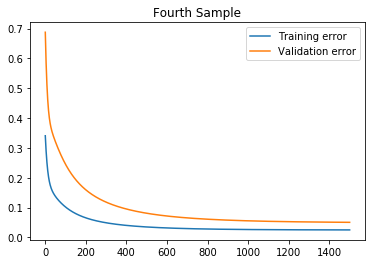

In [143]:
plt.plot([i for i in range(len(train_error4))], train_error4, label='Training error')
plt.plot([i for i in range(len(valid_error4))], valid_error4, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Fourth Sample')

In [144]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample5)
learning_rate = 0.01
train_error5, valid_error5, theta5 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.48442417 1.44800423 1.52068411 1.44692991 1.48579992 1.44815299
 1.52182133 1.4556237  1.5358848  1.44220663 1.43997694 1.46439813
 1.51607587 1.45389634]
Training Error:  0.3813716814757396
Iteration:  1
Previous theta :  [1.48442417 1.44800423 1.52068411 1.44692991 1.48579992 1.44815299
 1.52182133 1.4556237  1.5358848  1.44220663 1.43997694 1.46439813
 1.51607587 1.45389634]
New theta_0 : [1.46904995 1.3985578  1.53926683 1.39694607 1.47193194 1.39934467
 1.54193505 1.41386536 1.56903915 1.38733745 1.38298509 1.43059963
 1.53071392 1.41036519]
Training Error:  0.36544793715552853
Iteration:  2
Previous theta :  [1.46904995 1.3985578  1.53926683 1.39694607 1.47193194 1.39934467
 1.54193505 1.41386536 1.56903915 1.38733745 1.38298509 1.43059963
 1.53071392 1.41036519]
New theta_0 : [1.45387248 1.35151733 1.55588015 1.34986617 1.45837941 1.35339536
 1.56044474 1.37456839 1.5996285

New theta_0 : [1.00022342 0.51797243 1.49837506 0.65906349 1.08767474 0.68706106
 1.67913579 0.80198625 1.82485601 0.44089855 0.39350325 0.8361673
 1.55398939 0.72366514]
Training Error:  0.1677772547320928
Iteration:  40
Previous theta :  [1.00022342 0.51797243 1.49837506 0.65906349 1.08767474 0.68706106
 1.67913579 0.80198625 1.82485601 0.44089855 0.39350325 0.8361673
 1.55398939 0.72366514]
New theta_0 : [0.99030656 0.50776081 1.48947636 0.65358539 1.07977335 0.68199643
 1.67563174 0.79733463 1.82015748 0.43061808 0.38247869 0.82909545
 1.54846647 0.71719482]
Training Error:  0.16640286176461155
Iteration:  41
Previous theta :  [0.99030656 0.50776081 1.48947636 0.65358539 1.07977335 0.68199643
 1.67563174 0.79733463 1.82015748 0.43061808 0.38247869 0.82909545
 1.54846647 0.71719482]
New theta_0 : [0.98049143 0.4978473  1.48048914 0.64837372 1.07194253 0.67719154
 1.67201401 0.79288952 1.81527383 0.42066672 0.37178766 0.82220293
 1.54284275 0.71094608]
Training Error:  0.165069427116

New theta_0 : [0.6927816  0.26811786 1.16114005 0.55392446 0.83365595 0.59404333
 1.51702228 0.70128083 1.59682935 0.19966936 0.12539348 0.64640221
 1.32107554 0.56566278]
Training Error:  0.13118832429141666
Iteration:  77
Previous theta :  [0.6927816  0.26811786 1.16114005 0.55392446 0.83365595 0.59404333
 1.51702228 0.70128083 1.59682935 0.19966936 0.12539348 0.64640221
 1.32107554 0.56566278]
New theta_0 : [0.68595513 0.26366042 1.15265385 0.55241555 0.82770799 0.59279575
 1.51247725 0.69941929 1.5903408  0.19559405 0.12057541 0.64244482
 1.31466917 0.56251865]
Training Error:  0.13042467936999272
Iteration:  78
Previous theta :  [0.68595513 0.26366042 1.15265385 0.55241555 0.82770799 0.59279575
 1.51247725 0.69941929 1.5903408  0.19559405 0.12057541 0.64244482
 1.31466917 0.56251865]
New theta_0 : [0.67919642 0.25927826 1.14422278 0.55093261 0.82180176 0.59157146
 1.50794553 0.6975685  1.58387028 0.19159683 0.11583388 0.63852134
 1.30827844 0.55939765]
Training Error:  0.129668668

  1.03852501  0.42858354]
New theta_0 : [ 0.42678891  0.11343015  0.81068697  0.49406153  0.58613146  0.54426125
  1.31557667  0.61227308  1.30936465  0.06531167 -0.04675146  0.48025708
  1.03325406  0.42589499]
Training Error:  0.1010561560563566
Iteration:  126
Previous theta :  [ 0.42678891  0.11343015  0.81068697  0.49406153  0.58613146  0.54426125
  1.31557667  0.61227308  1.30936465  0.06531167 -0.04675146  0.48025708
  1.03325406  0.42589499]
New theta_0 : [ 0.42259849  0.11125988  0.80483255  0.49295814  0.5819175   0.54331192
  1.3119462   0.61041741  1.30419872  0.06357367 -0.04927765  0.47730146
  1.02800895  0.42321116]
Training Error:  0.10056801451945019
Iteration:  127
Previous theta :  [ 0.42259849  0.11125988  0.80483255  0.49295814  0.5819175   0.54331192
  1.3119462   0.61041741  1.30419872  0.06357367 -0.04927765  0.47730146
  1.02800895  0.42321116]
New theta_0 : [ 0.41844963  0.10911869  0.79902416  0.49185639  0.57773353  0.54236235
  1.30833398  0.60855992  1.29

Training Error:  0.08332357227776832
Iteration:  169
Previous theta :  [ 0.27953186  0.04192323  0.5960321   0.4478823   0.42980706  0.50308326
  1.1744941   0.53186865  1.10925231  0.01283095 -0.13291748  0.36445573
  0.83023893  0.31483472]
New theta_0 : [ 0.27680373  0.04069677  0.59183759  0.44683899  0.42672429  0.50211862
  1.17154295  0.53001023  1.10508134  0.01205812 -0.13446147  0.36201391
  0.82604189  0.31236327]
Training Error:  0.08297965599782925
Iteration:  170
Previous theta :  [ 0.27680373  0.04069677  0.59183759  0.44683899  0.42672429  0.50211862
  1.17154295  0.53001023  1.10508134  0.01205812 -0.13446147  0.36201391
  0.82604189  0.31236327]
New theta_0 : [ 0.27410274  0.03948636  0.58767472  0.4457972   0.42366425  0.50115388
  1.16860516  0.52815349  1.10092988  0.01130188 -0.13598805  0.35958257
  0.82186738  0.30989721]
Training Error:  0.082638400633975
Iteration:  171
Previous theta :  [ 0.27410274  0.03948636  0.58767472  0.4457972   0.42366425  0.50115388


New theta_0 : [ 0.18915432  0.00353379  0.45044968  0.40743815  0.32279619  0.46456924
  1.06597608  0.45941836  0.95629992 -0.00701292 -0.18282234  0.27447578
  0.6789998   0.22034111]
Training Error:  0.07141150954229077
Iteration:  209
Previous theta :  [ 0.18915432  0.00353379  0.45044968  0.40743815  0.32279619  0.46456924
  1.06597608  0.45941836  0.95629992 -0.00701292 -0.18282234  0.27447578
  0.6789998   0.22034111]
New theta_0 : [ 0.18732662  0.00280944  0.44733097  0.40646347  0.32051201  0.46361223
  1.06349091  0.45767019  0.95280709 -0.00726355 -0.18380087  0.2724161
  0.67563066  0.21809718]
Training Error:  0.07115648057872787
Iteration:  210
Previous theta :  [ 0.18732662  0.00280944  0.44733097  0.40646347  0.32051201  0.46361223
  1.06349091  0.45767019  0.95280709 -0.00726355 -0.18380087  0.2724161
  0.67563066  0.21809718]
New theta_0 : [ 0.18551717  0.00209457  0.44423477  0.40549068  0.31824511  0.46265569
  1.0610158   0.45592566  0.94932883 -0.00750425 -0.18476

Training Error:  0.06116466330130922
Iteration:  256
Previous theta :  [ 0.12032922 -0.02202669  0.32550438  0.36373291  0.23227909  0.42023837
  0.95907747  0.38160404  0.80640263 -0.00987085 -0.21843034  0.18644656
  0.53952847  0.12131385]
New theta_0 : [ 0.11918926 -0.0224174   0.32327008  0.36285069  0.23068742  0.41931234
  0.9570027   0.38005206  0.80349917 -0.00977027 -0.21899274  0.18475542
  0.53694794  0.11934973]
Training Error:  0.060980430830770406
Iteration:  257
Previous theta :  [ 0.11918926 -0.0224174   0.32327008  0.36285069  0.23068742  0.41931234
  0.9570027   0.38005206  0.80349917 -0.00977027 -0.21899274  0.18475542
  0.53694794  0.11934973]
New theta_0 : [ 0.11806071 -0.02280304  0.32105127  0.36197048  0.22910808  0.41838712
  0.95493547  0.3785046   0.80060641 -0.00966434 -0.21954835  0.18307132
  0.53438218  0.11739151]
Training Error:  0.06079742135251968
Iteration:  258
Previous theta :  [ 0.11806071 -0.02280304  0.32105127  0.36197048  0.22910808  0.418387

Iteration:  296
Previous theta :  [ 0.08260215 -0.03429745  0.24714598  0.3299986   0.17739633  0.38386766
  0.88158224  0.32310447  0.69802348 -0.00231848 -0.23626328  0.12400524
  0.44708559  0.04728402]
New theta_0 : [ 0.08184003 -0.0345306   0.24544927  0.32919567  0.17623349  0.38297686
  0.87977954  0.3217366   0.69550279 -0.00205275 -0.2366024   0.12257333
  0.44503793  0.04555022]
Training Error:  0.054517801351365934
Iteration:  297
Previous theta :  [ 0.08184003 -0.0345306   0.24544927  0.32919567  0.17623349  0.38297686
  0.87977954  0.3217366   0.69550279 -0.00205275 -0.2366024   0.12257333
  0.44503793  0.04555022]
New theta_0 : [ 0.08108555 -0.03476081  0.24376409  0.32839468  0.17507982  0.38208698
  0.87798296  0.32037334  0.6929906  -0.00178398 -0.23693705  0.12114734
  0.44300214  0.04382199]
Training Error:  0.05437655153367035
Iteration:  298
Previous theta :  [ 0.08108555 -0.03476081  0.24376409  0.32839468  0.17507982  0.38208698
  0.87798296  0.32037334  0.692990

Training Error:  0.0494996879269637
Iteration:  337
Previous theta :  [ 0.05687664 -0.04183487  0.18621759  0.29863965  0.13656029  0.34812561
  0.81239274  0.27075183  0.60118655  0.01063558 -0.24694137  0.06989373
  0.3721943  -0.01935072]
New theta_0 : [ 0.05637247 -0.04197607  0.18493261  0.29791385  0.13572236  0.34727415
  0.8108188   0.26956876  0.59898003  0.01099397 -0.24713002  0.06868495
  0.37058248 -0.02086532]
Training Error:  0.04938930615308256
Iteration:  338
Previous theta :  [ 0.05637247 -0.04197607  0.18493261  0.29791385  0.13572236  0.34727415
  0.8108188   0.26956876  0.59898003  0.01099397 -0.24713002  0.06868495
  0.37058248 -0.02086532]
New theta_0 : [ 0.05587336 -0.04211564  0.18365629  0.29718986  0.13489116  0.34642367
  0.80924995  0.26839007  0.59678037  0.01135392 -0.24731574  0.06748113
  0.36898006 -0.02237483]
Training Error:  0.049279587712723345
Iteration:  339
Previous theta :  [ 0.05587336 -0.04211564  0.18365629  0.29718986  0.13489116  0.3464236

Iteration:  371
Previous theta :  [ 0.04229061 -0.04584966  0.14705514  0.27495563  0.11155992  0.31972581
  0.7616043   0.23292333  0.5298304   0.02354837 -0.2518757   0.0314576
  0.32235887 -0.0680666 ]
New theta_0 : [ 0.04193274 -0.0459471   0.14603428  0.27428926  0.11092446  0.31890769
  0.76019172  0.23188358  0.5278401   0.0239463  -0.25197973  0.03040623
  0.32103818 -0.06941525]
Training Error:  0.04600241770373034
Iteration:  372
Previous theta :  [ 0.04193274 -0.0459471   0.14603428  0.27428926  0.11092446  0.31890769
  0.76019172  0.23188358  0.5278401   0.0239463  -0.25197973  0.03040623
  0.32103818 -0.06941525]
New theta_0 : [ 0.04157846 -0.04604356  0.14502033  0.27362458  0.11029419  0.31809054
  0.75878355  0.23084789  0.52585565  0.02434502 -0.2520817   0.02935916
  0.31972521 -0.07075923]
Training Error:  0.04591271517187914
Iteration:  373
Previous theta :  [ 0.04157846 -0.04604356  0.14502033  0.27362458  0.11029419  0.31809054
  0.75878355  0.23084789  0.52585565

Iteration:  421
Previous theta :  [ 0.02816233 -0.04979098  0.1036666   0.24362043  0.08543536  0.28001444
  0.69607985  0.18568233  0.43701189  0.0440944  -0.25491694 -0.01619685
  0.26494939 -0.13005354]
New theta_0 : [ 0.02794603 -0.04985522  0.10294218  0.24303337  0.0850163   0.2792449
  0.69486932  0.18483168  0.43528534  0.04451291 -0.25493994 -0.01705471
  0.2639639  -0.13118543]
Training Error:  0.042092873316422606
Iteration:  422
Previous theta :  [ 0.02794603 -0.04985522  0.10294218  0.24303337  0.0850163   0.2792449
  0.69486932  0.18483168  0.43528534  0.04451291 -0.25493994 -0.01705471
  0.2639639  -0.13118543]
New theta_0 : [ 0.0277319  -0.04991905  0.10222279  0.24244779  0.08460077  0.27847633
  0.69366248  0.18398454  0.43356352  0.04493152 -0.25496172 -0.0179091
  0.26298415 -0.13231332]
Training Error:  0.04202542446585576
Iteration:  423
Previous theta :  [ 0.0277319  -0.04991905  0.10222279  0.24244779  0.08460077  0.27847633
  0.69366248  0.18398454  0.43356352 

New theta_0 : [ 0.02114852 -0.05205674  0.07887279  0.22179373  0.07147587  0.25070754
  0.65148464  0.15500152  0.3730172   0.06040146 -0.25501435 -0.04721742
  0.23047333 -0.17134092]
Training Error:  0.03977476159938588
Iteration:  460
Previous theta :  [ 0.02114852 -0.05205674  0.07887279  0.22179373  0.07147587  0.25070754
  0.65148464  0.15500152  0.3730172   0.06040146 -0.25501435 -0.04721742
  0.23047333 -0.17134092]
New theta_0 : [ 0.02100234 -0.05210994  0.07832326  0.22126197  0.07117611  0.24997493
  0.65040872  0.15427931  0.37146204  0.06081711 -0.25499809 -0.04795063
  0.22968817 -0.17232564]
Training Error:  0.039720033458830316
Iteration:  461
Previous theta :  [ 0.02100234 -0.05210994  0.07832326  0.22126197  0.07117611  0.24997493
  0.65040872  0.15427931  0.37146204  0.06081711 -0.25499809 -0.04795063
  0.22968817 -0.17232564]
New theta_0 : [ 0.02085762 -0.05216297  0.0777777   0.22073157  0.07087895  0.24924325
  0.64933601  0.15356018  0.36991094  0.06123253 -0.25

New theta_0 : [ 0.01767323 -0.05344443  0.06535882  0.20789891  0.06424078  0.23125231
  0.62353602  0.13655057  0.33241178  0.07152997 -0.25431799 -0.06602096
  0.21079266 -0.19672191]
Training Error:  0.03839575268388902
Iteration:  487
Previous theta :  [ 0.01767323 -0.05344443  0.06535882  0.20789891  0.06424078  0.23125231
  0.62353602  0.13655057  0.33241178  0.07152997 -0.25431799 -0.06602096
  0.21079266 -0.19672191]
New theta_0 : [ 0.01756169 -0.05349434  0.06490831  0.20740231  0.06400474  0.23054462
  0.62254354  0.13590772  0.3309613   0.07193774 -0.25428294 -0.06667926
  0.21012113 -0.19761525]
Training Error:  0.03834840234331546
Iteration:  488
Previous theta :  [ 0.01756169 -0.05349434  0.06490831  0.20740231  0.06400474  0.23054462
  0.62254354  0.13590772  0.3309613   0.07193774 -0.25428294 -0.06667926
  0.21012113 -0.19761525]
New theta_0 : [ 0.01745126 -0.05354418  0.06446117  0.20690697  0.06377081  0.22983784
  0.62155402  0.13526765  0.3295145   0.07234515 -0.254

New theta_0 : [ 0.01444205 -0.05511571  0.05181723  0.19169942  0.05730684  0.20769762
  0.59139274  0.11620093  0.28508663  0.08516974 -0.25283322 -0.08700205
  0.18999593 -0.22534921]
Training Error:  0.036917827423581816
Iteration:  521
Previous theta :  [ 0.01444205 -0.05511571  0.05181723  0.19169942  0.05730684  0.20769762
  0.59139274  0.11620093  0.28508663  0.08516974 -0.25283322 -0.08700205
  0.18999593 -0.22534921]
New theta_0 : [ 0.01436263 -0.05516451  0.05147075  0.19124371  0.05713406  0.20702048
  0.59049552  0.11564749  0.28375444  0.08556324 -0.2527816  -0.08757748
  0.18944356 -0.22613879]
Training Error:  0.03687820647952599
Iteration:  522
Previous theta :  [ 0.01436263 -0.05516451  0.05147075  0.19124371  0.05713406  0.20702048
  0.59049552  0.11564749  0.28375444  0.08556324 -0.2527816  -0.08757748
  0.18944356 -0.22613879]
New theta_0 : [ 0.014284   -0.05521331  0.05112703  0.19078914  0.05696289  0.20634423
  0.58960095  0.11509652  0.28242552  0.08595627 -0.25

New theta_0 : [ 0.01261376 -0.05638935  0.04366339  0.18021647  0.05330827  0.19037724
  0.56890472  0.10258744  0.25148596  0.09524097 -0.25137668 -0.10125254
  0.17660982 -0.24497063]
Training Error:  0.03595111459499574
Iteration:  547
Previous theta :  [ 0.01261376 -0.05638935  0.04366339  0.18021647  0.05330827  0.19037724
  0.56890472  0.10258744  0.25148596  0.09524097 -0.25137668 -0.10125254
  0.17660982 -0.24497063]
New theta_0 : [ 0.01255245 -0.05643869  0.04338352  0.17978966  0.05317363  0.18972282
  0.56807374  0.10209501  0.25023545  0.09562144 -0.25131644 -0.10177217
  0.17613343 -0.24568872]
Training Error:  0.035916437781777395
Iteration:  548
Previous theta :  [ 0.01255245 -0.05643869  0.04338352  0.17978966  0.05317363  0.18972282
  0.56807374  0.10209501  0.25023545  0.09562144 -0.25131644 -0.10177217
  0.17613343 -0.24568872]
New theta_0 : [ 0.01249175 -0.05648807  0.04310602  0.17936393  0.05304032  0.18906926
  0.5672452   0.10160481  0.24898796  0.09600138 -0.25

  0.15874292 -0.27297611]
Training Error:  0.0346348721991432
Iteration:  589
Previous theta :  [ 0.01049776 -0.05850229  0.03379456  0.16318349  0.04867683  0.16362447
  0.5360217   0.08372473  0.20144531  0.11075178 -0.24865198 -0.12142634
  0.15874292 -0.27297611]
New theta_0 : [ 0.01045734 -0.0585538   0.03360297  0.16279945  0.04858943  0.16300554
  0.53528703  0.08331858  0.20031314  0.11110905 -0.24858323 -0.1218678
  0.15836667 -0.27359172]
Training Error:  0.03460676402349188
Iteration:  590
Previous theta :  [ 0.01045734 -0.0585538   0.03360297  0.16279945  0.04858943  0.16300554
  0.53528703  0.08331858  0.20031314  0.11110905 -0.24858323 -0.1218678
  0.15836667 -0.27359172]
New theta_0 : [ 0.01041733 -0.05860536  0.03341323  0.16241637  0.04850296  0.16238744
  0.5345545   0.08291432  0.1991836   0.11146576 -0.24851434 -0.12230755
  0.15799251 -0.27420507]
Training Error:  0.03457879386238101
Iteration:  591
Previous theta :  [ 0.01041733 -0.05860536  0.03341323  0.16241637

Training Error:  0.03334031782189924
Iteration:  641
Previous theta :  [ 0.00884712 -0.06126628  0.02606     0.14443643  0.04523169  0.13251795
  0.50052196  0.06493917  0.14589484  0.12856391 -0.24494644 -0.14227752
  0.14169045 -0.30216513]
New theta_0 : [ 0.00882297 -0.06132116  0.02595147  0.14409929  0.04518457  0.13194089
  0.4998905   0.06462133  0.14488964  0.12889107 -0.24487353 -0.14263937
  0.14140777 -0.30267346]
Training Error:  0.033318455325272
Iteration:  642
Previous theta :  [ 0.00882297 -0.06132116  0.02595147  0.14409929  0.04518457  0.13194089
  0.4998905   0.06462133  0.14488964  0.12889107 -0.24487353 -0.14263937
  0.14140777 -0.30267346]
New theta_0 : [ 0.00879906 -0.06137611  0.02584429  0.143763    0.04513808  0.13136462
  0.49926087  0.06430502  0.1438867   0.12921764 -0.24480059 -0.14299984
  0.14112662 -0.30317992]
Training Error:  0.03329669623070183
Iteration:  643
Previous theta :  [ 0.00879906 -0.06137611  0.02584429  0.143763    0.04513808  0.13136462


Iteration:  683
Previous theta :  [ 0.00801404 -0.06362444  0.02258513  0.13097807  0.04373448  0.10894595
  0.47551271  0.05282696  0.10554859  0.1418075  -0.24187547 -0.15635815
  0.13103557 -0.32197838]
New theta_0 : [ 0.00799816 -0.06368183  0.02252728  0.13067453  0.04370957  0.10840105
  0.47495343  0.05256768  0.10463292  0.14211052 -0.24180253 -0.15666707
  0.13080985 -0.32241366]
Training Error:  0.03248706537644945
Iteration:  684
Previous theta :  [ 0.00799816 -0.06368183  0.02252728  0.13067453  0.04370957  0.10840105
  0.47495343  0.05256768  0.10463292  0.14211052 -0.24180253 -0.15666707
  0.13080985 -0.32241366]
New theta_0 : [ 0.00798243 -0.06373929  0.02247048  0.13037175  0.04368509  0.10785689
  0.47439576  0.05230966  0.10371925  0.14241298 -0.24172961 -0.15697484
  0.13058532 -0.32284733]
Training Error:  0.032469181098431464
Iteration:  685
Previous theta :  [ 0.00798243 -0.06373929  0.02247048  0.13037175  0.04368509  0.10785689
  0.47439576  0.05230966  0.103719

New theta_0 : [ 0.00749945 -0.06590011  0.02105663  0.11968431  0.04305896  0.0882412
  0.45484913  0.04360802  0.0712754   0.15321122 -0.23905806 -0.16759343
  0.1230534  -0.33781534]
Training Error:  0.031861680269701396
Iteration:  722
Previous theta :  [ 0.00749945 -0.06590011  0.02105663  0.11968431  0.04305896  0.0882412
  0.45484913  0.04360802  0.0712754   0.15321122 -0.23905806 -0.16759343
  0.1230534  -0.33781534]
New theta_0 : [ 0.00748876 -0.06595938  0.02103558  0.11940894  0.04304881  0.08772484
  0.45434909  0.04339442  0.07043409  0.1534926  -0.23898678 -0.1678607
  0.12286925 -0.33819211]
Training Error:  0.031846630415590604
Iteration:  723
Previous theta :  [ 0.00748876 -0.06595938  0.02103558  0.11940894  0.04304881  0.08772484
  0.45434909  0.04339442  0.07043409  0.1534926  -0.23898678 -0.1678607
  0.12286925 -0.33819211]
New theta_0 : [ 0.00747818 -0.06601868  0.02101535  0.11913426  0.04303899  0.0872092
  0.45385047  0.0431819   0.06959458  0.15377344 -0.238915

New theta_0 : [ 0.00716257 -0.06817767  0.02079965  0.10968879  0.04287658  0.06911572
  0.43681603  0.03620711  0.04053651  0.16352872 -0.23639574 -0.17709078
  0.11667533 -0.35119441]
Training Error:  0.031334312796335445
Iteration:  760
Previous theta :  [ 0.00716257 -0.06817767  0.02079965  0.10968879  0.04287658  0.06911572
  0.43681603  0.03620711  0.04053651  0.16352872 -0.23639574 -0.17709078
  0.11667533 -0.35119441]
New theta_0 : [ 0.00715541 -0.06823822  0.02080679  0.10943834  0.04287683  0.06862598
  0.43636732  0.03603112  0.03976063  0.16379001 -0.2363271  -0.17732333
  0.11652345 -0.35152165]
Training Error:  0.031321592819053175
Iteration:  761
Previous theta :  [ 0.00715541 -0.06823822  0.02080679  0.10943834  0.04287683  0.06862598
  0.43636732  0.03603112  0.03976063  0.16379001 -0.2363271  -0.17732333
  0.11652345 -0.35152165]
New theta_0 : [ 0.00714834 -0.0682988   0.02081459  0.10918851  0.04287732  0.06813693
  0.43591989  0.03585604  0.0389864   0.16405079 -0.2

New theta_0 : [ 0.0068836  -0.07129183  0.02191429  0.09768079  0.04314587  0.04499548
  0.41547738  0.02830816  0.0029704   0.17621637 -0.23300396 -0.18794149
  0.10980855 -0.36642672]
Training Error:  0.03075090978612151
Iteration:  811
Previous theta :  [ 0.0068836  -0.07129183  0.02191429  0.09768079  0.04314587  0.04499548
  0.41547738  0.02830816  0.0029704   0.17621637 -0.23300396 -0.18794149
  0.10980855 -0.36642672]
New theta_0 : [ 0.00687964 -0.07135327  0.02194981  0.09746029  0.04315564  0.04453965
  0.41508891  0.02817362  0.00227296  0.17645249 -0.23293981 -0.18813501
  0.10969015 -0.36669748]
Training Error:  0.03074069559738083
Iteration:  812
Previous theta :  [ 0.00687964 -0.07135327  0.02194981  0.09746029  0.04315564  0.04453965
  0.41508891  0.02817362  0.00227296  0.17645249 -0.23293981 -0.18813501
  0.10969015 -0.36669748]
New theta_0 : [ 0.00687573 -0.0714147   0.02198579  0.09724034  0.04316556  0.04408446
  0.41470152  0.02803979  0.00157696  0.17668814 -0.232

Iteration:  866
Previous theta :  [ 0.00672947 -0.07467337  0.02447867  0.08633624  0.04386824  0.02086198
  0.39564752  0.02189712 -0.03333797  0.18852414 -0.22962117 -0.19762914
  0.10405528 -0.37991766]
New theta_0 : [ 0.0067277  -0.07473474  0.02453538  0.08614408  0.0438843   0.02044046
  0.39531439  0.0217977  -0.03396112  0.18873555 -0.22956247 -0.1977885
  0.10396356 -0.38013826]
Training Error:  0.03024000375518589
Iteration:  867
Previous theta :  [ 0.0067277  -0.07473474  0.02453538  0.08614408  0.0438843   0.02044046
  0.39531439  0.0217977  -0.03396112  0.18873555 -0.22956247 -0.1977885
  0.10396356 -0.38013826]
New theta_0 : [ 0.00672596 -0.0747961   0.02459239  0.0859524   0.04390044  0.02001955
  0.39498218  0.02169883 -0.03458302  0.18894653 -0.22950387 -0.19794731
  0.10387226 -0.38035803]
Training Error:  0.03023191541344062
Iteration:  868
Previous theta :  [ 0.00672596 -0.0747961   0.02459239  0.0859524   0.04390044  0.02001955
  0.39498218  0.02169883 -0.03458302 

Training Error:  0.02989329110368042
Iteration:  914
Previous theta :  [ 0.00667614 -0.07760303  0.0275122   0.07763496  0.04472162  0.00129653
  0.38065263  0.01771332 -0.06187554  0.1982053  -0.22691857 -0.2046879
  0.10008107 -0.38962986]
New theta_0 : [ 0.00667563 -0.07766361  0.02758133  0.07746459  0.04474091  0.00090312
  0.38036085  0.01763801 -0.06244132  0.19839718 -0.22686476 -0.20482289
  0.10000679 -0.38981424]
Training Error:  0.029886605453916075
Iteration:  915
Previous theta :  [ 0.00667563 -0.07766361  0.02758133  0.07746459  0.04474091  0.00090312
  0.38036085  0.01763801 -0.06244132  0.19839718 -0.22686476 -0.20482289
  0.10000679 -0.38981424]
New theta_0 : [ 0.00667515 -0.07772417  0.02765068  0.07729465  0.04476024  0.00051028
  0.38006987  0.01756315 -0.06300598  0.19858868 -0.22681106 -0.20495743
  0.09993282 -0.38999794]
Training Error:  0.02987994651719533
Iteration:  916
Previous theta :  [ 0.00667515 -0.07772417  0.02765068  0.07729465  0.04476024  0.0005102

Training Error:  0.029686140925240308
Iteration:  947
Previous theta :  [ 0.00667013 -0.07958885  0.02989456  0.07223269  0.04538136 -0.0113901
  0.37143331  0.01545279 -0.07996418  0.2043373  -0.22519664 -0.20890864
  0.09778782 -0.39536432]
New theta_0 : [ 0.00667027 -0.07964855  0.02996968  0.07207588  0.045402   -0.01176515
  0.37116669  0.01539115 -0.08049404  0.20451682 -0.22514617 -0.20902931
  0.09772313 -0.39552727]
Training Error:  0.02968027687028043
Iteration:  948
Previous theta :  [ 0.00667027 -0.07964855  0.02996968  0.07207588  0.045402   -0.01176515
  0.37116669  0.01539115 -0.08049404  0.20451682 -0.22514617 -0.20902931
  0.09772313 -0.39552727]
New theta_0 : [ 0.00667042 -0.07970823  0.03004496  0.07191946  0.04542268 -0.01213966
  0.3709008   0.01532989 -0.08102286  0.20469598 -0.22509581 -0.20914958
  0.0976587  -0.3956896 ]
Training Error:  0.029674435887749716
Iteration:  949
Previous theta :  [ 0.00667042 -0.07970823  0.03004496  0.07191946  0.04542268 -0.012139

  0.09495827 -0.4025344 ]
New theta_0 : [ 0.00669473 -0.08247533  0.03372948  0.06499496  0.04642317 -0.02914005
  0.3591832   0.01284867 -0.10473784  0.21272246 -0.22284004 -0.21437102
  0.09490483 -0.40267044]
Training Error:  0.029424175793751468
Iteration:  996
Previous theta :  [ 0.00669473 -0.08247533  0.03372948  0.06499496  0.04642317 -0.02914005
  0.3591832   0.01284867 -0.10473784  0.21272246 -0.22284004 -0.21437102
  0.09490483 -0.40267044]
New theta_0 : [ 0.00669557 -0.08253333  0.03381047  0.06485636  0.04644491 -0.02948923
  0.35894968  0.0128037  -0.10521904  0.21288514 -0.22279438 -0.2144735
  0.09485159 -0.40280597]
Training Error:  0.02941933221632912
Iteration:  997
Previous theta :  [ 0.00669557 -0.08253333  0.03381047  0.06485636  0.04644491 -0.02948923
  0.35894968  0.0128037  -0.10521904  0.21288514 -0.22279438 -0.2144735
  0.09485159 -0.40280597]
New theta_0 : [ 0.00669643 -0.08259129  0.03389154  0.06471811  0.04646667 -0.02983791
  0.35871679  0.01275903 -0.10

New theta_0 : [ 0.00673341 -0.08459428  0.03677538  0.06009307  0.04723426 -0.04172463
  0.35094645  0.0113735  -0.12193249  0.21852994 -0.22121343 -0.21794732
  0.09306362 -0.40735954]
Training Error:  0.02925680467716458
Iteration:  1033
Previous theta :  [ 0.00673341 -0.08459428  0.03677538  0.06009307  0.04723426 -0.04172463
  0.35094645  0.0113735  -0.12193249  0.21852994 -0.22121343 -0.21794732
  0.09306362 -0.40735954]
New theta_0 : [ 0.00673465 -0.08465074  0.03685887  0.05996685  0.04725631 -0.04205535
  0.35073493  0.01133869 -0.12238028  0.21868102 -0.22117124 -0.21803812
  0.0930173  -0.40747739]
Training Error:  0.029252601858777365
Iteration:  1034
Previous theta :  [ 0.00673465 -0.08465074  0.03685887  0.05996685  0.04725631 -0.04205535
  0.35073493  0.01133869 -0.12238028  0.21868102 -0.22117124 -0.21803812
  0.0930173  -0.40747739]
New theta_0 : [ 0.0067359  -0.08470716  0.0369424   0.05984094  0.04727835 -0.04238557
  0.35052398  0.01130414 -0.12282719  0.2188318  -0.

  0.09121509 -0.41204483]
New theta_0 : [ 0.00679616 -0.08703528  0.04048268  0.05483118  0.04820413 -0.05582405
  0.34215021  0.01006238 -0.14083959  0.22490147 -0.21944156 -0.22167842
  0.09117535 -0.41214495]
Training Error:  0.029086154083689832
Iteration:  1077
Previous theta :  [ 0.00679616 -0.08703528  0.04048268  0.05483118  0.04820413 -0.05582405
  0.34215021  0.01006238 -0.14083959  0.22490147 -0.21944156 -0.22167842
  0.09117535 -0.41214495]
New theta_0 : [ 0.00679776 -0.0870897   0.04056747  0.05471829  0.04822611 -0.05613395
  0.34196193  0.01003744 -0.14125096  0.22503992 -0.21940326 -0.22175727
  0.09113575 -0.41224468]
Training Error:  0.029082595269232223
Iteration:  1078
Previous theta :  [ 0.00679776 -0.0870897   0.04056747  0.05471829  0.04822611 -0.05613395
  0.34196193  0.01003744 -0.14125096  0.22503992 -0.21940326 -0.22175727
  0.09113575 -0.41224468]
New theta_0 : [ 0.00679937 -0.08714406  0.04065227  0.05460569  0.04824808 -0.05644339
  0.34177414  0.0100127  

Iteration:  1124
Previous theta :  [ 0.00687827 -0.08953867  0.04446924  0.049824    0.04922834 -0.06990285
  0.33381272  0.00908995 -0.15934801  0.23112275 -0.21773218 -0.2251292
  0.0894517  -0.41644452]
New theta_0 : [ 0.00688015 -0.08959071  0.04455386  0.04972385  0.04924989 -0.07019183
  0.33364619  0.00907334 -0.15972406  0.23124899 -0.21769777 -0.22519727
  0.08941786 -0.41652786]
Training Error:  0.02892947592845683
Iteration:  1125
Previous theta :  [ 0.00688015 -0.08959071  0.04455386  0.04972385  0.04924989 -0.07019183
  0.33364619  0.00907334 -0.15972406  0.23124899 -0.21769777 -0.22519727
  0.08941786 -0.41652786]
New theta_0 : [ 0.00688204 -0.0896427   0.04463846  0.04962395  0.04927142 -0.07048038
  0.33348009  0.00905689 -0.1600994   0.23137498 -0.21766344 -0.22526513
  0.08938414 -0.41661089]
Training Error:  0.028926499901848604
Iteration:  1126
Previous theta :  [ 0.00688204 -0.0896427   0.04463846  0.04962395  0.04927142 -0.07048038
  0.33348009  0.00905689 -0.1600

Iteration:  1182
Previous theta :  [ 0.00699483 -0.09246931  0.04933187  0.04441855  0.05045504 -0.08596914
  0.32483008  0.00836011 -0.18002246  0.23805346 -0.21586355 -0.2287525
  0.0876557  -0.42078546]
New theta_0 : [ 0.00699696 -0.09251825  0.04941465  0.04433222  0.05047573 -0.08623408
  0.32468663  0.00835128 -0.18035943  0.23816627 -0.21583353 -0.22880957
  0.08762746 -0.4208521 ]
Training Error:  0.02877376580273457
Iteration:  1183
Previous theta :  [ 0.00699696 -0.09251825  0.04941465  0.04433222  0.05047573 -0.08623408
  0.32468663  0.00835128 -0.18035943  0.23816627 -0.21583353 -0.22880957
  0.08762746 -0.4208521 ]
New theta_0 : [ 0.00699908 -0.09256714  0.04949738  0.04424611  0.0504964  -0.08649862
  0.32454354  0.00834256 -0.18069576  0.23827886 -0.21580357 -0.22886647
  0.0875993  -0.42091849]
Training Error:  0.028771360725354564
Iteration:  1184
Previous theta :  [ 0.00699908 -0.09256714  0.04949738  0.04424611  0.0504964  -0.08649862
  0.32454354  0.00834256 -0.1806

Iteration:  1223
Previous theta :  [ 0.00708427 -0.09443125  0.05268581  0.04105494  0.05128867 -0.09651111
  0.31923755  0.00808446 -0.19333179  0.24250578 -0.21468991 -0.23095894
  0.0865635  -0.42331601]
New theta_0 : [ 0.00708651 -0.09447795  0.0527665   0.04097725  0.05130861 -0.09676018
  0.31910827  0.00807979 -0.19364379  0.24261008 -0.21466272 -0.2310095
  0.08653845 -0.42337281]
Training Error:  0.028681988694232798
Iteration:  1224
Previous theta :  [ 0.00708651 -0.09447795  0.0527665   0.04097725  0.05130861 -0.09676018
  0.31910827  0.00807979 -0.19364379  0.24261008 -0.21466272 -0.2310095
  0.08653845 -0.42337281]
New theta_0 : [ 0.00708875 -0.09452459  0.05284714  0.04089977  0.05132854 -0.09700887
  0.31897931  0.0080752  -0.19395522  0.24271418 -0.21463559 -0.23105992
  0.08651347 -0.42342939]
Training Error:  0.028679916219141996
Iteration:  1225
Previous theta :  [ 0.00708875 -0.09452459  0.05284714  0.04089977  0.05132854 -0.09700887
  0.31897931  0.0080752  -0.1939

Training Error:  0.0285922232888013
Iteration:  1271
Previous theta :  [ 0.00719381 -0.09661098  0.05649023  0.03754372  0.05222368 -0.1080514
  0.31338388  0.00795292 -0.20766997  0.24729599 -0.21345733 -0.23322861
  0.08543648 -0.42580555]
New theta_0 : [ 0.00719613 -0.09665505  0.05656791  0.03747511  0.05224266 -0.10828301
  0.31326923  0.00795201 -0.20795526  0.24739126 -0.21343319 -0.23327267
  0.08541454 -0.42585256]
Training Error:  0.028590473264447674
Iteration:  1272
Previous theta :  [ 0.00719613 -0.09665505  0.05656791  0.03747511  0.05224266 -0.10828301
  0.31326923  0.00795201 -0.20795526  0.24739126 -0.21343319 -0.23327267
  0.08541454 -0.42585256]
New theta_0 : [ 0.00719845 -0.09669906  0.05664552  0.03740668  0.05226162 -0.10851427
  0.31315488  0.00795117 -0.20824002  0.24748634 -0.2134091  -0.2333166
  0.08539265 -0.42589939]
Training Error:  0.02858872949803472
Iteration:  1273
Previous theta :  [ 0.00719845 -0.09669906  0.05664552  0.03740668  0.05226162 -0.108514

Iteration:  1310
Previous theta :  [ 0.0072852  -0.09828914  0.05946779  0.03499588  0.05294858 -0.11682833
  0.30911678  0.00796376 -0.21841308  0.25088264 -0.21255925 -0.23485841
  0.08462237 -0.42750696]
New theta_0 : [ 0.00728757 -0.09833108  0.0595427   0.0349339   0.05296675 -0.11704659
  0.30901268  0.00796519 -0.21867847  0.25097123 -0.21253737 -0.23489793
  0.08460257 -0.42754719]
Training Error:  0.028526880097625582
Iteration:  1311
Previous theta :  [ 0.00728757 -0.09833108  0.0595427   0.0349339   0.05296675 -0.11704659
  0.30901268  0.00796519 -0.21867847  0.25097123 -0.21253737 -0.23489793
  0.08460257 -0.42754719]
New theta_0 : [ 0.00728993 -0.09837297  0.05961753  0.03487207  0.05298489 -0.11726453
  0.30890883  0.00796668 -0.21894336  0.25105965 -0.21251555 -0.23493733
  0.08458281 -0.42758726]
Training Error:  0.028525362990515214
Iteration:  1312
Previous theta :  [ 0.00728993 -0.09837297  0.05961753  0.03487207  0.05298489 -0.11726453
  0.30890883  0.00796668 -0.21

New theta_0 : [ 0.00741817 -0.10055531  0.06354601  0.03176264  0.05393299 -0.12855244
  0.30366206  0.00811605 -0.23254532  0.25560103 -0.21141708 -0.23691353
  0.08358669 -0.4295268 ]
Training Error:  0.028450944498464203
Iteration:  1366
Previous theta :  [ 0.00741817 -0.10055531  0.06354601  0.03176264  0.05393299 -0.12855244
  0.30366206  0.00811605 -0.23254532  0.25560103 -0.21141708 -0.23691353
  0.08358669 -0.4295268 ]
New theta_0 : [ 0.00742055 -0.10059427  0.06361662  0.03170911  0.05394996 -0.12875281
  0.30357125  0.00811994 -0.23278466  0.25568098 -0.21139816 -0.2369475
  0.08356947 -0.42955884]
Training Error:  0.028449696121645676
Iteration:  1367
Previous theta :  [ 0.00742055 -0.10059427  0.06361662  0.03170911  0.05394996 -0.12875281
  0.30357125  0.00811994 -0.23278466  0.25568098 -0.21139816 -0.2369475
  0.08356947 -0.42955884]
New theta_0 : [ 0.00742293 -0.10063317  0.06368716  0.03165572  0.05396691 -0.12895287
  0.30348066  0.00812388 -0.23302357  0.25576077 -0.2

Iteration:  1421
Previous theta :  [ 0.00754876 -0.10262072  0.06731161  0.02901837  0.05483456 -0.13912857
  0.29897847  0.00837741 -0.24507844  0.25979044 -0.21044802 -0.2386556
  0.08269799 -0.43110605]
New theta_0 : [ 0.00755113 -0.10265684  0.06737782  0.02897208  0.05485036 -0.1393127
  0.2988989   0.00838294 -0.24529483  0.25986284 -0.2104317  -0.23868504
  0.08268287 -0.43113154]
Training Error:  0.028387387852309542
Iteration:  1422
Previous theta :  [ 0.00755113 -0.10265684  0.06737782  0.02897208  0.05485036 -0.1393127
  0.2988989   0.00838294 -0.24529483  0.25986284 -0.2104317  -0.23868504
  0.08268287 -0.43113154]
New theta_0 : [ 0.00755349 -0.10269291  0.06744396  0.02892591  0.05486613 -0.13949656
  0.29881951  0.00838848 -0.24551083  0.25993512 -0.21041542 -0.23871441
  0.08266779 -0.43115692]
Training Error:  0.028386362756954223
Iteration:  1423
Previous theta :  [ 0.00755349 -0.10269291  0.06744396  0.02892591  0.05486613 -0.13949656
  0.29881951  0.00838848 -0.24551

Text(0.5,1,'Fifth Sample')

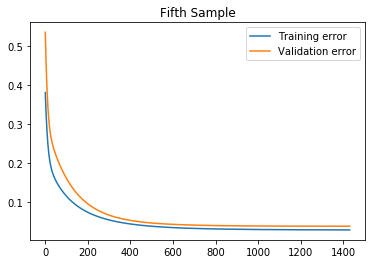

In [145]:
plt.plot([i for i in range(len(train_error5))], train_error5, label='Training error')
plt.plot([i for i in range(len(valid_error5))], valid_error5, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Fifth Sample')

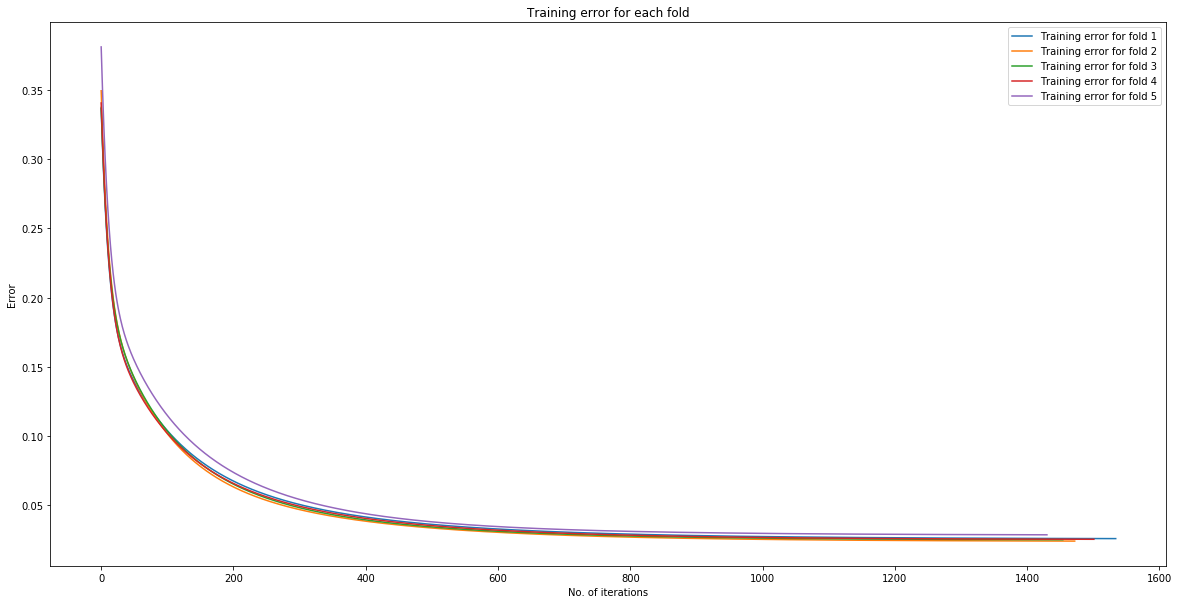

In [146]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(len(train_error1))], train_error1, label='Training error for fold 1')
plt.plot([i for i in range(len(train_error2))], train_error2, label='Training error for fold 2')
plt.plot([i for i in range(len(train_error3))], train_error3, label='Training error for fold 3')
plt.plot([i for i in range(len(train_error4))], train_error4, label='Training error for fold 4')
plt.plot([i for i in range(len(train_error5))], train_error5, label='Training error for fold 5')
plt.title("Training error for each fold")
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.gca().legend(('Training error for fold 1','Training error for fold 2', 'Training error for fold 3', 'Training error for fold 4', 'Training error for fold 5'))

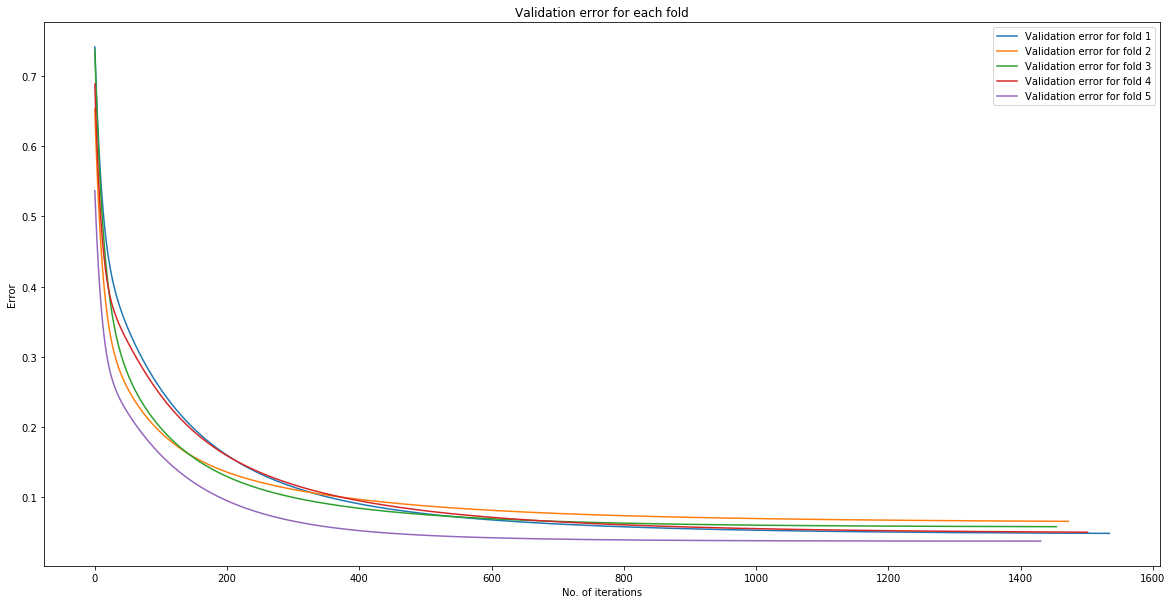

In [147]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(len(valid_error1))], valid_error1, label='Validation error for fold 1')
plt.plot([i for i in range(len(valid_error2))], valid_error2, label='Validation error for fold 2')
plt.plot([i for i in range(len(valid_error3))], valid_error3, label='Validation error for fold 3')
plt.plot([i for i in range(len(valid_error4))], valid_error4, label='Validation error for fold 4')
plt.plot([i for i in range(len(valid_error5))], valid_error5, label='Validation error for fold 5')
plt.title("Validation error for each fold")
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.gca().legend(('Validation error for fold 1','Validation error for fold 2', 'Validation error for fold 3', 'Validation error for fold 4', 'Validation error for fold 5'))

In [148]:
train_error1 = np.array(train_error1)
valid_error1 = np.array(valid_error1)
train_error2 = np.array(train_error2)
valid_error2 = np.array(valid_error2)
train_error3 = np.array(train_error3)
valid_error3 = np.array(valid_error3)
train_error4 = np.array(train_error4)
valid_error4 = np.array(valid_error4)
train_error5 = np.array(train_error5)
valid_error5 = np.array(valid_error5)

In [149]:
train_error1[:len(train_error5)]

array([0.3366015 , 0.32261174, 0.30961574, ..., 0.02575337, 0.02575196,
       0.02575056])

In [150]:
all_error = np.column_stack((train_error1[:len(train_error5)], train_error2[:len(train_error5)], train_error3[:len(train_error5)], train_error4[:len(train_error5)], train_error5[:len(train_error5)]))
all_error

array([[0.3366015 , 0.34964979, 0.33760552, 0.34079556, 0.38137168],
       [0.32261174, 0.33474228, 0.32387912, 0.32663791, 0.36544794],
       [0.30961574, 0.32094086, 0.31115439, 0.31346335, 0.35064127],
       ...,
       [0.02575337, 0.02387653, 0.02483756, 0.02521177, 0.02838029],
       [0.02575196, 0.02387536, 0.02483646, 0.0252105 , 0.02837929],
       [0.02575056, 0.0238742 , 0.02483538, 0.02520924, 0.02837829]])

In [151]:
all_error_v = np.column_stack((valid_error1[:len(valid_error5)], valid_error2[:len(valid_error5)], valid_error3[:len(valid_error5)], valid_error4[:len(valid_error5)], valid_error5[:len(valid_error5)]))
all_error_v

array([[0.74089828, 0.65301711, 0.73755957, 0.68782442, 0.53630942],
       [0.71293301, 0.62482995, 0.70827971, 0.65897404, 0.51280861],
       [0.68702527, 0.59865245, 0.68089683, 0.63236417, 0.49103166],
       ...,
       [0.04932119, 0.06620118, 0.05848367, 0.05093501, 0.03791896],
       [0.04931666, 0.06619631, 0.05848151, 0.05092954, 0.03791887],
       [0.04931214, 0.06619144, 0.05847935, 0.05092409, 0.03791878]])

In [152]:
mean_all = np.mean(all_error, axis=1)
mean_all

array([0.34920481, 0.3346638 , 0.32116312, ..., 0.0256119 , 0.02561072,
       0.02560953])

In [153]:
mean_all_v = np.mean(all_error_v, axis=1)
mean_all_v

array([0.67112176, 0.64356507, 0.61799408, ..., 0.052572  , 0.05256858,
       0.05256516])

In [154]:
std_all = np.std(all_error, axis=1)
std_all

array([0.01672727, 0.01596024, 0.01524345, ..., 0.00151362, 0.00151367,
       0.00151373])

In [155]:
std_all_v = np.std(all_error, axis=1)
std_all_v

array([0.01672727, 0.01596024, 0.01524345, ..., 0.00151362, 0.00151367,
       0.00151373])

In [156]:
K = np.array([1, 2, 3, 4, 5])
mean_train = np.array([train_error1.mean(), train_error2.mean(), train_error3.mean(), train_error4.mean(), train_error5.mean()])
std_train = np.array([train_error1.std(), train_error2.std(), train_error3.std(), train_error4.std(), train_error5.std()])

In [157]:
train_error1[0:len(train_error5)-1]

array([0.3366015 , 0.32261174, 0.30961574, ..., 0.02575478, 0.02575337,
       0.02575196])

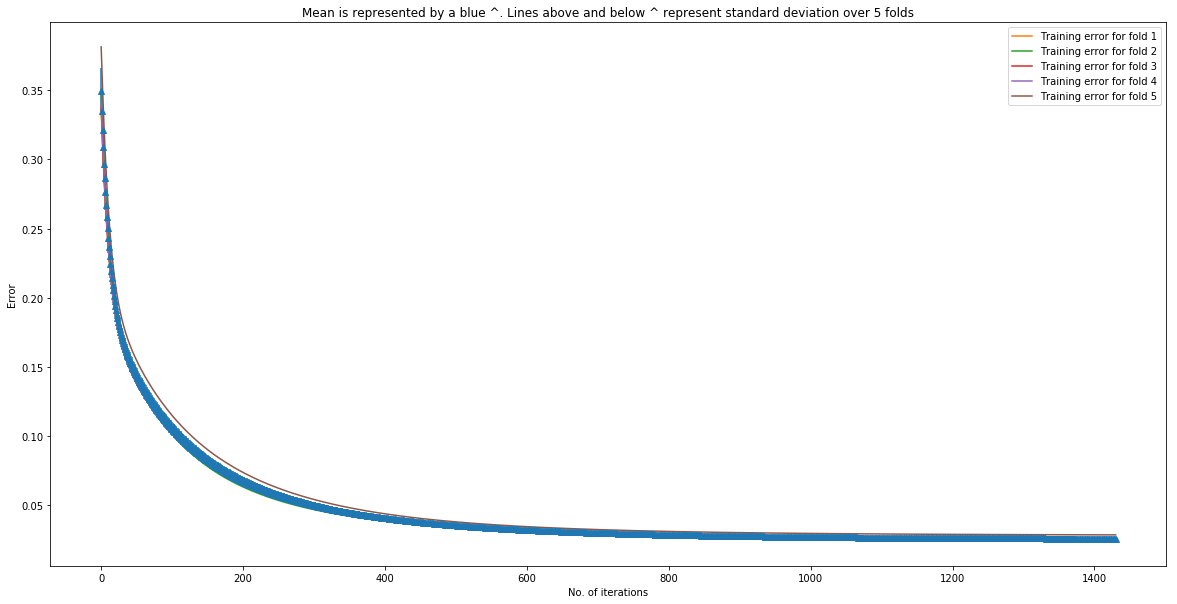

In [158]:
plt.figure(figsize=(20,10))
k = np.array([i for i in range(len(train_error5))])
plt.errorbar(k, mean_all, std_all, linestyle='None', marker='^')
plt.plot([i for i in range(len(train_error5))], train_error1[0:len(train_error5)], label='Training error for fold 1')
plt.plot([i for i in range(len(train_error5))], train_error2[0:len(train_error5)], label='Training error for fold 2')
plt.plot([i for i in range(len(train_error5))], train_error3[0:len(train_error5)], label='Training error for fold 3')
plt.plot([i for i in range(len(train_error5))], train_error4[0:len(train_error5)], label='Training error for fold 4')
plt.plot([i for i in range(len(train_error5))], train_error5[0:len(train_error5)], label='Training error for fold 5')
plt.title("Mean is represented by a blue ^. Lines above and below ^ represent standard deviation over 5 folds")
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.gca().legend(('Training error for fold 1','Training error for fold 2', 'Training error for fold 3', 'Training error for fold 4', 'Training error for fold 5'))

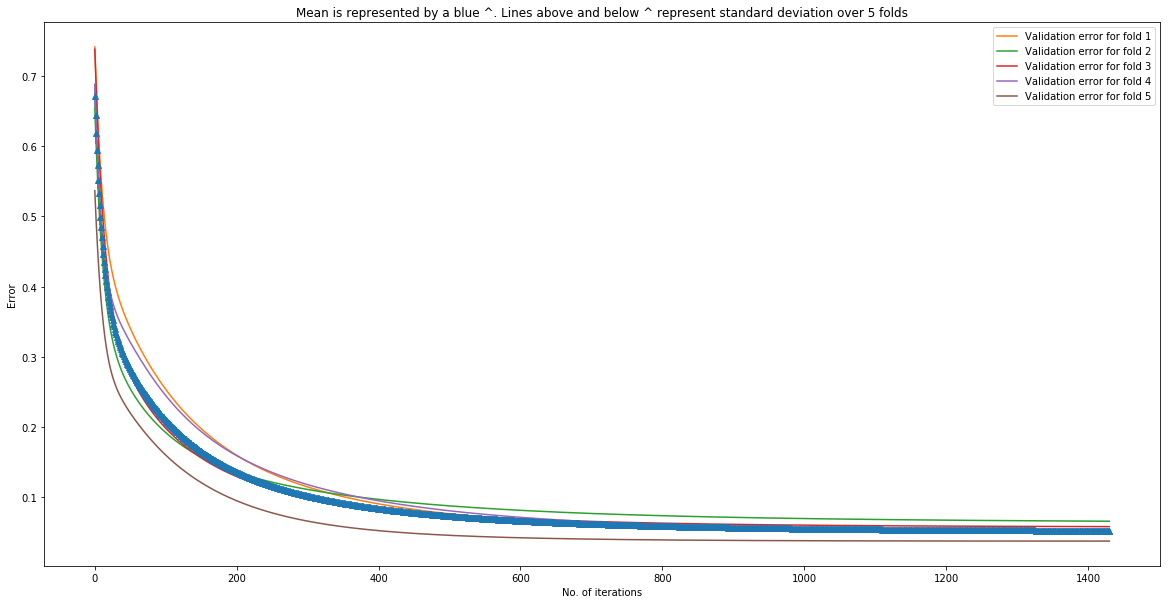

In [159]:
plt.figure(figsize=(20,10))
k = np.array([i for i in range(len(valid_error5))])
plt.errorbar(k, mean_all_v, std_all_v, linestyle='None', marker='^')
plt.plot([i for i in range(len(valid_error5))], valid_error1[0:len(valid_error5)], label='Validation error for fold 1')
plt.plot([i for i in range(len(valid_error5))], valid_error2[0:len(valid_error5)], label='Validation error for fold 2')
plt.plot([i for i in range(len(valid_error5))], valid_error3[0:len(valid_error5)], label='Validation error for fold 3')
plt.plot([i for i in range(len(valid_error5))], valid_error4[0:len(valid_error5)], label='Validation error for fold 4')
plt.plot([i for i in range(len(valid_error5))], valid_error5[0:len(valid_error5)], label='Validation error for fold 5')
plt.title("Mean is represented by a blue ^. Lines above and below ^ represent standard deviation over 5 folds")
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.gca().legend(('Validation error for fold 1','Validation error for fold 2', 'Validation error for fold 3', 'Validation error for fold 4', 'Validation error for fold 5'))

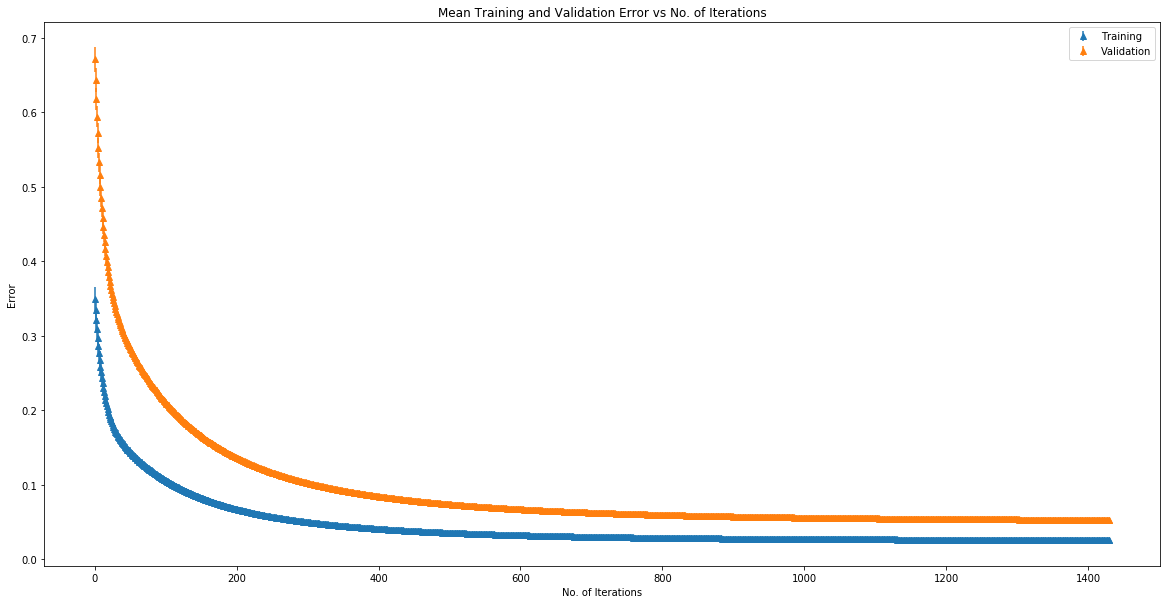

In [204]:
plt.figure(figsize=(20,10))
k = np.array([i for i in range(len(train_error5))])
plt.errorbar(k, mean_all, std_all, linestyle='None', marker='^', label = "Training")
plt.errorbar(k, mean_all_v, std_all_v, linestyle='None', marker='^', label = "Validation")
plt.title("Mean Training and Validation Error vs No. of Iterations")
plt.xlabel("No. of Iterations")
plt.ylabel("Error")
plt.gca().legend(("Training", "Validation"))

In [202]:
print ("Training set Errors")
print("Set 1: ", train_error1[-1])
print("Set 2: ", train_error2[-1])
print("Set 3: ", train_error3[-1])
print("Set 4: ", train_error4[-1])
print("Set 5: ", train_error5[-1])

Training set Errors
Set 1:  0.025627319100111644
Set 2:  0.02382903360993503
Set 3:  0.02481038203876311
Set 4:  0.025129380128540532
Set 5:  0.028378290107574655


In [203]:
print ("Validation set Errors")
print("Set 1: ", valid_error1[-1])
print("Set 2: ", valid_error2[-1])
print("Set 3: ", valid_error3[-1])
print("Set 4: ", valid_error4[-1])
print("Set 5: ", valid_error5[-1])

Validation set Errors
Set 1:  0.04891127025173885
Set 2:  0.06599705307487713
Set 3:  0.05842958725830102
Set 4:  0.05057427954073286
Set 5:  0.03791877801482076


In [162]:
print("Training Sample")
for i in K:
    print("For fold ", i, ": Error: ", mean_train[i-1], " +- ", std_train[i-1])

Training Sample
For fold  1 : Error:  0.043830224185839706  +-  0.03629144685157758
For fold  2 : Error:  0.04246930316871656  +-  0.038102413675754
For fold  3 : Error:  0.04363549790086882  +-  0.037829397459023834
For fold  4 : Error:  0.04337251294577857  +-  0.036645186820885425
For fold  5 : Error:  0.04914929423729707  +-  0.04197382575290009


In [163]:
mean_valid = np.array([valid_error1.mean(), valid_error2.mean(), valid_error3.mean(), valid_error4.mean(),valid_error5.mean()])
std_valid = np.array([valid_error1.std(), valid_error2.std(), valid_error3.std(), valid_error4.std(), valid_error5.std()])

In [164]:
print("Validation Sample")
for i in K:
    print("For fold: ", i, " ", mean_valid[i-1], " +- ", std_valid[i-1])

Validation Sample
For fold:  1   0.09615510795942056  +-  0.08901794374775417
For fold:  2   0.10009087039723764  +-  0.06416240162306953
For fold:  3   0.0937938323390133  +-  0.07590351400599468
For fold:  4   0.09745225314248007  +-  0.08200017267894362
For fold:  5   0.0646735090951648  +-  0.0594939754079422


## ii   Validation set with lowest error is sample 5

In [205]:
test_set = validation_sample5

In [206]:
remaining_sample = np.setdiff1d(np.array([i for i in range(len(X))]), test_set)

In [207]:
validation_sample = np.random.choice(remaining_sample, size=int(len(remaining_sample)/5))

In [208]:
def test_train_split2(X, y, sample, remaining_sample):
    RANGE = len(X)
    train_sample = np.setdiff1d(remaining_sample, sample)
    test_sample = sample[:]
    X_train = X[train_sample]
    X_test = X[test_sample]
    y_train = y[train_sample]
    y_test = y[test_sample]
    return X_train, X_test, y_train, y_test

In [209]:
X_train, X_test, y_train, y_test = test_train_split2(X, y, validation_sample, remaining_sample)

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import learning_curve

In [320]:
model_reg = linear_model.Ridge(normalize=True, tol=0.000001)

In [321]:
parameters = {'alpha': np.array([(i/100.0) for i in range(1, 2001)])}

In [322]:
train_gridcv  = GridSearchCV(model_reg, parameters, cv=5, verbose=10)

In [323]:
train_gridcv.fit(X[remaining_sample], y[remaining_sample])

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=0.48089983402660474, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] ............. alpha=0.01, score=0.6574112304490358, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .............. alpha=0.01, score=0.637233253821667, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=-0.1398625145623691, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ........... alpha=0.01, score=-0.06477095622272477, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] ............. alpha=0.02, score=0.4989800819307638, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] ......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] ............. alpha=0.11, score=0.6212526925690975, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ........... alpha=0.11, score=-0.01832702456087487, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ............. alpha=0.11, score=0.1786777906233915, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] ............. alpha=0.12, score=0.5828273941726234, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] ............. alpha=0.12, score=0.6788555855854074, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] ............. alpha=0.12, score=0.6183510645597857, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] .......... alpha=0.12, score=-0.010437971916733346, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] .

[CV] ............. alpha=0.23, score=0.5981272699250643, total=   0.0s
[CV] alpha=0.23 ......................................................
[CV] ............. alpha=0.23, score=0.6713643286632971, total=   0.0s
[CV] alpha=0.23 ......................................................
[CV] ............. alpha=0.23, score=0.5820419614068536, total=   0.0s
[CV] alpha=0.23 ......................................................
[CV] ............ alpha=0.23, score=0.05106118757668077, total=   0.0s
[CV] alpha=0.23 ......................................................
[CV] ............. alpha=0.23, score=0.2861190690233597, total=   0.0s
[CV] alpha=0.24 ......................................................
[CV] ............. alpha=0.24, score=0.5980163432981209, total=   0.0s
[CV] alpha=0.24 ......................................................
[CV] ............. alpha=0.24, score=0.6703471744684609, total=   0.0s
[CV] alpha=0.24 ......................................................
[CV] .

[CV] ............. alpha=0.45, score=0.5054512087433186, total=   0.0s
[CV] alpha=0.45 ......................................................
[CV] ............ alpha=0.45, score=0.10812934056988599, total=   0.0s
[CV] alpha=0.45 ......................................................
[CV] ............. alpha=0.45, score=0.3625174098477592, total=   0.0s
[CV] alpha=0.46 ......................................................
[CV] ............. alpha=0.46, score=0.5729431275540303, total=   0.0s
[CV] alpha=0.46 ......................................................
[CV] ............. alpha=0.46, score=0.6432742011710796, total=   0.0s
[CV] alpha=0.46 ......................................................
[CV] ............. alpha=0.46, score=0.5020822827655932, total=   0.0s
[CV] alpha=0.46 ......................................................
[CV] ............ alpha=0.46, score=0.10971323507049004, total=   0.0s
[CV] alpha=0.46 ......................................................
[CV] .

[CV] ............. alpha=0.66, score=0.1321831808436884, total=   0.0s
[CV] alpha=0.66 ......................................................
[CV] ............ alpha=0.66, score=0.38165956536879136, total=   0.0s
[CV] alpha=0.67 ......................................................
[CV] ............. alpha=0.67, score=0.5365700863847677, total=   0.0s
[CV] alpha=0.67 ......................................................
[CV] ............. alpha=0.67, score=0.6149319496604252, total=   0.0s
[CV] alpha=0.67 ......................................................
[CV] ............. alpha=0.67, score=0.4349516883530765, total=   0.0s
[CV] alpha=0.67 ......................................................
[CV] ............ alpha=0.67, score=0.13296395246684578, total=   0.0s
[CV] alpha=0.67 ......................................................
[CV] ............. alpha=0.67, score=0.3818694538335923, total=   0.0s
[CV] alpha=0.68 ......................................................
[CV] .

[CV] ............. alpha=0.78, score=0.4026054514305115, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ............ alpha=0.78, score=0.14011626512825404, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ............. alpha=0.78, score=0.3812587220032938, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ............. alpha=0.79, score=0.5158006255414234, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ............. alpha=0.79, score=0.5989064698007299, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ............. alpha=0.79, score=0.3997580169931597, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ............ alpha=0.79, score=0.14065370675917055, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] .

[CV] .............. alpha=1.0, score=0.4817690286367929, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.5718615419596842, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.3433145950090103, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ............. alpha=1.0, score=0.14884806011812846, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ............. alpha=1.0, score=0.36823916891009145, total=   0.0s
[CV] alpha=1.01 ......................................................
[CV] ............ alpha=1.01, score=0.48023669564769444, total=   0.0s
[CV] alpha=1.01 ......................................................
[CV] ............. alpha=1.01, score=0.5706116490795644, total=   0.0s
[CV] alpha=1.01 ......................................................
[CV] .

[CV] ............. alpha=1.21, score=0.4513426492587414, total=   0.0s
[CV] alpha=1.21 ......................................................
[CV] ............. alpha=1.21, score=0.5463987212795556, total=   0.0s
[CV] alpha=1.21 ......................................................
[CV] ............. alpha=1.21, score=0.2926450442729821, total=   0.0s
[CV] alpha=1.21 ......................................................
[CV] ............ alpha=1.21, score=0.15305700984516057, total=   0.0s
[CV] alpha=1.21 ......................................................
[CV] .............. alpha=1.21, score=0.346574128639454, total=   0.0s
[CV] alpha=1.22 ......................................................
[CV] ............. alpha=1.22, score=0.4499843987251104, total=   0.0s
[CV] alpha=1.22 ......................................................
[CV] ............. alpha=1.22, score=0.5452278066498408, total=   0.0s
[CV] alpha=1.22 ......................................................
[CV] .

[CV] ............ alpha=1.43, score=0.24481265243206385, total=   0.0s
[CV] alpha=1.43 ......................................................
[CV] ............ alpha=1.43, score=0.15501583835020694, total=   0.0s
[CV] alpha=1.43 ......................................................
[CV] ............ alpha=1.43, score=0.31814457663830753, total=   0.0s
[CV] alpha=1.44 ......................................................
[CV] ............ alpha=1.44, score=0.42206569490532897, total=   0.0s
[CV] alpha=1.44 ......................................................
[CV] ............. alpha=1.44, score=0.5204179740409773, total=   0.0s
[CV] alpha=1.44 ......................................................
[CV] ............ alpha=1.44, score=0.24275206654870063, total=   0.0s
[CV] alpha=1.44 ......................................................
[CV] ............ alpha=1.44, score=0.15506334641126285, total=   0.0s
[CV] alpha=1.44 ......................................................
[CV] .

[CV] ............. alpha=1.63, score=0.5004063985285196, total=   0.0s
[CV] alpha=1.63 ......................................................
[CV] ............ alpha=1.63, score=0.20528612988591588, total=   0.0s
[CV] alpha=1.63 ......................................................
[CV] ............ alpha=1.63, score=0.15546152059125995, total=   0.0s
[CV] alpha=1.63 ......................................................
[CV] ............. alpha=1.63, score=0.2891613621885508, total=   0.0s
[CV] alpha=1.64 ......................................................
[CV] ............. alpha=1.64, score=0.3996771152644089, total=   0.0s
[CV] alpha=1.64 ......................................................
[CV] ............. alpha=1.64, score=0.4993879001195922, total=   0.0s
[CV] alpha=1.64 ......................................................
[CV] ............ alpha=1.64, score=0.20339837982553932, total=   0.0s
[CV] alpha=1.64 ......................................................
[CV] .

[CV] ............ alpha=1.84, score=0.15504886865307577, total=   0.0s
[CV] alpha=1.84 ......................................................
[CV] .............. alpha=1.84, score=0.256753286658457, total=   0.0s
[CV] alpha=1.85 ......................................................
[CV] ............ alpha=1.85, score=0.37882202675280197, total=   0.0s
[CV] alpha=1.85 ......................................................
[CV] ............. alpha=1.85, score=0.4787602192867682, total=   0.0s
[CV] alpha=1.85 ......................................................
[CV] ............. alpha=1.85, score=0.1655136313708071, total=   0.0s
[CV] alpha=1.85 ......................................................
[CV] ............. alpha=1.85, score=0.1550122220334189, total=   0.0s
[CV] alpha=1.85 ......................................................
[CV] ............. alpha=1.85, score=0.2551745808163086, total=   0.0s
[CV] alpha=1.86 ......................................................
[CV] .

[CV] ............ alpha=2.07, score=0.21989303740571095, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ............ alpha=2.08, score=0.35864023263800493, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ............ alpha=2.08, score=0.45773092784377656, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ............. alpha=2.08, score=0.1274888460230722, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ............ alpha=2.08, score=0.15384456750119901, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ............ alpha=2.08, score=0.21826967635981845, total=   0.0s
[CV] alpha=2.09 ......................................................
[CV] ............. alpha=2.09, score=0.3578189379297955, total=   0.0s
[CV] alpha=2.09 ......................................................
[CV] .

[CV] ............ alpha=2.19, score=0.20033720669899135, total=   0.0s
[CV] alpha=2.2 .......................................................
[CV] .............. alpha=2.2, score=0.3490671307897134, total=   0.0s
[CV] alpha=2.2 .......................................................
[CV] .............. alpha=2.2, score=0.4473552530089299, total=   0.0s
[CV] alpha=2.2 .......................................................
[CV] .............. alpha=2.2, score=0.1089163174822354, total=   0.0s
[CV] alpha=2.2 .......................................................
[CV] .............. alpha=2.2, score=0.1530337748116083, total=   0.0s
[CV] alpha=2.2 .......................................................
[CV] ............. alpha=2.2, score=0.19870123033134002, total=   0.0s
[CV] alpha=2.21 ......................................................
[CV] ............. alpha=2.21, score=0.3482963554090683, total=   0.0s
[CV] alpha=2.21 ......................................................
[CV] .

[CV] ............ alpha=2.36, score=0.15179084207460547, total=   0.0s
[CV] alpha=2.36 ......................................................
[CV] ............. alpha=2.36, score=0.1724433854097036, total=   0.0s
[CV] alpha=2.37 ......................................................
[CV] ............. alpha=2.37, score=0.3364887919765306, total=   0.0s
[CV] alpha=2.37 ......................................................
[CV] ............ alpha=2.37, score=0.43330194613686995, total=   0.0s
[CV] alpha=2.37 ......................................................
[CV] ............ alpha=2.37, score=0.08393311121074165, total=   0.0s
[CV] alpha=2.37 ......................................................
[CV] ............ alpha=2.37, score=0.15170790061914496, total=   0.0s
[CV] alpha=2.37 ......................................................
[CV] ............ alpha=2.37, score=0.17079884631078368, total=   0.0s
[CV] alpha=2.38 ......................................................
[CV] .

[CV] ............. alpha=2.52, score=0.1504007991608297, total=   0.0s
[CV] alpha=2.52 ......................................................
[CV] ............. alpha=2.52, score=0.1461201322755592, total=   0.0s
[CV] alpha=2.53 ......................................................
[CV] ............ alpha=2.53, score=0.32559176249663446, total=   0.0s
[CV] alpha=2.53 ......................................................
[CV] ............ alpha=2.53, score=0.42072002152659016, total=   0.0s
[CV] alpha=2.53 ......................................................
[CV] ........... alpha=2.53, score=0.061715524585893466, total=   0.0s
[CV] alpha=2.53 ......................................................
[CV] ............ alpha=2.53, score=0.15030980416741424, total=   0.0s
[CV] alpha=2.53 ......................................................
[CV] ............ alpha=2.53, score=0.14447534422340835, total=   0.0s
[CV] alpha=2.54 ......................................................
[CV] .

[CV] ............ alpha=2.72, score=0.11328493631386316, total=   0.0s
[CV] alpha=2.73 ......................................................
[CV] ............. alpha=2.73, score=0.3130976260873215, total=   0.0s
[CV] alpha=2.73 ......................................................
[CV] ............ alpha=2.73, score=0.40580261299472553, total=   0.0s
[CV] alpha=2.73 ......................................................
[CV] ............ alpha=2.73, score=0.03553487218818496, total=   0.0s
[CV] alpha=2.73 ......................................................
[CV] ............ alpha=2.73, score=0.14840509290594806, total=   0.0s
[CV] alpha=2.73 ......................................................
[CV] ............ alpha=2.73, score=0.11164788325725938, total=   0.0s
[CV] alpha=2.74 ......................................................
[CV] .............. alpha=2.74, score=0.312502959925242, total=   0.0s
[CV] alpha=2.74 ......................................................
[CV] .

[CV] ........... alpha=2.91, score=0.013337296986483893, total=   0.0s
[CV] alpha=2.91 ......................................................
[CV] ............ alpha=2.91, score=0.14657599015364176, total=   0.0s
[CV] alpha=2.91 ......................................................
[CV] .............. alpha=2.91, score=0.082294908608598, total=   0.0s
[CV] alpha=2.92 ......................................................
[CV] ............ alpha=2.92, score=0.30224500501245166, total=   0.0s
[CV] alpha=2.92 ......................................................
[CV] ............. alpha=2.92, score=0.3923975994429728, total=   0.0s
[CV] alpha=2.92 ......................................................
[CV] ........... alpha=2.92, score=0.012139385766547495, total=   0.0s
[CV] alpha=2.92 ......................................................
[CV] ............ alpha=2.92, score=0.14647173571430971, total=   0.0s
[CV] alpha=2.92 ......................................................
[CV] .

[CV] ............ alpha=3.14, score=0.29075260781154877, total=   0.0s
[CV] alpha=3.14 ......................................................
[CV] ............. alpha=3.14, score=0.3777276789397731, total=   0.0s
[CV] alpha=3.14 ......................................................
[CV] .......... alpha=3.14, score=-0.013340182908218479, total=   0.0s
[CV] alpha=3.14 ......................................................
[CV] ............ alpha=3.14, score=0.14412023106668714, total=   0.0s
[CV] alpha=3.14 ......................................................
[CV] ............ alpha=3.14, score=0.04518993996196285, total=   0.0s
[CV] alpha=3.15 ......................................................
[CV] ............. alpha=3.15, score=0.2902550886724672, total=   0.0s
[CV] alpha=3.15 ......................................................
[CV] ............ alpha=3.15, score=0.37708127302192107, total=   0.0s
[CV] alpha=3.15 ......................................................
[CV] .

[CV] ........... alpha=3.35, score=0.011804393587464546, total=   0.0s
[CV] alpha=3.36 ......................................................
[CV] ............. alpha=3.36, score=0.2802602055483142, total=   0.0s
[CV] alpha=3.36 ......................................................
[CV] ............ alpha=3.36, score=0.36389153409573516, total=   0.0s
[CV] alpha=3.36 ......................................................
[CV] .......... alpha=3.36, score=-0.037268563212891515, total=   0.0s
[CV] alpha=3.36 ......................................................
[CV] ............. alpha=3.36, score=0.1416788116890274, total=   0.0s
[CV] alpha=3.36 ......................................................
[CV] ........... alpha=3.36, score=0.010227672898954987, total=   0.0s
[CV] alpha=3.37 ......................................................
[CV] ............. alpha=3.37, score=0.2798047800903096, total=   0.0s
[CV] alpha=3.37 ......................................................
[CV] .

[CV] ............ alpha=3.55, score=0.27189999573563717, total=   0.0s
[CV] alpha=3.55 ......................................................
[CV] ............ alpha=3.55, score=0.35255566114425785, total=   0.0s
[CV] alpha=3.55 ......................................................
[CV] ........... alpha=3.55, score=-0.05680779249397094, total=   0.0s
[CV] alpha=3.55 ......................................................
[CV] ............ alpha=3.55, score=0.13951710213040103, total=   0.0s
[CV] alpha=3.55 ......................................................
[CV] ........... alpha=3.55, score=-0.01948823777900288, total=   0.0s
[CV] alpha=3.56 ......................................................
[CV] ............ alpha=3.56, score=0.27147644410911653, total=   0.0s
[CV] alpha=3.56 ......................................................
[CV] ............. alpha=3.56, score=0.3519738901209769, total=   0.0s
[CV] alpha=3.56 ......................................................
[CV] .

[CV] ........... alpha=3.74, score=-0.07539647933023685, total=   0.0s
[CV] alpha=3.74 ......................................................
[CV] ............. alpha=3.74, score=0.1373192024697517, total=   0.0s
[CV] alpha=3.74 ......................................................
[CV] .......... alpha=3.74, score=-0.048722280215148135, total=   0.0s
[CV] alpha=3.75 ......................................................
[CV] ............. alpha=3.75, score=0.2637175398281001, total=   0.0s
[CV] alpha=3.75 ......................................................
[CV] ............ alpha=3.75, score=0.34118792355296557, total=   0.0s
[CV] alpha=3.75 ......................................................
[CV] ............. alpha=3.75, score=-0.076350012004476, total=   0.0s
[CV] alpha=3.75 ......................................................
[CV] ............. alpha=3.75, score=0.1372027186314101, total=   0.0s
[CV] alpha=3.75 ......................................................
[CV] .

[CV] ............. alpha=3.96, score=0.1347420366119908, total=   0.0s
[CV] alpha=3.96 ......................................................
[CV] ........... alpha=3.96, score=-0.08193735186250728, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ............ alpha=3.97, score=0.25536374694342356, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ............. alpha=3.97, score=0.3293001169859494, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ........... alpha=3.97, score=-0.09673705108393471, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ............ alpha=3.97, score=0.13462426713143671, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ........... alpha=3.97, score=-0.08343050959709974, total=   0.0s
[CV] alpha=3.98 ......................................................
[CV] .

[CV] ........... alpha=4.17, score=-0.11298458574307711, total=   0.0s
[CV] alpha=4.18 ......................................................
[CV] ............ alpha=4.18, score=0.24794875646691308, total=   0.0s
[CV] alpha=4.18 ......................................................
[CV] ............ alpha=4.18, score=0.31850811253531897, total=   0.0s
[CV] alpha=4.18 ......................................................
[CV] ........... alpha=4.18, score=-0.11520631488575916, total=   0.0s
[CV] alpha=4.18 ......................................................
[CV] ............ alpha=4.18, score=0.13214205534944712, total=   0.0s
[CV] alpha=4.18 ......................................................
[CV] ........... alpha=4.18, score=-0.11444672931846034, total=   0.0s
[CV] alpha=4.19 ......................................................
[CV] ............ alpha=4.19, score=0.24760818218060532, total=   0.0s
[CV] alpha=4.19 ......................................................
[CV] .

[CV] ............. alpha=4.38, score=0.2413377816526832, total=   0.0s
[CV] alpha=4.38 ......................................................
[CV] ............ alpha=4.38, score=0.30869598931518305, total=   0.0s
[CV] alpha=4.38 ......................................................
[CV] ........... alpha=4.38, score=-0.13197042476205056, total=   0.0s
[CV] alpha=4.38 ......................................................
[CV] ............ alpha=4.38, score=0.12976707137016252, total=   0.0s
[CV] alpha=4.38 ......................................................
[CV] ........... alpha=4.38, score=-0.14337556455088518, total=   0.0s
[CV] alpha=4.39 ......................................................
[CV] ............ alpha=4.39, score=0.24101792062492922, total=   0.0s
[CV] alpha=4.39 ......................................................
[CV] ............ alpha=4.39, score=0.30821671370546344, total=   0.0s
[CV] alpha=4.39 ......................................................
[CV] .

[CV] ............ alpha=4.6, score=-0.17450321462431104, total=   0.0s
[CV] alpha=4.61 ......................................................
[CV] ............ alpha=4.61, score=0.23421959524794655, total=   0.0s
[CV] alpha=4.61 ......................................................
[CV] ............. alpha=4.61, score=0.2979319562930032, total=   0.0s
[CV] alpha=4.61 ......................................................
[CV] ........... alpha=4.61, score=-0.15033346053211316, total=   0.0s
[CV] alpha=4.61 ......................................................
[CV] ............ alpha=4.61, score=0.12703066862704182, total=   0.0s
[CV] alpha=4.61 ......................................................
[CV] ............ alpha=4.61, score=-0.1759008013556604, total=   0.0s
[CV] alpha=4.62 ......................................................
[CV] ............. alpha=4.62, score=0.2339209831692357, total=   0.0s
[CV] alpha=4.62 ......................................................
[CV] .

[CV] ............ alpha=4.82, score=0.12453360330756437, total=   0.0s
[CV] alpha=4.82 ......................................................
[CV] ........... alpha=4.82, score=-0.20490313616445285, total=   0.0s
[CV] alpha=4.83 ......................................................
[CV] ............ alpha=4.83, score=0.22784397451629387, total=   0.0s
[CV] alpha=4.83 ......................................................
[CV] ............ alpha=4.83, score=0.28811795417855246, total=   0.0s
[CV] alpha=4.83 ......................................................
[CV] ............ alpha=4.83, score=-0.1670535643224058, total=   0.0s
[CV] alpha=4.83 ......................................................
[CV] ............ alpha=4.83, score=0.12441481872201665, total=   0.0s
[CV] alpha=4.83 ......................................................
[CV] ........... alpha=4.83, score=-0.20626771138303002, total=   0.0s
[CV] alpha=4.84 ......................................................
[CV] .

[CV] ............ alpha=5.05, score=0.12180615141363484, total=   0.0s
[CV] alpha=5.05 ......................................................
[CV] ........... alpha=5.05, score=-0.23591136174080019, total=   0.0s
[CV] alpha=5.06 ......................................................
[CV] ............ alpha=5.06, score=0.22158259767256216, total=   0.0s
[CV] alpha=5.06 ......................................................
[CV] ............ alpha=5.06, score=0.27832409469988206, total=   0.0s
[CV] alpha=5.06 ......................................................
[CV] ........... alpha=5.06, score=-0.18372063374969305, total=   0.0s
[CV] alpha=5.06 ......................................................
[CV] ............ alpha=5.06, score=0.12168782406407208, total=   0.0s
[CV] alpha=5.06 ......................................................
[CV] ........... alpha=5.06, score=-0.23724173438242627, total=   0.0s
[CV] alpha=5.07 ......................................................
[CV] .

[CV] ............ alpha=5.27, score=-0.1982664046929863, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] ............. alpha=5.27, score=0.1192092710024315, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] ........... alpha=5.27, score=-0.26483982978912723, total=   0.0s
[CV] alpha=5.28 ......................................................
[CV] ............ alpha=5.28, score=0.21594044294673675, total=   0.0s
[CV] alpha=5.28 ......................................................
[CV] ............. alpha=5.28, score=0.2693701008510305, total=   0.0s
[CV] alpha=5.28 ......................................................
[CV] ........... alpha=5.28, score=-0.19894386283552756, total=   0.0s
[CV] alpha=5.28 ......................................................
[CV] ............ alpha=5.28, score=0.11909157585426478, total=   0.0s
[CV] alpha=5.28 ......................................................
[CV] .

[CV] ............ alpha=5.39, score=0.21323594313903282, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............ alpha=5.39, score=0.26503599002650546, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............ alpha=5.39, score=-0.2063080073110526, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............ alpha=5.39, score=0.11779915868623901, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............ alpha=5.39, score=-0.2803213468379513, total=   0.0s
[CV] alpha=5.4 .......................................................
[CV] ............. alpha=5.4, score=0.21299373830323576, total=   0.0s
[CV] alpha=5.4 .......................................................
[CV] ............. alpha=5.4, score=0.26464653557003825, total=   0.0s
[CV] alpha=5.4 .......................................................
[CV] .

[CV] ............ alpha=5.59, score=-0.2192985773749725, total=   0.0s
[CV] alpha=5.59 ......................................................
[CV] ............ alpha=5.59, score=0.11546077157992186, total=   0.0s
[CV] alpha=5.59 ......................................................
[CV] ............ alpha=5.59, score=-0.3056637394347579, total=   0.0s
[CV] alpha=5.6 .......................................................
[CV] ............. alpha=5.6, score=0.20827179450648015, total=   0.0s
[CV] alpha=5.6 .......................................................
[CV] ............. alpha=5.6, score=0.25701168658465723, total=   0.0s
[CV] alpha=5.6 .......................................................
[CV] ............ alpha=5.6, score=-0.21993505652123102, total=   0.0s
[CV] alpha=5.6 .......................................................
[CV] ............. alpha=5.6, score=0.11534427183128482, total=   0.0s
[CV] alpha=5.6 .......................................................
[CV] .

[CV] ............. alpha=5.8, score=0.20376920554504674, total=   0.0s
[CV] alpha=5.8 .......................................................
[CV] ............. alpha=5.8, score=0.24965862179150766, total=   0.0s
[CV] alpha=5.8 .......................................................
[CV] ............ alpha=5.8, score=-0.23241469278954607, total=   0.0s
[CV] alpha=5.8 .......................................................
[CV] ............. alpha=5.8, score=0.11302339167089737, total=   0.0s
[CV] alpha=5.8 .......................................................
[CV] ............ alpha=5.8, score=-0.33166417021287375, total=   0.0s
[CV] alpha=5.81 ......................................................
[CV] ............ alpha=5.81, score=0.20354950598365928, total=   0.0s
[CV] alpha=5.81 ......................................................
[CV] ............ alpha=5.81, score=0.24929806419347722, total=   0.0s
[CV] alpha=5.81 ......................................................
[CV] .

[CV] ............. alpha=6.01, score=0.2422231803633036, total=   0.0s
[CV] alpha=6.01 ......................................................
[CV] ........... alpha=6.01, score=-0.24502752332171407, total=   0.0s
[CV] alpha=6.01 ......................................................
[CV] ............ alpha=6.01, score=0.11060648894481284, total=   0.0s
[CV] alpha=6.01 ......................................................
[CV] ............ alpha=6.01, score=-0.3570534835657542, total=   0.0s
[CV] alpha=6.02 ......................................................
[CV] ............ alpha=6.02, score=0.19904852621165126, total=   0.0s
[CV] alpha=6.02 ......................................................
[CV] ............. alpha=6.02, score=0.2418761046762018, total=   0.0s
[CV] alpha=6.02 ......................................................
[CV] ........... alpha=6.02, score=-0.24561611988613685, total=   0.0s
[CV] alpha=6.02 ......................................................
[CV] .

[CV] ............. alpha=6.21, score=0.2353977641497459, total=   0.0s
[CV] alpha=6.21 ......................................................
[CV] ............. alpha=6.21, score=-0.256600225707716, total=   0.0s
[CV] alpha=6.21 ......................................................
[CV] ............ alpha=6.21, score=0.10832537074096647, total=   0.0s
[CV] alpha=6.21 ......................................................
[CV] ........... alpha=6.21, score=-0.38067822592693723, total=   0.0s
[CV] alpha=6.22 ......................................................
[CV] ............ alpha=6.22, score=0.19495097847722587, total=   0.0s
[CV] alpha=6.22 ......................................................
[CV] ............ alpha=6.22, score=0.23506278815791629, total=   0.0s
[CV] alpha=6.22 ......................................................
[CV] ........... alpha=6.22, score=-0.25716806440964746, total=   0.0s
[CV] alpha=6.22 ......................................................
[CV] .

[CV] ............ alpha=6.41, score=0.10606577627717186, total=   0.0s
[CV] alpha=6.41 ......................................................
[CV] ........... alpha=6.41, score=-0.40377350890143826, total=   0.0s
[CV] alpha=6.42 ......................................................
[CV] ............ alpha=6.42, score=0.19102369496273042, total=   0.0s
[CV] alpha=6.42 ......................................................
[CV] ............ alpha=6.42, score=0.22848439464939252, total=   0.0s
[CV] alpha=6.42 ......................................................
[CV] ........... alpha=6.42, score=-0.26831730580555546, total=   0.0s
[CV] alpha=6.42 ......................................................
[CV] ............. alpha=6.42, score=0.1059533820770141, total=   0.0s
[CV] alpha=6.42 ......................................................
[CV] ........... alpha=6.42, score=-0.40491460023021864, total=   0.0s
[CV] alpha=6.43 ......................................................
[CV] .

[CV] ............ alpha=6.62, score=0.18725416938236905, total=   0.0s
[CV] alpha=6.62 ......................................................
[CV] ............ alpha=6.62, score=0.22212816444736247, total=   0.0s
[CV] alpha=6.62 ......................................................
[CV] ............ alpha=6.62, score=-0.2790862555212954, total=   0.0s
[CV] alpha=6.62 ......................................................
[CV] ............ alpha=6.62, score=0.10371756600900894, total=   0.0s
[CV] alpha=6.62 ......................................................
[CV] ............ alpha=6.62, score=-0.4274675312475429, total=   0.0s
[CV] alpha=6.63 ......................................................
[CV] ............ alpha=6.63, score=0.18706962781798897, total=   0.0s
[CV] alpha=6.63 ......................................................
[CV] ............ alpha=6.63, score=0.22181596922030977, total=   0.0s
[CV] alpha=6.63 ......................................................
[CV] .

[CV] ............ alpha=6.76, score=0.10216647585374694, total=   0.0s
[CV] alpha=6.76 ......................................................
[CV] ............ alpha=6.76, score=-0.4429542715674492, total=   0.0s
[CV] alpha=6.77 ......................................................
[CV] ............ alpha=6.77, score=0.18452375534437582, total=   0.0s
[CV] alpha=6.77 ......................................................
[CV] ............. alpha=6.77, score=0.2174996545554739, total=   0.0s
[CV] alpha=6.77 ......................................................
[CV] ............ alpha=6.77, score=-0.2869258832849537, total=   0.0s
[CV] alpha=6.77 ......................................................
[CV] ............ alpha=6.77, score=0.10205613306498362, total=   0.0s
[CV] alpha=6.77 ......................................................
[CV] ............ alpha=6.77, score=-0.4440511437620711, total=   0.0s
[CV] alpha=6.78 ......................................................
[CV] .

[CV] ........... alpha=6.96, score=-0.46465896575302557, total=   0.0s
[CV] alpha=6.97 ......................................................
[CV] ............. alpha=6.97, score=0.1810039634405247, total=   0.0s
[CV] alpha=6.97 ......................................................
[CV] ............ alpha=6.97, score=0.21150434129456375, total=   0.0s
[CV] alpha=6.97 ......................................................
[CV] ........... alpha=6.97, score=-0.29707804759039935, total=   0.0s
[CV] alpha=6.97 ......................................................
[CV] ............ alpha=6.97, score=0.09986207376558565, total=   0.0s
[CV] alpha=6.97 ......................................................
[CV] ............ alpha=6.97, score=-0.4657314498634319, total=   0.0s
[CV] alpha=6.98 ......................................................
[CV] ............ alpha=6.98, score=0.18083144665841666, total=   0.0s
[CV] alpha=6.98 ......................................................
[CV] .

[CV] ............ alpha=7.18, score=0.20541545980365405, total=   0.0s
[CV] alpha=7.18 ......................................................
[CV] ............ alpha=7.18, score=-0.3073859502598626, total=   0.0s
[CV] alpha=7.18 ......................................................
[CV] ............ alpha=7.18, score=0.09758499943671584, total=   0.0s
[CV] alpha=7.18 ......................................................
[CV] ............ alpha=7.18, score=-0.4879782557349419, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] ............ alpha=7.19, score=0.17728141341641457, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] ............ alpha=7.19, score=0.20513059406068812, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] ........... alpha=7.19, score=-0.30786813774124194, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] .

[CV] ............ alpha=7.39, score=-0.3173523333398831, total=   0.0s
[CV] alpha=7.39 ......................................................
[CV] ............ alpha=7.39, score=0.09533584153068397, total=   0.0s
[CV] alpha=7.39 ......................................................
[CV] ............ alpha=7.39, score=-0.5097093734269893, total=   0.0s
[CV] alpha=7.4 .......................................................
[CV] ............. alpha=7.4, score=0.17386391903699605, total=   0.0s
[CV] alpha=7.4 .......................................................
[CV] ............. alpha=7.4, score=0.19925130254489387, total=   0.0s
[CV] alpha=7.4 .......................................................
[CV] ............ alpha=7.4, score=-0.31781871314298127, total=   0.0s
[CV] alpha=7.4 .......................................................
[CV] ............. alpha=7.4, score=0.09522944332926808, total=   0.0s
[CV] alpha=7.4 .......................................................
[CV] .

[CV] ............. alpha=7.6, score=0.17072433142886534, total=   0.0s
[CV] alpha=7.6 .......................................................
[CV] ............. alpha=7.6, score=0.19382834489118175, total=   0.0s
[CV] alpha=7.6 .......................................................
[CV] ............. alpha=7.6, score=-0.3269950106189554, total=   0.0s
[CV] alpha=7.6 .......................................................
[CV] ............. alpha=7.6, score=0.09311505380240481, total=   0.0s
[CV] alpha=7.6 .......................................................
[CV] ............. alpha=7.6, score=-0.5309393097946844, total=   0.0s
[CV] alpha=7.61 ......................................................
[CV] ............ alpha=7.61, score=0.17057017193985746, total=   0.0s
[CV] alpha=7.61 ......................................................
[CV] ............ alpha=7.61, score=0.19356155960572274, total=   0.0s
[CV] alpha=7.61 ......................................................
[CV] .

[CV] ............ alpha=7.81, score=-0.5516823413525047, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ............ alpha=7.82, score=0.16739221185844666, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ............ alpha=7.82, score=0.18805183462269592, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ........... alpha=7.82, score=-0.33676764391805203, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ............ alpha=7.82, score=0.09081930764085877, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ............ alpha=7.82, score=-0.5526581993643425, total=   0.0s
[CV] alpha=7.83 ......................................................
[CV] ............ alpha=7.83, score=0.16724364274789527, total=   0.0s
[CV] alpha=7.83 ......................................................
[CV] .

[CV] ............ alpha=8.01, score=0.08886217740293911, total=   0.0s
[CV] alpha=8.01 ......................................................
[CV] ............ alpha=8.01, score=-0.5709977490886484, total=   0.0s
[CV] alpha=8.02 ......................................................
[CV] ............. alpha=8.02, score=0.1644666116013852, total=   0.0s
[CV] alpha=8.02 ......................................................
[CV] ............ alpha=8.02, score=0.18296371933944688, total=   0.0s
[CV] alpha=8.02 ......................................................
[CV] ............ alpha=8.02, score=-0.3453741172428566, total=   0.0s
[CV] alpha=8.02 ......................................................
[CV] ............ alpha=8.02, score=0.08875982923429615, total=   0.0s
[CV] alpha=8.02 ......................................................
[CV] ............ alpha=8.02, score=-0.5719524735934456, total=   0.0s
[CV] alpha=8.03 ......................................................
[CV] .

[CV] ............ alpha=8.22, score=0.08672672910219259, total=   0.0s
[CV] alpha=8.22 ......................................................
[CV] ............ alpha=8.22, score=-0.5908302462041999, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] ............ alpha=8.23, score=0.16149447817739715, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] ............ alpha=8.23, score=0.17778044724846054, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] ............ alpha=8.23, score=-0.3541401455684001, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] ............ alpha=8.23, score=0.08662576779452724, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] .............. alpha=8.23, score=-0.59176341028221, total=   0.0s
[CV] alpha=8.24 ......................................................
[CV] .

[CV] ............ alpha=8.44, score=-0.3626418722602225, total=   0.0s
[CV] alpha=8.44 ......................................................
[CV] ............. alpha=8.44, score=0.0845208516080832, total=   0.0s
[CV] alpha=8.44 ......................................................
[CV] ............ alpha=8.44, score=-0.6111285308601131, total=   0.0s
[CV] alpha=8.45 ......................................................
[CV] ............ alpha=8.45, score=0.15848395723841335, total=   0.0s
[CV] alpha=8.45 ......................................................
[CV] ............ alpha=8.45, score=0.17251703285100772, total=   0.0s
[CV] alpha=8.45 ......................................................
[CV] ............ alpha=8.45, score=-0.3630403384602032, total=   0.0s
[CV] alpha=8.45 ......................................................
[CV] ............ alpha=8.45, score=0.08442134465391993, total=   0.0s
[CV] alpha=8.45 ......................................................
[CV] .

[CV] ............ alpha=8.65, score=-0.6300608744459117, total=   0.0s
[CV] alpha=8.66 ......................................................
[CV] ............ alpha=8.66, score=0.15570301051698465, total=   0.0s
[CV] alpha=8.66 ......................................................
[CV] ............. alpha=8.66, score=0.1676444537072752, total=   0.0s
[CV] alpha=8.66 ......................................................
[CV] ........... alpha=8.66, score=-0.37127847148032345, total=   0.0s
[CV] alpha=8.66 ......................................................
[CV] ............ alpha=8.66, score=0.08234695513699064, total=   0.0s
[CV] alpha=8.66 ......................................................
[CV] ............ alpha=8.66, score=-0.6309518371802767, total=   0.0s
[CV] alpha=8.67 ......................................................
[CV] ............ alpha=8.67, score=0.15557275420372496, total=   0.0s
[CV] alpha=8.67 ......................................................
[CV] .

[CV] ............ alpha=8.77, score=-0.3754972943254262, total=   0.0s
[CV] alpha=8.77 ......................................................
[CV] ............ alpha=8.77, score=0.08127197850004664, total=   0.0s
[CV] alpha=8.77 ......................................................
[CV] ............ alpha=8.77, score=-0.6406899460460571, total=   0.0s
[CV] alpha=8.78 ......................................................
[CV] ............ alpha=8.78, score=0.15415257226338674, total=   0.0s
[CV] alpha=8.78 ......................................................
[CV] ............ alpha=8.78, score=0.16492393340548395, total=   0.0s
[CV] alpha=8.78 ......................................................
[CV] ............ alpha=8.78, score=-0.3758776172087577, total=   0.0s
[CV] alpha=8.78 ......................................................
[CV] ............ alpha=8.78, score=0.08117464840260458, total=   0.0s
[CV] alpha=8.78 ......................................................
[CV] .

[CV] ............ alpha=8.98, score=0.07924184234009135, total=   0.0s
[CV] alpha=8.98 ......................................................
[CV] ............ alpha=8.98, score=-0.6589677094182584, total=   0.0s
[CV] alpha=8.99 ......................................................
[CV] ............ alpha=8.99, score=0.15150381544709557, total=   0.0s
[CV] alpha=8.99 ......................................................
[CV] ............ alpha=8.99, score=0.16027037109156694, total=   0.0s
[CV] alpha=8.99 ......................................................
[CV] ........... alpha=8.99, score=-0.38374388506700674, total=   0.0s
[CV] alpha=8.99 ......................................................
[CV] ............ alpha=8.99, score=0.07914589061804034, total=   0.0s
[CV] alpha=8.99 ......................................................
[CV] ............ alpha=8.99, score=-0.6598279854418605, total=   0.0s
[CV] alpha=9.0 .......................................................
[CV] .

[CV] ............. alpha=9.1, score=0.15788561527589018, total=   0.0s
[CV] alpha=9.1 .......................................................
[CV] ............ alpha=9.1, score=-0.38777465473034956, total=   0.0s
[CV] alpha=9.1 .......................................................
[CV] ............. alpha=9.1, score=0.07809473750884743, total=   0.0s
[CV] alpha=9.1 .......................................................
[CV] ............. alpha=9.1, score=-0.6692313988434557, total=   0.0s
[CV] alpha=9.11 ......................................................
[CV] ............ alpha=9.11, score=0.15002568940033145, total=   0.0s
[CV] alpha=9.11 ......................................................
[CV] ............. alpha=9.11, score=0.1576705780707105, total=   0.0s
[CV] alpha=9.11 ......................................................
[CV] ........... alpha=9.11, score=-0.38813810371493407, total=   0.0s
[CV] alpha=9.11 ......................................................
[CV] .

[CV] ............ alpha=9.32, score=0.14749822016675995, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............ alpha=9.32, score=0.15322095432565763, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............. alpha=9.32, score=-0.395658280074505, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............ alpha=9.32, score=0.07601608444472285, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............ alpha=9.32, score=-0.6877155166966318, total=   0.0s
[CV] alpha=9.33 ......................................................
[CV] ............ alpha=9.33, score=0.14737969267906248, total=   0.0s
[CV] alpha=9.33 ......................................................
[CV] ............ alpha=9.33, score=0.15301216749521718, total=   0.0s
[CV] alpha=9.33 ......................................................
[CV] .

[CV] ............ alpha=9.53, score=-0.7049681605566482, total=   0.0s
[CV] alpha=9.54 ......................................................
[CV] ............. alpha=9.54, score=0.1449276753927048, total=   0.0s
[CV] alpha=9.54 ......................................................
[CV] ............ alpha=9.54, score=0.14869082994066418, total=   0.0s
[CV] alpha=9.54 ......................................................
[CV] ............. alpha=9.54, score=-0.403313671021281, total=   0.0s
[CV] alpha=9.54 ......................................................
[CV] ............. alpha=9.54, score=0.0739687646802436, total=   0.0s
[CV] alpha=9.54 ......................................................
[CV] ............ alpha=9.54, score=-0.7057803784184582, total=   0.0s
[CV] alpha=9.55 ......................................................
[CV] ............ alpha=9.55, score=0.14481264485418344, total=   0.0s
[CV] alpha=9.55 ......................................................
[CV] .

[CV] ........... alpha=9.65, score=-0.40705898799288764, total=   0.0s
[CV] alpha=9.65 ......................................................
[CV] ............ alpha=9.65, score=0.07295676885173374, total=   0.0s
[CV] alpha=9.65 ......................................................
[CV] ............ alpha=9.65, score=-0.7146596208473737, total=   0.0s
[CV] alpha=9.66 ......................................................
[CV] ............ alpha=9.66, score=0.14355743023696277, total=   0.0s
[CV] alpha=9.66 ......................................................
[CV] ............ alpha=9.66, score=0.14627440655596802, total=   0.0s
[CV] alpha=9.66 ......................................................
[CV] ........... alpha=9.66, score=-0.40739681105517156, total=   0.0s
[CV] alpha=9.66 ......................................................
[CV] ............ alpha=9.66, score=0.07286515291626872, total=   0.0s
[CV] alpha=9.66 ......................................................
[CV] .

[CV] ........... alpha=9.86, score=-0.41406215693265014, total=   0.0s
[CV] alpha=9.86 ......................................................
[CV] ............ alpha=9.86, score=0.07104619631804943, total=   0.0s
[CV] alpha=9.86 ......................................................
[CV] ............ alpha=9.86, score=-0.7313344340886657, total=   0.0s
[CV] alpha=9.87 ......................................................
[CV] ............ alpha=9.87, score=0.14121131987286606, total=   0.0s
[CV] alpha=9.87 ......................................................
[CV] ............ alpha=9.87, score=0.14213492908822722, total=   0.0s
[CV] alpha=9.87 ......................................................
[CV] ............ alpha=9.87, score=-0.4143909354510926, total=   0.0s
[CV] alpha=9.87 ......................................................
[CV] ............ alpha=9.87, score=0.07095591421404701, total=   0.0s
[CV] alpha=9.87 ......................................................
[CV] .

[CV] ............ alpha=10.07, score=-0.420879154880333, total=   0.0s
[CV] alpha=10.07 .....................................................
[CV] ........... alpha=10.07, score=0.06916349441880787, total=   0.0s
[CV] alpha=10.07 .....................................................
[CV] ........... alpha=10.07, score=-0.7476552946220418, total=   0.0s
[CV] alpha=10.08 .....................................................
[CV] ............ alpha=10.08, score=0.1389284583397724, total=   0.0s
[CV] alpha=10.08 .....................................................
[CV] ........... alpha=10.08, score=0.13810503521538875, total=   0.0s
[CV] alpha=10.08 .....................................................
[CV] .......... alpha=10.08, score=-0.42119926147118103, total=   0.0s
[CV] alpha=10.08 .....................................................
[CV] ............ alpha=10.08, score=0.0690745319799626, total=   0.0s
[CV] alpha=10.08 .....................................................
[CV] .

[CV] ........... alpha=10.19, score=0.13603636553434606, total=   0.0s
[CV] alpha=10.19 .....................................................
[CV] .......... alpha=10.19, score=-0.42469394237178437, total=   0.0s
[CV] alpha=10.19 .....................................................
[CV] ........... alpha=10.19, score=0.06810006059341522, total=   0.0s
[CV] alpha=10.19 .....................................................
[CV] ........... alpha=10.19, score=-0.7568265574142619, total=   0.0s
[CV] alpha=10.2 ......................................................
[CV] ............ alpha=10.2, score=0.13765121811616232, total=   0.0s
[CV] alpha=10.2 ......................................................
[CV] ............ alpha=10.2, score=0.13584971339587315, total=   0.0s
[CV] alpha=10.2 ......................................................
[CV] ............ alpha=10.2, score=-0.4250092526877183, total=   0.0s
[CV] alpha=10.2 ......................................................
[CV] .

[CV] ........... alpha=10.31, score=0.13381180671726967, total=   0.0s
[CV] alpha=10.31 .....................................................
[CV] ........... alpha=10.31, score=-0.4284517889222297, total=   0.0s
[CV] alpha=10.31 .....................................................
[CV] ........... alpha=10.31, score=0.06704556710118015, total=   0.0s
[CV] alpha=10.31 .....................................................
[CV] ........... alpha=10.31, score=-0.7658874810220819, total=   0.0s
[CV] alpha=10.32 .....................................................
[CV] ........... alpha=10.32, score=0.13639314171439088, total=   0.0s
[CV] alpha=10.32 .....................................................
[CV] ........... alpha=10.32, score=0.13362791877493985, total=   0.0s
[CV] alpha=10.32 .....................................................
[CV] .......... alpha=10.32, score=-0.42876241400975856, total=   0.0s
[CV] alpha=10.32 .....................................................
[CV] .

[CV] ........... alpha=10.42, score=-0.7740979659515613, total=   0.0s
[CV] alpha=10.43 .....................................................
[CV] ........... alpha=10.43, score=0.13525631245643543, total=   0.0s
[CV] alpha=10.43 .....................................................
[CV] ........... alpha=10.43, score=0.13162006868109366, total=   0.0s
[CV] alpha=10.43 .....................................................
[CV] ........... alpha=10.43, score=-0.4321540074079482, total=   0.0s
[CV] alpha=10.43 .....................................................
[CV] ........... alpha=10.43, score=0.06599995190373742, total=   0.0s
[CV] alpha=10.43 .....................................................
[CV] ........... alpha=10.43, score=-0.7748399008638169, total=   0.0s
[CV] alpha=10.44 .....................................................
[CV] ........... alpha=10.44, score=0.13515372906954037, total=   0.0s
[CV] alpha=10.44 .....................................................
[CV] .

[CV] ........... alpha=10.65, score=0.13302823161661148, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ........... alpha=10.65, score=0.12768466124320876, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ........... alpha=10.65, score=-0.4388011200726798, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ........... alpha=10.65, score=0.06410583728164887, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ........... alpha=10.65, score=-0.7909768140855075, total=   0.0s
[CV] alpha=10.66 .....................................................
[CV] ........... alpha=10.66, score=0.13292836445218503, total=   0.0s
[CV] alpha=10.66 .....................................................
[CV] ........... alpha=10.66, score=0.12750826855116015, total=   0.0s
[CV] alpha=10.66 .....................................................
[CV] .

[CV] ........... alpha=10.86, score=-0.8060555754826301, total=   0.0s
[CV] alpha=10.87 .....................................................
[CV] ........... alpha=10.87, score=0.13085859869778327, total=   0.0s
[CV] alpha=10.87 .....................................................
[CV] ........... alpha=10.87, score=0.12385266747452939, total=   0.0s
[CV] alpha=10.87 .....................................................
[CV] .......... alpha=10.87, score=-0.44527299491967587, total=   0.0s
[CV] alpha=10.87 .....................................................
[CV] .......... alpha=10.87, score=0.062240943973497664, total=   0.0s
[CV] alpha=10.87 .....................................................
[CV] ........... alpha=10.87, score=-0.8067658614437664, total=   0.0s
[CV] alpha=10.88 .....................................................
[CV] ........... alpha=10.88, score=0.13076132459960932, total=   0.0s
[CV] alpha=10.88 .....................................................
[CV] .

[CV] ........... alpha=10.98, score=-0.8145332066021438, total=   0.0s
[CV] alpha=10.99 .....................................................
[CV] ........... alpha=10.99, score=0.12969885294280314, total=   0.0s
[CV] alpha=10.99 .....................................................
[CV] ........... alpha=10.99, score=0.12180457979974368, total=   0.0s
[CV] alpha=10.99 .....................................................
[CV] ........... alpha=10.99, score=-0.4487317920216203, total=   0.0s
[CV] alpha=10.99 .....................................................
[CV] .......... alpha=10.99, score=0.061235896778684795, total=   0.0s
[CV] alpha=10.99 .....................................................
[CV] ........... alpha=10.99, score=-0.8152351899886601, total=   0.0s
[CV] alpha=11.0 ......................................................
[CV] .............. alpha=11.0, score=0.129602944321073, total=   0.0s
[CV] alpha=11.0 ......................................................
[CV] .

[CV] ............ alpha=11.2, score=-0.4546675917177565, total=   0.0s
[CV] alpha=11.2 ......................................................
[CV] ............ alpha=11.2, score=0.05949747616985401, total=   0.0s
[CV] alpha=11.2 ......................................................
[CV] ............ alpha=11.2, score=-0.8298198814499781, total=   0.0s
[CV] alpha=11.21 .....................................................
[CV] ........... alpha=11.21, score=0.12761445559787166, total=   0.0s
[CV] alpha=11.21 .....................................................
[CV] ........... alpha=11.21, score=0.11812430869931478, total=   0.0s
[CV] alpha=11.21 .....................................................
[CV] ............ alpha=11.21, score=-0.454946607986803, total=   0.0s
[CV] alpha=11.21 .....................................................
[CV] ........... alpha=11.21, score=0.05941533716837433, total=   0.0s
[CV] alpha=11.21 .....................................................
[CV] .

[CV] ........... alpha=11.32, score=0.12659194040163335, total=   0.0s
[CV] alpha=11.32 .....................................................
[CV] ........... alpha=11.32, score=0.11631937940047245, total=   0.0s
[CV] alpha=11.32 .....................................................
[CV] .......... alpha=11.32, score=-0.45799437449850267, total=   0.0s
[CV] alpha=11.32 .....................................................
[CV] ............ alpha=11.32, score=0.0585156359554635, total=   0.0s
[CV] alpha=11.32 .....................................................
[CV] ........... alpha=11.32, score=-0.8380215247380333, total=   0.0s
[CV] alpha=11.33 .....................................................
[CV] ........... alpha=11.33, score=0.12649962061546338, total=   0.0s
[CV] alpha=11.33 .....................................................
[CV] ........... alpha=11.33, score=0.11615643509172269, total=   0.0s
[CV] alpha=11.33 .....................................................
[CV] .

[CV] ............ alpha=11.54, score=0.1127776464936797, total=   0.0s
[CV] alpha=11.54 .....................................................
[CV] .......... alpha=11.54, score=-0.46397450822249264, total=   0.0s
[CV] alpha=11.54 .....................................................
[CV] ........... alpha=11.54, score=0.05673711600099862, total=   0.0s
[CV] alpha=11.54 .....................................................
[CV] ........... alpha=11.54, score=-0.8528138419910747, total=   0.0s
[CV] alpha=11.55 .....................................................
[CV] ........... alpha=11.55, score=0.12449482077035356, total=   0.0s
[CV] alpha=11.55 .....................................................
[CV] ........... alpha=11.55, score=0.11261877363126338, total=   0.0s
[CV] alpha=11.55 .....................................................
[CV] .......... alpha=11.55, score=-0.46424275002761095, total=   0.0s
[CV] alpha=11.55 .....................................................
[CV] .

[CV] ............ alpha=11.66, score=0.1235108334980981, total=   0.0s
[CV] alpha=11.66 .....................................................
[CV] ........... alpha=11.66, score=0.11088306890515974, total=   0.0s
[CV] alpha=11.66 .....................................................
[CV] .......... alpha=11.66, score=-0.46717325968305223, total=   0.0s
[CV] alpha=11.66 .....................................................
[CV] ........... alpha=11.66, score=0.05577862219611662, total=   0.0s
[CV] alpha=11.66 .....................................................
[CV] ............ alpha=11.66, score=-0.860752017646939, total=   0.0s
[CV] alpha=11.67 .....................................................
[CV] ........... alpha=11.67, score=0.12342197563102242, total=   0.0s
[CV] alpha=11.67 .....................................................
[CV] ........... alpha=11.67, score=0.11072635087387518, total=   0.0s
[CV] alpha=11.67 .....................................................
[CV] .

[CV] ........... alpha=11.77, score=-0.8679494692885762, total=   0.0s
[CV] alpha=11.78 .....................................................
[CV] ........... alpha=11.78, score=0.12245099503459257, total=   0.0s
[CV] alpha=11.78 .....................................................
[CV] ........... alpha=11.78, score=0.10901410131334888, total=   0.0s
[CV] alpha=11.78 .....................................................
[CV] ........... alpha=11.78, score=-0.4703286353822367, total=   0.0s
[CV] alpha=11.78 .....................................................
[CV] ........... alpha=11.78, score=0.05482822956424182, total=   0.0s
[CV] alpha=11.78 .....................................................
[CV] ........... alpha=11.78, score=-0.8686000665041983, total=   0.0s
[CV] alpha=11.79 .....................................................
[CV] ........... alpha=11.79, score=0.12236330618733147, total=   0.0s
[CV] alpha=11.79 .....................................................
[CV] .

[CV] .......... alpha=11.89, score=-0.47318372916853413, total=   0.0s
[CV] alpha=11.89 .....................................................
[CV] ........... alpha=11.89, score=0.05396409069407393, total=   0.0s
[CV] alpha=11.89 .....................................................
[CV] ........... alpha=11.89, score=-0.8757161734139731, total=   0.0s
[CV] alpha=11.9 ......................................................
[CV] ............ alpha=11.9, score=0.12140504054134504, total=   0.0s
[CV] alpha=11.9 ......................................................
[CV] ............ alpha=11.9, score=0.10717021256098969, total=   0.0s
[CV] alpha=11.9 ......................................................
[CV] ........... alpha=11.9, score=-0.47344153688907675, total=   0.0s
[CV] alpha=11.9 ......................................................
[CV] ........... alpha=11.9, score=0.053885865179301606, total=   0.0s
[CV] alpha=11.9 ......................................................
[CV] .

[CV] ........... alpha=12.01, score=0.10550157122178473, total=   0.0s
[CV] alpha=12.01 .....................................................
[CV] .......... alpha=12.01, score=-0.47625846606916333, total=   0.0s
[CV] alpha=12.01 .....................................................
[CV] ........... alpha=12.01, score=0.05302902128003384, total=   0.0s
[CV] alpha=12.01 .....................................................
[CV] ............ alpha=12.01, score=-0.883395498774943, total=   0.0s
[CV] alpha=12.02 .....................................................
[CV] ............ alpha=12.02, score=0.1203726619833374, total=   0.0s
[CV] alpha=12.02 .....................................................
[CV] ........... alpha=12.02, score=0.10535088654709501, total=   0.0s
[CV] alpha=12.02 .....................................................
[CV] .......... alpha=12.02, score=-0.47651284011154016, total=   0.0s
[CV] alpha=12.02 .....................................................
[CV] .

[CV] ........... alpha=12.23, score=0.11859777624287217, total=   0.0s
[CV] alpha=12.23 .....................................................
[CV] ........... alpha=12.23, score=0.10222466932229468, total=   0.0s
[CV] alpha=12.23 .....................................................
[CV] ........... alpha=12.23, score=-0.4817900716302168, total=   0.0s
[CV] alpha=12.23 .....................................................
[CV] ........... alpha=12.23, score=0.05133516106242397, total=   0.0s
[CV] alpha=12.23 .....................................................
[CV] ............ alpha=12.23, score=-0.897251925278839, total=   0.0s
[CV] alpha=12.24 .....................................................
[CV] ........... alpha=12.24, score=0.11851424597328053, total=   0.0s
[CV] alpha=12.24 .....................................................
[CV] ........... alpha=12.24, score=0.10207759547679875, total=   0.0s
[CV] alpha=12.24 .....................................................
[CV] .

[CV] ........... alpha=12.46, score=0.11669871366788898, total=   0.0s
[CV] alpha=12.46 .....................................................
[CV] ........... alpha=12.46, score=0.09888221531871855, total=   0.0s
[CV] alpha=12.46 .....................................................
[CV] ........... alpha=12.46, score=-0.4874318908301494, total=   0.0s
[CV] alpha=12.46 .....................................................
[CV] .......... alpha=12.46, score=0.049592163458868965, total=   0.0s
[CV] alpha=12.46 .....................................................
[CV] ........... alpha=12.46, score=-0.9114382221858945, total=   0.0s
[CV] alpha=12.47 .....................................................
[CV] ........... alpha=12.47, score=0.11661718129286625, total=   0.0s
[CV] alpha=12.47 .....................................................
[CV] ............ alpha=12.47, score=0.0987387756795043, total=   0.0s
[CV] alpha=12.47 .....................................................
[CV] .

[CV] ........... alpha=12.68, score=-0.4926983078635234, total=   0.0s
[CV] alpha=12.68 .....................................................
[CV] .......... alpha=12.68, score=0.047951124168973736, total=   0.0s
[CV] alpha=12.68 .....................................................
[CV] ........... alpha=12.68, score=-0.9247291581284204, total=   0.0s
[CV] alpha=12.69 .....................................................
[CV] ........... alpha=12.69, score=0.11484471884562086, total=   0.0s
[CV] alpha=12.69 .....................................................
[CV] ........... alpha=12.69, score=0.09562183218746832, total=   0.0s
[CV] alpha=12.69 .....................................................
[CV] ........... alpha=12.69, score=-0.4929347441289793, total=   0.0s
[CV] alpha=12.69 .....................................................
[CV] ........... alpha=12.69, score=0.04787713212692968, total=   0.0s
[CV] alpha=12.69 .....................................................
[CV] .

[CV] ............ alpha=12.9, score=-0.4978421346249513, total=   0.0s
[CV] alpha=12.9 ......................................................
[CV] ............ alpha=12.9, score=0.04633522142460167, total=   0.0s
[CV] alpha=12.9 ......................................................
[CV] ............ alpha=12.9, score=-0.9377556026391438, total=   0.0s
[CV] alpha=12.91 .....................................................
[CV] ........... alpha=12.91, score=0.11311186423714414, total=   0.0s
[CV] alpha=12.91 .....................................................
[CV] ........... alpha=12.91, score=0.09257717421857647, total=   0.0s
[CV] alpha=12.91 .....................................................
[CV] .......... alpha=12.91, score=-0.49807310313964703, total=   0.0s
[CV] alpha=12.91 .....................................................
[CV] ........... alpha=12.91, score=0.04626236127588623, total=   0.0s
[CV] alpha=12.91 .....................................................
[CV] .

[CV] ........... alpha=13.12, score=-0.9505250466177335, total=   0.0s
[CV] alpha=13.13 .....................................................
[CV] ........... alpha=13.13, score=0.11141715099110638, total=   0.0s
[CV] alpha=13.13 .....................................................
[CV] ........... alpha=13.13, score=0.08960225346155903, total=   0.0s
[CV] alpha=13.13 .....................................................
[CV] ........... alpha=13.13, score=-0.5030933952455503, total=   0.0s
[CV] alpha=13.13 .....................................................
[CV] .......... alpha=13.13, score=0.044672258135264986, total=   0.0s
[CV] alpha=13.13 .....................................................
[CV] ........... alpha=13.13, score=-0.9510994875751771, total=   0.0s
[CV] alpha=13.14 .....................................................
[CV] ........... alpha=13.14, score=0.11134100206379628, total=   0.0s
[CV] alpha=13.14 .....................................................
[CV] .

[CV] ........... alpha=13.34, score=0.10983377566827734, total=   0.0s
[CV] alpha=13.34 .....................................................
[CV] ........... alpha=13.34, score=0.08682538016248975, total=   0.0s
[CV] alpha=13.34 .....................................................
[CV] ........... alpha=13.34, score=-0.5077791360235377, total=   0.0s
[CV] alpha=13.34 .....................................................
[CV] .......... alpha=13.34, score=0.043177034542569936, total=   0.0s
[CV] alpha=13.34 .....................................................
[CV] ............ alpha=13.34, score=-0.963044719311378, total=   0.0s
[CV] alpha=13.35 .....................................................
[CV] ........... alpha=13.35, score=0.10975919246789179, total=   0.0s
[CV] alpha=13.35 .....................................................
[CV] ........... alpha=13.35, score=0.08669464321805331, total=   0.0s
[CV] alpha=13.35 .....................................................
[CV] .

[CV] ........... alpha=13.45, score=0.04240250119981048, total=   0.0s
[CV] alpha=13.45 .....................................................
[CV] ........... alpha=13.45, score=-0.9692130814763888, total=   0.0s
[CV] alpha=13.46 .....................................................
[CV] ........... alpha=13.46, score=0.10894358329171105, total=   0.0s
[CV] alpha=13.46 .....................................................
[CV] ........... alpha=13.46, score=0.08526535262527501, total=   0.0s
[CV] alpha=13.46 .....................................................
[CV] ........... alpha=13.46, score=-0.5104114062333827, total=   0.0s
[CV] alpha=13.46 .....................................................
[CV] ........... alpha=13.46, score=0.04233238222838276, total=   0.0s
[CV] alpha=13.46 .....................................................
[CV] ........... alpha=13.46, score=-0.9697708614898795, total=   0.0s
[CV] alpha=13.47 .....................................................
[CV] .

[CV] ............ alpha=13.68, score=0.1073383173749215, total=   0.0s
[CV] alpha=13.68 .....................................................
[CV] ........... alpha=13.68, score=0.08245440612984112, total=   0.0s
[CV] alpha=13.68 .....................................................
[CV] ............ alpha=13.68, score=-0.515154112965807, total=   0.0s
[CV] alpha=13.68 .....................................................
[CV] .......... alpha=13.68, score=0.040802008421831015, total=   0.0s
[CV] alpha=13.68 .....................................................
[CV] ........... alpha=13.68, score=-0.9819181614963683, total=   0.0s
[CV] alpha=13.69 .....................................................
[CV] ............ alpha=13.69, score=0.1072661580152706, total=   0.0s
[CV] alpha=13.69 .....................................................
[CV] ............ alpha=13.69, score=0.0823281184257636, total=   0.0s
[CV] alpha=13.69 .....................................................
[CV] .

[CV] ............ alpha=13.9, score=-0.9938329784554427, total=   0.0s
[CV] alpha=13.91 .....................................................
[CV] ........... alpha=13.91, score=0.10569599217644877, total=   0.0s
[CV] alpha=13.91 .....................................................
[CV] ........... alpha=13.91, score=0.07958165703690312, total=   0.0s
[CV] alpha=13.91 .....................................................
[CV] ........... alpha=13.91, score=-0.5200007338598929, total=   0.0s
[CV] alpha=13.91 .....................................................
[CV] ........... alpha=13.91, score=0.03922679267579776, total=   0.0s
[CV] alpha=13.91 .....................................................
[CV] ........... alpha=13.91, score=-0.9943691413805562, total=   0.0s
[CV] alpha=13.92 .....................................................
[CV] ........... alpha=13.92, score=0.10562539928063741, total=   0.0s
[CV] alpha=13.92 .....................................................
[CV] .

[CV] ........... alpha=14.02, score=-1.0002362713005137, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ............ alpha=14.03, score=0.1048532651575228, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ........... alpha=14.03, score=0.07810882745256131, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ........... alpha=14.03, score=-0.5224854041383622, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ........... alpha=14.03, score=0.03841481127364044, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ............ alpha=14.03, score=-1.000766874417811, total=   0.0s
[CV] alpha=14.04 .....................................................
[CV] ........... alpha=14.04, score=0.10478346734345345, total=   0.0s
[CV] alpha=14.04 .....................................................
[CV] .

[CV] ........... alpha=14.25, score=-0.5269645087277799, total=   0.0s
[CV] alpha=14.25 .....................................................
[CV] ........... alpha=14.25, score=0.03694347336041337, total=   0.0s
[CV] alpha=14.25 .....................................................
[CV] ........... alpha=14.25, score=-1.0123248906781326, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] ........... alpha=14.26, score=0.10326433126070068, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] ........... alpha=14.26, score=0.07533428324833902, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] ........... alpha=14.26, score=-0.5271658047110466, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] ........... alpha=14.26, score=0.03687712083979511, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] .

[CV] ........... alpha=14.48, score=0.10177588692758621, total=   0.0s
[CV] alpha=14.48 .....................................................
[CV] ............ alpha=14.48, score=0.0727381913235633, total=   0.0s
[CV] alpha=14.48 .....................................................
[CV] ........... alpha=14.48, score=-0.5315448506547498, total=   0.0s
[CV] alpha=14.48 .....................................................
[CV] ........... alpha=14.48, score=0.03542879895683926, total=   0.0s
[CV] alpha=14.48 .....................................................
[CV] ............ alpha=14.48, score=-1.024176986164329, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] ........... alpha=14.49, score=0.10170894311970512, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] ........... alpha=14.49, score=0.07262149990926903, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] .

[CV] ............ alpha=14.69, score=-1.034797546288197, total=   0.0s
[CV] alpha=14.7 ......................................................
[CV] ............. alpha=14.7, score=0.1003171279970263, total=   0.0s
[CV] alpha=14.7 ......................................................
[CV] ............. alpha=14.7, score=0.0701967827670662, total=   0.0s
[CV] alpha=14.7 ......................................................
[CV] ............ alpha=14.7, score=-0.5358313507202961, total=   0.0s
[CV] alpha=14.7 ......................................................
[CV] ............ alpha=14.7, score=0.03400206834007702, total=   0.0s
[CV] alpha=14.7 ......................................................
[CV] ............. alpha=14.7, score=-1.035298591423679, total=   0.0s
[CV] alpha=14.71 .....................................................
[CV] ............ alpha=14.71, score=0.1002515104041626, total=   0.0s
[CV] alpha=14.71 .....................................................
[CV] .

[CV] ........... alpha=14.81, score=0.03329667191753072, total=   0.0s
[CV] alpha=14.81 .....................................................
[CV] ........... alpha=14.81, score=-1.0407822915475307, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] ........... alpha=14.82, score=0.09953360874296646, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] ........... alpha=14.82, score=0.06883298157260809, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] ............ alpha=14.82, score=-0.538131496894819, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] .......... alpha=14.82, score=0.033232805817791866, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] ........... alpha=14.82, score=-1.0412782961768965, total=   0.0s
[CV] alpha=14.83 .....................................................
[CV] .

[CV] .......... alpha=14.93, score=0.032533128957923596, total=   0.0s
[CV] alpha=14.93 .....................................................
[CV] ........... alpha=14.93, score=-1.0467069558505333, total=   0.0s
[CV] alpha=14.94 .....................................................
[CV] ........... alpha=14.94, score=0.09875848578535362, total=   0.0s
[CV] alpha=14.94 .....................................................
[CV] ............ alpha=14.94, score=0.0674846562385556, total=   0.0s
[CV] alpha=14.94 .....................................................
[CV] ........... alpha=14.94, score=-0.5404054537152407, total=   0.0s
[CV] alpha=14.94 .....................................................
[CV] .......... alpha=14.94, score=0.032469780106709756, total=   0.0s
[CV] alpha=14.94 .....................................................
[CV] ........... alpha=14.94, score=-1.0471979933840019, total=   0.0s
[CV] alpha=14.95 .....................................................
[CV] .

[CV] .......... alpha=15.14, score=0.031211754244623635, total=   0.0s
[CV] alpha=15.14 .....................................................
[CV] ........... alpha=15.14, score=-1.0569331666202069, total=   0.0s
[CV] alpha=15.15 .....................................................
[CV] ........... alpha=15.15, score=0.09742178722115846, total=   0.0s
[CV] alpha=15.15 .....................................................
[CV] ........... alpha=15.15, score=0.06516152603929137, total=   0.0s
[CV] alpha=15.15 .....................................................
[CV] ........... alpha=15.15, score=-0.5443232152105235, total=   0.0s
[CV] alpha=15.15 .....................................................
[CV] ........... alpha=15.15, score=0.03114929765401575, total=   0.0s
[CV] alpha=15.15 .....................................................
[CV] ............ alpha=15.15, score=-1.057415684317772, total=   0.0s
[CV] alpha=15.16 .....................................................
[CV] .

[CV] ........... alpha=15.26, score=0.06396277072013756, total=   0.0s
[CV] alpha=15.26 .....................................................
[CV] ............ alpha=15.26, score=-0.546344709897062, total=   0.0s
[CV] alpha=15.26 .....................................................
[CV] .......... alpha=15.26, score=0.030465044488557916, total=   0.0s
[CV] alpha=15.26 .....................................................
[CV] ........... alpha=15.26, score=-1.0626970636946935, total=   0.0s
[CV] alpha=15.27 .....................................................
[CV] ........... alpha=15.27, score=0.09666901245426329, total=   0.0s
[CV] alpha=15.27 .....................................................
[CV] ........... alpha=15.27, score=0.06385440110980467, total=   0.0s
[CV] alpha=15.27 .....................................................
[CV] ........... alpha=15.27, score=-0.5465274530820428, total=   0.0s
[CV] alpha=15.27 .....................................................
[CV] .

[CV] ........... alpha=15.48, score=-0.5503260553306875, total=   0.0s
[CV] alpha=15.48 .....................................................
[CV] .......... alpha=15.48, score=0.029111619491081653, total=   0.0s
[CV] alpha=15.48 .....................................................
[CV] ........... alpha=15.48, score=-1.0731170468606708, total=   0.0s
[CV] alpha=15.49 .....................................................
[CV] ........... alpha=15.49, score=0.09530926342447897, total=   0.0s
[CV] alpha=15.49 .....................................................
[CV] ........... alpha=15.49, score=0.06149550441179341, total=   0.0s
[CV] alpha=15.49 .....................................................
[CV] ........... alpha=15.49, score=-0.5505051038393709, total=   0.0s
[CV] alpha=15.49 .....................................................
[CV] .......... alpha=15.49, score=0.029050573237848543, total=   0.0s
[CV] alpha=15.49 .....................................................
[CV] .

[CV] ........... alpha=15.7, score=0.027777983062274414, total=   0.0s
[CV] alpha=15.7 ......................................................
[CV] ............ alpha=15.7, score=-1.0833507973091496, total=   0.0s
[CV] alpha=15.71 .....................................................
[CV] ........... alpha=15.71, score=0.09397515083791841, total=   0.0s
[CV] alpha=15.71 .....................................................
[CV] .......... alpha=15.71, score=0.059183875327993296, total=   0.0s
[CV] alpha=15.71 .....................................................
[CV] ........... alpha=15.71, score=-0.5544027762735901, total=   0.0s
[CV] alpha=15.71 .....................................................
[CV] ........... alpha=15.71, score=0.02771782725996785, total=   0.0s
[CV] alpha=15.71 .....................................................
[CV] ........... alpha=15.71, score=-1.0838116215072988, total=   0.0s
[CV] alpha=15.72 .....................................................
[CV] .

[CV] ........... alpha=15.82, score=0.02705875024581672, total=   0.0s
[CV] alpha=15.82 .....................................................
[CV] ........... alpha=15.82, score=-1.0888560777638996, total=   0.0s
[CV] alpha=15.83 .....................................................
[CV] ........... alpha=15.83, score=0.09325798035189882, total=   0.0s
[CV] alpha=15.83 .....................................................
[CV] ........... alpha=15.83, score=0.05794239516037524, total=   0.0s
[CV] alpha=15.83 .....................................................
[CV] ........... alpha=15.83, score=-0.5564959410323864, total=   0.0s
[CV] alpha=15.83 .....................................................
[CV] .......... alpha=15.83, score=0.026999072954616562, total=   0.0s
[CV] alpha=15.83 .....................................................
[CV] ........... alpha=15.83, score=-1.0893124388839048, total=   0.0s
[CV] alpha=15.84 .....................................................
[CV] .

[CV] .......... alpha=16.05, score=0.055701021651359484, total=   0.0s
[CV] alpha=16.05 .....................................................
[CV] ........... alpha=16.05, score=-0.5602747457411854, total=   0.0s
[CV] alpha=16.05 .....................................................
[CV] .......... alpha=16.05, score=0.025696142475421846, total=   0.0s
[CV] alpha=16.05 .....................................................
[CV] ........... alpha=16.05, score=-1.0992597749150286, total=   0.0s
[CV] alpha=16.06 .....................................................
[CV] ........... alpha=16.06, score=0.09190363764768673, total=   0.0s
[CV] alpha=16.06 .....................................................
[CV] ........... alpha=16.06, score=0.05560019020029694, total=   0.0s
[CV] alpha=16.06 .....................................................
[CV] ........... alpha=16.06, score=-0.5604447345569255, total=   0.0s
[CV] alpha=16.06 .....................................................
[CV] .

[CV] ........... alpha=16.27, score=0.05350338599469018, total=   0.0s
[CV] alpha=16.27 .....................................................
[CV] ........... alpha=16.27, score=-0.5639795532978567, total=   0.0s
[CV] alpha=16.27 .....................................................
[CV] .......... alpha=16.27, score=0.024412035950733046, total=   0.0s
[CV] alpha=16.27 .....................................................
[CV] ........... alpha=16.27, score=-1.1090330367429981, total=   0.0s
[CV] alpha=16.28 .....................................................
[CV] ........... alpha=16.28, score=0.09063242900672643, total=   0.0s
[CV] alpha=16.28 .....................................................
[CV] ........... alpha=16.28, score=0.05340451161198733, total=   0.0s
[CV] alpha=16.28 .....................................................
[CV] ........... alpha=16.28, score=-0.5641462311607879, total=   0.0s
[CV] alpha=16.28 .....................................................
[CV] .

[CV] ........... alpha=16.38, score=-1.1138557766021804, total=   0.0s
[CV] alpha=16.39 .....................................................
[CV] ........... alpha=16.39, score=0.09000549516067602, total=   0.0s
[CV] alpha=16.39 .....................................................
[CV] ........... alpha=16.39, score=0.05232264761837746, total=   0.0s
[CV] alpha=16.39 .....................................................
[CV] ........... alpha=16.39, score=-0.5659699530208342, total=   0.0s
[CV] alpha=16.39 .....................................................
[CV] .......... alpha=16.39, score=0.023719419307262624, total=   0.0s
[CV] alpha=16.39 .....................................................
[CV] ........... alpha=16.39, score=-1.1142921231460199, total=   0.0s
[CV] alpha=16.4 ......................................................
[CV] ............ alpha=16.4, score=0.08994878348751555, total=   0.0s
[CV] alpha=16.4 ......................................................
[CV] .

[CV] ........... alpha=16.59, score=0.02257710969922133, total=   0.0s
[CV] alpha=16.59 .....................................................
[CV] ........... alpha=16.59, score=-1.1229469974767845, total=   0.0s
[CV] alpha=16.6 ......................................................
[CV] ............. alpha=16.6, score=0.0888242925117566, total=   0.0s
[CV] alpha=16.6 ......................................................
[CV] ............ alpha=16.6, score=0.05028613596486308, total=   0.0s
[CV] alpha=16.6 ......................................................
[CV] ............ alpha=16.6, score=-0.5694027728222806, total=   0.0s
[CV] alpha=16.6 ......................................................
[CV] ........... alpha=16.6, score=0.022520385858068037, total=   0.0s
[CV] alpha=16.6 ......................................................
[CV] ............. alpha=16.6, score=-1.123376168782202, total=   0.0s
[CV] alpha=16.61 .....................................................
[CV] .

[CV] .......... alpha=16.81, score=0.048286626989037185, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] ........... alpha=16.81, score=-0.5727729975347735, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] .......... alpha=16.81, score=0.021337696163666764, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] ............ alpha=16.81, score=-1.132311430409421, total=   0.0s
[CV] alpha=16.82 .....................................................
[CV] ........... alpha=16.82, score=0.08760838698116302, total=   0.0s
[CV] alpha=16.82 .....................................................
[CV] ........... alpha=16.82, score=0.04819231781312938, total=   0.0s
[CV] alpha=16.82 .....................................................
[CV] ........... alpha=16.82, score=-0.5729319526326679, total=   0.0s
[CV] alpha=16.82 .....................................................
[CV] .

[CV] ........... alpha=17.03, score=-1.1415164603264891, total=   0.0s
[CV] alpha=17.04 .....................................................
[CV] ........... alpha=17.04, score=0.08641391437884571, total=   0.0s
[CV] alpha=17.04 .....................................................
[CV] .......... alpha=17.04, score=0.046137944842015714, total=   0.0s
[CV] alpha=17.04 .....................................................
[CV] ........... alpha=17.04, score=-0.5763944086487609, total=   0.0s
[CV] alpha=17.04 .....................................................
[CV] .......... alpha=17.04, score=0.020060769414358637, total=   0.0s
[CV] alpha=17.04 .....................................................
[CV] ........... alpha=17.04, score=-1.1419311477469303, total=   0.0s
[CV] alpha=17.05 .....................................................
[CV] ........... alpha=17.05, score=0.08636011964796886, total=   0.0s
[CV] alpha=17.05 .....................................................
[CV] .

[CV] ........... alpha=17.15, score=-1.1464716161252788, total=   0.0s
[CV] alpha=17.16 .....................................................
[CV] ........... alpha=17.16, score=0.08577120288210494, total=   0.0s
[CV] alpha=17.16 .....................................................
[CV] ........... alpha=17.16, score=0.04503360080983532, total=   0.0s
[CV] alpha=17.16 .....................................................
[CV] ........... alpha=17.16, score=-0.5782555799074911, total=   0.0s
[CV] alpha=17.16 .....................................................
[CV] ........... alpha=17.16, score=0.01940205927555161, total=   0.0s
[CV] alpha=17.16 .....................................................
[CV] ........... alpha=17.16, score=-1.1468824778024374, total=   0.0s
[CV] alpha=17.17 .....................................................
[CV] ........... alpha=17.17, score=0.08571792042490389, total=   0.0s
[CV] alpha=17.17 .....................................................
[CV] .

[CV] ........... alpha=17.37, score=-0.5814671198093524, total=   0.0s
[CV] alpha=17.37 .....................................................
[CV] .......... alpha=17.37, score=0.018261511410681885, total=   0.0s
[CV] alpha=17.37 .....................................................
[CV] ........... alpha=17.37, score=-1.1554380148840555, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ........... alpha=17.38, score=0.08460868698482549, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ........... alpha=17.38, score=0.04303799928709939, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ........... alpha=17.38, score=-0.5816186265810399, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] .......... alpha=17.38, score=0.018207582928278954, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] .

[CV] ........... alpha=17.49, score=0.04205401623377225, total=   0.0s
[CV] alpha=17.49 .....................................................
[CV] ........... alpha=17.49, score=-0.5832767790989091, total=   0.0s
[CV] alpha=17.49 .....................................................
[CV] ........... alpha=17.49, score=0.01761664754472747, total=   0.0s
[CV] alpha=17.49 .....................................................
[CV] ........... alpha=17.49, score=-1.1602654881564547, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] ............ alpha=17.5, score=0.08398303441097577, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] ............ alpha=17.5, score=0.04196501340327663, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] ............ alpha=17.5, score=-0.5834267588455229, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] .

[CV] ........... alpha=17.61, score=0.08341466003246878, total=   0.0s
[CV] alpha=17.61 .....................................................
[CV] .......... alpha=17.61, score=0.040990885956943446, total=   0.0s
[CV] alpha=17.61 .....................................................
[CV] ........... alpha=17.61, score=-0.5850682424619151, total=   0.0s
[CV] alpha=17.61 .....................................................
[CV] .......... alpha=17.61, score=0.016976720590808125, total=   0.0s
[CV] alpha=17.61 .....................................................
[CV] ............ alpha=17.61, score=-1.165049048793751, total=   0.0s
[CV] alpha=17.62 .....................................................
[CV] ........... alpha=17.62, score=0.08336323103603616, total=   0.0s
[CV] alpha=17.62 .....................................................
[CV] .......... alpha=17.62, score=0.040902772253716746, total=   0.0s
[CV] alpha=17.62 .....................................................
[CV] .

[CV] ........... alpha=17.83, score=0.03906921675555641, total=   0.0s
[CV] alpha=17.83 .....................................................
[CV] ........... alpha=17.83, score=-0.5883062464926399, total=   0.0s
[CV] alpha=17.83 .....................................................
[CV] ........... alpha=17.83, score=0.01581617331898788, total=   0.0s
[CV] alpha=17.83 .....................................................
[CV] ........... alpha=17.83, score=-1.1737067911603551, total=   0.0s
[CV] alpha=17.84 .....................................................
[CV] ............. alpha=17.84, score=0.082241830834199, total=   0.0s
[CV] alpha=17.84 .....................................................
[CV] .......... alpha=17.84, score=0.038982698399293136, total=   0.0s
[CV] alpha=17.84 .....................................................
[CV] ........... alpha=17.84, score=-0.5884520243743583, total=   0.0s
[CV] alpha=17.84 .....................................................
[CV] .

[CV] ........... alpha=18.05, score=-1.1822224089457518, total=   0.0s
[CV] alpha=18.06 .....................................................
[CV] ........... alpha=18.06, score=0.08113928396725711, total=   0.0s
[CV] alpha=18.06 .....................................................
[CV] ........... alpha=18.06, score=0.03709721869255356, total=   0.0s
[CV] alpha=18.06 .....................................................
[CV] ........... alpha=18.06, score=-0.5916288252354054, total=   0.0s
[CV] alpha=18.06 .....................................................
[CV] .......... alpha=18.06, score=0.014620093641818153, total=   0.0s
[CV] alpha=18.06 .....................................................
[CV] ........... alpha=18.06, score=-1.1826061611182306, total=   0.0s
[CV] alpha=18.07 .....................................................
[CV] ........... alpha=18.07, score=0.08108960802908494, total=   0.0s
[CV] alpha=18.07 .....................................................
[CV] .

[CV] ........... alpha=18.26, score=-1.1902215008650785, total=   0.0s
[CV] alpha=18.27 .....................................................
[CV] ........... alpha=18.27, score=0.08010398295971566, total=   0.0s
[CV] alpha=18.27 .....................................................
[CV] .......... alpha=18.27, score=0.035328850739605566, total=   0.0s
[CV] alpha=18.27 .....................................................
[CV] ........... alpha=18.27, score=-0.5946081116604858, total=   0.0s
[CV] alpha=18.27 .....................................................
[CV] ........... alpha=18.27, score=0.01354310282552007, total=   0.0s
[CV] alpha=18.27 .....................................................
[CV] ........... alpha=18.27, score=-1.1905993065229712, total=   0.0s
[CV] alpha=18.28 .....................................................
[CV] ........... alpha=18.28, score=0.08005509292826174, total=   0.0s
[CV] alpha=18.28 .....................................................
[CV] .

[CV] ........... alpha=18.38, score=-1.1947367702611333, total=   0.0s
[CV] alpha=18.39 .....................................................
[CV] ........... alpha=18.39, score=0.07951973047732097, total=   0.0s
[CV] alpha=18.39 .....................................................
[CV] ........... alpha=18.39, score=0.03433181842364197, total=   0.0s
[CV] alpha=18.39 .....................................................
[CV] ........... alpha=18.39, score=-0.5962877935376003, total=   0.0s
[CV] alpha=18.39 .....................................................
[CV] .......... alpha=18.39, score=0.012934039331107927, total=   0.0s
[CV] alpha=18.39 .....................................................
[CV] ........... alpha=18.39, score=-1.1951112386063096, total=   0.0s
[CV] alpha=18.4 ......................................................
[CV] ............ alpha=18.4, score=0.07947128074466148, total=   0.0s
[CV] alpha=18.4 ......................................................
[CV] .

[CV] ........... alpha=18.62, score=0.07841452211509747, total=   0.0s
[CV] alpha=18.62 .....................................................
[CV] .......... alpha=18.62, score=0.032447588059876575, total=   0.0s
[CV] alpha=18.62 .....................................................
[CV] ............ alpha=18.62, score=-0.599461953485936, total=   0.0s
[CV] alpha=18.62 .....................................................
[CV] .......... alpha=18.62, score=0.011779388977106842, total=   0.0s
[CV] alpha=18.62 .....................................................
[CV] ........... alpha=18.62, score=-1.2036483955879564, total=   0.0s
[CV] alpha=18.63 .....................................................
[CV] ........... alpha=18.63, score=0.07836689897660021, total=   0.0s
[CV] alpha=18.63 .....................................................
[CV] .......... alpha=18.63, score=0.032366450839342864, total=   0.0s
[CV] alpha=18.63 .....................................................
[CV] .

[CV] ........... alpha=18.74, score=0.07784537392876079, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] ........... alpha=18.74, score=0.03147820256345557, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] ........... alpha=18.74, score=-0.6010948863979373, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] .......... alpha=18.74, score=0.011183510739843472, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] ........... alpha=18.74, score=-1.2080457720534068, total=   0.0s
[CV] alpha=18.75 .....................................................
[CV] ........... alpha=18.75, score=0.07779817325967076, total=   0.0s
[CV] alpha=18.75 .....................................................
[CV] .......... alpha=18.75, score=0.031397838069252115, total=   0.0s
[CV] alpha=18.75 .....................................................
[CV] .

[CV] .......... alpha=18.85, score=0.010641181595070215, total=   0.0s
[CV] alpha=18.85 .....................................................
[CV] ........... alpha=18.85, score=-1.2120430506519146, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] ........... alpha=18.86, score=0.07728126293919613, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] ........... alpha=18.86, score=0.03051802838583662, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] ........... alpha=18.86, score=-0.6027122443992328, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] ........... alpha=18.86, score=0.01059206230545795, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] ............ alpha=18.86, score=-1.212404857227904, total=   0.0s
[CV] alpha=18.87 .....................................................
[CV] .

[CV] ........... alpha=19.07, score=0.02885949183812575, total=   0.0s
[CV] alpha=19.07 .....................................................
[CV] ........... alpha=19.07, score=-0.6055058153947315, total=   0.0s
[CV] alpha=19.07 .....................................................
[CV] .......... alpha=19.07, score=0.009567550194188645, total=   0.0s
[CV] alpha=19.07 .....................................................
[CV] ........... alpha=19.07, score=-1.2199425848611662, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] ............ alpha=19.08, score=0.0762599112269785, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] ............. alpha=19.08, score=0.028781195629759, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] ........... alpha=19.08, score=-0.6056376899669178, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] .

[CV] .......... alpha=19.28, score=0.008556225345494495, total=   0.0s
[CV] alpha=19.28 .....................................................
[CV] ............ alpha=19.28, score=-1.227367102269211, total=   0.0s
[CV] alpha=19.29 .....................................................
[CV] ........... alpha=19.29, score=0.07530017518515142, total=   0.0s
[CV] alpha=19.29 .....................................................
[CV] .......... alpha=19.29, score=0.027151048984375144, total=   0.0s
[CV] alpha=19.29 .....................................................
[CV] ........... alpha=19.29, score=-0.6083832616882896, total=   0.0s
[CV] alpha=19.29 .....................................................
[CV] .......... alpha=19.29, score=0.008508391932805726, total=   0.0s
[CV] alpha=19.29 .....................................................
[CV] ........... alpha=19.29, score=-1.2277178695519892, total=   0.0s
[CV] alpha=19.3 ......................................................
[CV] .

[CV] ............ alpha=19.51, score=0.0743102622364783, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] .......... alpha=19.51, score=0.025471599039082693, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] ........... alpha=19.51, score=-0.6112116916070567, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] ......... alpha=19.51, score=0.0074634367545476366, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] ........... alpha=19.51, score=-1.2353717650088498, total=   0.0s
[CV] alpha=19.52 .....................................................
[CV] ........... alpha=19.52, score=0.07426563741075165, total=   0.0s
[CV] alpha=19.52 .....................................................
[CV] .......... alpha=19.52, score=0.025395937194287788, total=   0.0s
[CV] alpha=19.52 .....................................................
[CV] .

[CV] .......... alpha=19.73, score=0.006432420443749476, total=   0.0s
[CV] alpha=19.73 .....................................................
[CV] ............ alpha=19.73, score=-1.242907046290024, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] ........... alpha=19.74, score=0.07329192138196738, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] ........... alpha=19.74, score=0.02374600692838547, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] ........... alpha=19.74, score=-0.6141176379937767, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] .......... alpha=19.74, score=0.006385883048654839, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] ............ alpha=19.74, score=-1.243246784699577, total=   0.0s
[CV] alpha=19.75 .....................................................
[CV] .

[CV] ............ alpha=19.9, score=0.02256337380626461, total=   0.0s
[CV] alpha=19.9 ......................................................
[CV] ............ alpha=19.9, score=-0.6161091114792177, total=   0.0s
[CV] alpha=19.9 ......................................................
[CV] ........... alpha=19.9, score=0.005645109161053319, total=   0.0s
[CV] alpha=19.9 ......................................................
[CV] ............ alpha=19.9, score=-1.2486502302897118, total=   0.0s
[CV] alpha=19.91 .....................................................
[CV] ........... alpha=19.91, score=0.07254987086515607, total=   0.0s
[CV] alpha=19.91 .....................................................
[CV] ........... alpha=19.91, score=0.02248993615622452, total=   0.0s
[CV] alpha=19.91 .....................................................
[CV] ........... alpha=19.91, score=-0.6162327723796606, total=   0.0s
[CV] alpha=19.91 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   38.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.000e-02, 2.000e-02, ..., 1.999e+01, 2.000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [324]:
train_gridcv.best_score_

0.44311964331133974

In [325]:
train_gridcv.best_estimator_

Ridge(alpha=0.33, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06)

In [326]:
train_gridcv.best_params_

{'alpha': 0.33}

In [327]:
X.shape[1]

14

# L2 regularization

In [328]:
#init
n_reg = len(X_train[1])
m_reg = float(X_train.shape[0])
theta_reg = np.array([1.5 for i in range(n_reg)])
number_of_iterations_reg = 0
train_error_reg = []
valid_error_reg = []
y_hat_reg = np.zeros((len(y), 1))
err_reg = 1000000
alpha = 0.33
learning_rate_reg = 0.01
    
#Gradient Descent
while True:
#         print ("=========="*10)
#         print ("Iteration: ", number_of_iterations)

    prev_theta = theta_reg[:]

#         print ("Previous theta : ", prev_theta)
    number_of_iterations_reg += 1

    # Updating all thetas simultaneously
    for i in range(n_reg):
        theta_reg[i] = theta_reg[i]*(1-alpha*learning_rate_reg/m_reg) - (learning_rate_reg/100.0)*input_func(X_train, y_train, theta_reg, i)


#         print("New theta_0 :", theta)

    # Training Error
    y_hat_reg = np.matmul(X_train, theta_reg)
    new_err = np.linalg.norm(y_hat_reg-y_train)/m_reg
    train_error_reg.append(new_err)
#         print ("Training Error: ", new_err)


    # Validation error
    y_hat_v = np.matmul(X_test, theta_reg)
    err_valid = np.linalg.norm(y_hat_v-y_test)/m_reg
    valid_error_reg.append(err_valid)

    if (err_reg-new_err) <= 0.000001:
        break
    err_reg = new_err

Text(0,0.5,'Error')

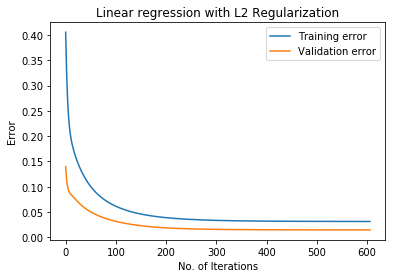

In [329]:
plt.plot([i for i in range(len(train_error_reg))], train_error_reg, label='Training error')
plt.plot([i for i in range(len(valid_error_reg))], valid_error_reg, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Linear regression with L2 Regularization')
plt.xlabel("No. of Iterations")
plt.ylabel("Error")

In [330]:
theta_reg

array([ 0.00981837, -0.11365467,  0.10608048,  0.03051381,  0.0787177 ,
       -0.18381539,  0.23838182,  0.0188294 , -0.28355916,  0.24211033,
       -0.16740516, -0.25913823,  0.08344083, -0.44089261])

In [331]:
pred_y = np.matmul(X[test_set], theta_reg)

In [334]:
print("T and V error: ", train_error_reg[-1], valid_error_reg[-1])

T and V error:  0.03151591027042661 0.014872742192713659


In [335]:
print("RME on test set: ", np.linalg.norm(pred_y-y[test_set])/float(len(pred_y)))

RME on test set:  0.038219159112980454


# L1 regularization

In [336]:
model_reg = linear_model.Lasso(normalize=True, tol=0.000001)

In [337]:
parameters = {'alpha': np.array([(i/500.0) for i in range(1, 2001)])}

In [338]:
train_gridcv  = GridSearchCV(model_reg, parameters, cv=5, verbose=10)

In [339]:
train_gridcv.fit(X[remaining_sample], y[remaining_sample])

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV] alpha=0.002 .....................................................
[CV] ............ alpha=0.002, score=0.5666432843051792, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] .............. alpha=0.002, score=0.63129185987712, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] ............ alpha=0.002, score=0.5906708506933696, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] .......... alpha=0.002, score=-0.16371642784725093, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] ........... alpha=0.002, score=0.17900220078699247, total=   0.0s
[CV] alpha=0.004 .....................................................
[CV] ............ alpha=0.004, score=0.6639194513774931, total=   0.0s
[CV] alpha=0.004 .....................................................
[CV] ......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] .......... alpha=0.016, score=-0.36873890835054707, total=   0.0s
[CV] alpha=0.018 .....................................................
[CV] ............ alpha=0.018, score=0.5701498332398092, total=   0.0s
[CV] alpha=0.018 .....................................................
[CV] ............ alpha=0.018, score=0.4018447504250419, total=   0.0s
[CV] alpha=0.018 .....................................................
[CV] .......... alpha=0.018, score=-0.18509947731396226, total=   0.0s
[CV] alpha=0.018 .....................................................
[CV] ........... alpha=0.018, score=0.05511485938292938, total=   0.0s
[CV] alpha=0.018 .....................................................
[CV] .......... alpha=0.018, score=-0.48747052203971997, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] ............... alpha=0.02, score=0.53643777609837, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] .

[CV] .......... alpha=0.062, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.062 .....................................................
[CV] ........... alpha=0.062, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.062 .....................................................
[CV] .......... alpha=0.062, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.062 .....................................................
[CV] ........... alpha=0.062, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.064 .....................................................
[CV] .......... alpha=0.064, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.064 .....................................................
[CV] .......... alpha=0.064, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.064 .....................................................
[CV] ........... alpha=0.064, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.064 .....................................................
[CV] .

[CV] .......... alpha=0.086, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.086 .....................................................
[CV] .......... alpha=0.086, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.086 .....................................................
[CV] ........... alpha=0.086, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.086 .....................................................
[CV] .......... alpha=0.086, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.086 .....................................................
[CV] ........... alpha=0.086, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.088 .....................................................
[CV] .......... alpha=0.088, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.088 .....................................................
[CV] .......... alpha=0.088, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.088 .....................................................
[CV] .

[CV] ........... alpha=0.126, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.128 .....................................................
[CV] .......... alpha=0.128, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.128 .....................................................
[CV] .......... alpha=0.128, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.128 .....................................................
[CV] ........... alpha=0.128, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.128 .....................................................
[CV] .......... alpha=0.128, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.128 .....................................................
[CV] ........... alpha=0.128, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] ........... alpha=0.13, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] .

[CV] ........... alpha=0.168, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.168 .....................................................
[CV] .......... alpha=0.168, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.168 .....................................................
[CV] ........... alpha=0.168, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.17 ......................................................
[CV] ........... alpha=0.17, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.17 ......................................................
[CV] ........... alpha=0.17, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.17 ......................................................
[CV] ............ alpha=0.17, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.17 ......................................................
[CV] ........... alpha=0.17, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.17 ......................................................
[CV] .

[CV] ........... alpha=0.208, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.21 ......................................................
[CV] ........... alpha=0.21, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.21 ......................................................
[CV] ........... alpha=0.21, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.21 ......................................................
[CV] ............ alpha=0.21, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.21 ......................................................
[CV] ........... alpha=0.21, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.21 ......................................................
[CV] ............ alpha=0.21, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.212 .....................................................
[CV] .......... alpha=0.212, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.212 .....................................................
[CV] .

[CV] .......... alpha=0.254, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.254 .....................................................
[CV] .......... alpha=0.254, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.254 .....................................................
[CV] ........... alpha=0.254, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.254 .....................................................
[CV] .......... alpha=0.254, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.254 .....................................................
[CV] ........... alpha=0.254, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.256 .....................................................
[CV] .......... alpha=0.256, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.256 .....................................................
[CV] .......... alpha=0.256, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.256 .....................................................
[CV] .

[CV] ........... alpha=0.294, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.294 .....................................................
[CV] .......... alpha=0.294, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.294 .....................................................
[CV] ........... alpha=0.294, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.296 .....................................................
[CV] .......... alpha=0.296, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.296 .....................................................
[CV] .......... alpha=0.296, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.296 .....................................................
[CV] ........... alpha=0.296, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.296 .....................................................
[CV] .......... alpha=0.296, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.296 .....................................................
[CV] .

[CV] .......... alpha=0.334, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.334 .....................................................
[CV] ........... alpha=0.334, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.336 .....................................................
[CV] .......... alpha=0.336, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.336 .....................................................
[CV] .......... alpha=0.336, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.336 .....................................................
[CV] ........... alpha=0.336, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.336 .....................................................
[CV] .......... alpha=0.336, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.336 .....................................................
[CV] ........... alpha=0.336, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.338 .....................................................
[CV] .

[CV] ........... alpha=0.374, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.374 .....................................................
[CV] .......... alpha=0.374, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.374 .....................................................
[CV] ........... alpha=0.374, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.376 .....................................................
[CV] .......... alpha=0.376, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.376 .....................................................
[CV] .......... alpha=0.376, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.376 .....................................................
[CV] ........... alpha=0.376, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.376 .....................................................
[CV] .......... alpha=0.376, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.376 .....................................................
[CV] .

[CV] .......... alpha=0.416, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.416 .....................................................
[CV] ........... alpha=0.416, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.416 .....................................................
[CV] .......... alpha=0.416, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.416 .....................................................
[CV] ........... alpha=0.416, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.418 .....................................................
[CV] .......... alpha=0.418, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.418 .....................................................
[CV] .......... alpha=0.418, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.418 .....................................................
[CV] ........... alpha=0.418, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.418 .....................................................
[CV] .

[CV] .......... alpha=0.454, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.454 .....................................................
[CV] ........... alpha=0.454, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.456 .....................................................
[CV] .......... alpha=0.456, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.456 .....................................................
[CV] .......... alpha=0.456, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.456 .....................................................
[CV] ........... alpha=0.456, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.456 .....................................................
[CV] .......... alpha=0.456, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.456 .....................................................
[CV] ........... alpha=0.456, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.458 .....................................................
[CV] .

[CV] ........... alpha=0.494, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.494 .....................................................
[CV] .......... alpha=0.494, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.494 .....................................................
[CV] ........... alpha=0.494, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.496 .....................................................
[CV] .......... alpha=0.496, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.496 .....................................................
[CV] .......... alpha=0.496, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.496 .....................................................
[CV] ........... alpha=0.496, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.496 .....................................................
[CV] .......... alpha=0.496, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.496 .....................................................
[CV] .

[CV] .......... alpha=0.532, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.532 .....................................................
[CV] ........... alpha=0.532, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.532 .....................................................
[CV] .......... alpha=0.532, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.532 .....................................................
[CV] ........... alpha=0.532, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.534 .....................................................
[CV] .......... alpha=0.534, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.534 .....................................................
[CV] .......... alpha=0.534, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.534 .....................................................
[CV] ........... alpha=0.534, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.534 .....................................................
[CV] .

[CV] ........... alpha=0.554, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.556 .....................................................
[CV] .......... alpha=0.556, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.556 .....................................................
[CV] .......... alpha=0.556, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.556 .....................................................
[CV] ........... alpha=0.556, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.556 .....................................................
[CV] .......... alpha=0.556, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.556 .....................................................
[CV] ........... alpha=0.556, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.558 .....................................................
[CV] .......... alpha=0.558, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.558 .....................................................
[CV] .

[CV] ........... alpha=0.598, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.598 .....................................................
[CV] .......... alpha=0.598, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.598 .....................................................
[CV] ........... alpha=0.598, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ............ alpha=0.6, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ............ alpha=0.6, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ............. alpha=0.6, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ............ alpha=0.6, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .

[CV] ........... alpha=0.644, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.646 .....................................................
[CV] .......... alpha=0.646, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.646 .....................................................
[CV] .......... alpha=0.646, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.646 .....................................................
[CV] ........... alpha=0.646, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.646 .....................................................
[CV] .......... alpha=0.646, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.646 .....................................................
[CV] ........... alpha=0.646, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.648 .....................................................
[CV] .......... alpha=0.648, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.648 .....................................................
[CV] .

[CV] ............ alpha=0.69, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.69 ......................................................
[CV] ........... alpha=0.69, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.69 ......................................................
[CV] ............ alpha=0.69, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.692 .....................................................
[CV] .......... alpha=0.692, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.692 .....................................................
[CV] .......... alpha=0.692, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.692 .....................................................
[CV] ........... alpha=0.692, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.692 .....................................................
[CV] .......... alpha=0.692, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.692 .....................................................
[CV] .

[CV] .......... alpha=0.734, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.734 .....................................................
[CV] .......... alpha=0.734, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.734 .....................................................
[CV] ........... alpha=0.734, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.734 .....................................................
[CV] .......... alpha=0.734, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.734 .....................................................
[CV] ........... alpha=0.734, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.736 .....................................................
[CV] .......... alpha=0.736, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.736 .....................................................
[CV] .......... alpha=0.736, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.736 .....................................................
[CV] .

[CV] ........... alpha=0.778, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ........... alpha=0.78, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ........... alpha=0.78, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ............ alpha=0.78, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ........... alpha=0.78, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ............ alpha=0.78, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.782 .....................................................
[CV] .......... alpha=0.782, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.782 .....................................................
[CV] .

[CV] .......... alpha=0.802, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.802 .....................................................
[CV] ........... alpha=0.802, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.804 .....................................................
[CV] .......... alpha=0.804, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.804 .....................................................
[CV] .......... alpha=0.804, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.804 .....................................................
[CV] ........... alpha=0.804, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.804 .....................................................
[CV] .......... alpha=0.804, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.804 .....................................................
[CV] ........... alpha=0.804, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.806 .....................................................
[CV] .

[CV] .......... alpha=0.826, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.826 .....................................................
[CV] ........... alpha=0.826, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.828 .....................................................
[CV] .......... alpha=0.828, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.828 .....................................................
[CV] .......... alpha=0.828, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.828 .....................................................
[CV] ........... alpha=0.828, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.828 .....................................................
[CV] .......... alpha=0.828, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.828 .....................................................
[CV] ........... alpha=0.828, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.83 ......................................................
[CV] .

[CV] ........... alpha=0.87, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.87 ......................................................
[CV] ........... alpha=0.87, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.87 ......................................................
[CV] ............ alpha=0.87, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.87 ......................................................
[CV] ........... alpha=0.87, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.87 ......................................................
[CV] ............ alpha=0.87, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.872 .....................................................
[CV] .......... alpha=0.872, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.872 .....................................................
[CV] .......... alpha=0.872, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.872 .....................................................
[CV] .

[CV] .......... alpha=0.892, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.892 .....................................................
[CV] ........... alpha=0.892, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.894 .....................................................
[CV] .......... alpha=0.894, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.894 .....................................................
[CV] .......... alpha=0.894, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.894 .....................................................
[CV] ........... alpha=0.894, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.894 .....................................................
[CV] .......... alpha=0.894, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.894 .....................................................
[CV] ........... alpha=0.894, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.896 .....................................................
[CV] .

[CV] .......... alpha=0.938, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.938 .....................................................
[CV] .......... alpha=0.938, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.938 .....................................................
[CV] ........... alpha=0.938, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.938 .....................................................
[CV] .......... alpha=0.938, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.938 .....................................................
[CV] ........... alpha=0.938, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.94 ......................................................
[CV] ........... alpha=0.94, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.94 ......................................................
[CV] ........... alpha=0.94, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.94 ......................................................
[CV] .

[CV] .......... alpha=0.982, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.982 .....................................................
[CV] .......... alpha=0.982, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.982 .....................................................
[CV] ........... alpha=0.982, score=-0.9431085663950054, total=   0.0s
[CV] alpha=0.982 .....................................................
[CV] .......... alpha=0.982, score=-0.14020662494579317, total=   0.0s
[CV] alpha=0.982 .....................................................
[CV] ........... alpha=0.982, score=-2.1954699874210926, total=   0.0s
[CV] alpha=0.984 .....................................................
[CV] .......... alpha=0.984, score=-0.05365101075590428, total=   0.0s
[CV] alpha=0.984 .....................................................
[CV] .......... alpha=0.984, score=-0.17278150578312812, total=   0.0s
[CV] alpha=0.984 .....................................................
[CV] .

[CV] ........... alpha=1.014, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.016 .....................................................
[CV] .......... alpha=1.016, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.016 .....................................................
[CV] .......... alpha=1.016, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.016 .....................................................
[CV] ........... alpha=1.016, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.016 .....................................................
[CV] .......... alpha=1.016, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.016 .....................................................
[CV] ........... alpha=1.016, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.018 .....................................................
[CV] .......... alpha=1.018, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.018 .....................................................
[CV] .

[CV] .......... alpha=1.058, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.058 .....................................................
[CV] .......... alpha=1.058, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.058 .....................................................
[CV] ........... alpha=1.058, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.058 .....................................................
[CV] .......... alpha=1.058, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.058 .....................................................
[CV] ........... alpha=1.058, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.06 ......................................................
[CV] ........... alpha=1.06, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.06 ......................................................
[CV] ........... alpha=1.06, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.06 ......................................................
[CV] .

[CV] ........... alpha=1.098, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.1 .......................................................
[CV] ............ alpha=1.1, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.1 .......................................................
[CV] ............ alpha=1.1, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.1 .......................................................
[CV] ............. alpha=1.1, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.1 .......................................................
[CV] ............ alpha=1.1, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.1 .......................................................
[CV] ............. alpha=1.1, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.102 .....................................................
[CV] .......... alpha=1.102, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.102 .....................................................
[CV] .

[CV] .......... alpha=1.142, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.142 .....................................................
[CV] ........... alpha=1.142, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.142 .....................................................
[CV] .......... alpha=1.142, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.142 .....................................................
[CV] ........... alpha=1.142, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.144 .....................................................
[CV] .......... alpha=1.144, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.144 .....................................................
[CV] .......... alpha=1.144, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.144 .....................................................
[CV] ........... alpha=1.144, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.144 .....................................................
[CV] .

[CV] .......... alpha=1.166, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.166 .....................................................
[CV] ........... alpha=1.166, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.168 .....................................................
[CV] .......... alpha=1.168, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.168 .....................................................
[CV] .......... alpha=1.168, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.168 .....................................................
[CV] ........... alpha=1.168, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.168 .....................................................
[CV] .......... alpha=1.168, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.168 .....................................................
[CV] ........... alpha=1.168, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.17 ......................................................
[CV] .

[CV] ........... alpha=1.21, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.21 ......................................................
[CV] ............ alpha=1.21, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.212 .....................................................
[CV] .......... alpha=1.212, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.212 .....................................................
[CV] .......... alpha=1.212, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.212 .....................................................
[CV] ........... alpha=1.212, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.212 .....................................................
[CV] .......... alpha=1.212, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.212 .....................................................
[CV] ........... alpha=1.212, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.214 .....................................................
[CV] .

[CV] ........... alpha=1.234, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.234 .....................................................
[CV] .......... alpha=1.234, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.234 .....................................................
[CV] ........... alpha=1.234, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.236 .....................................................
[CV] .......... alpha=1.236, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.236 .....................................................
[CV] .......... alpha=1.236, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.236 .....................................................
[CV] ........... alpha=1.236, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.236 .....................................................
[CV] .......... alpha=1.236, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.236 .....................................................
[CV] .

[CV] ............ alpha=1.28, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] ........... alpha=1.28, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] ............ alpha=1.28, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.282 .....................................................
[CV] .......... alpha=1.282, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.282 .....................................................
[CV] .......... alpha=1.282, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.282 .....................................................
[CV] ........... alpha=1.282, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.282 .....................................................
[CV] .......... alpha=1.282, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.282 .....................................................
[CV] .

[CV] .......... alpha=1.324, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.324 .....................................................
[CV] ........... alpha=1.324, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.326 .....................................................
[CV] .......... alpha=1.326, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.326 .....................................................
[CV] .......... alpha=1.326, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.326 .....................................................
[CV] ........... alpha=1.326, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.326 .....................................................
[CV] .......... alpha=1.326, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.326 .....................................................
[CV] ........... alpha=1.326, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.328 .....................................................
[CV] .

[CV] ........... alpha=1.348, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.35 ......................................................
[CV] ........... alpha=1.35, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.35 ......................................................
[CV] ........... alpha=1.35, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.35 ......................................................
[CV] ............ alpha=1.35, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.35 ......................................................
[CV] ........... alpha=1.35, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.35 ......................................................
[CV] ............ alpha=1.35, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.352 .....................................................
[CV] .......... alpha=1.352, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.352 .....................................................
[CV] .

[CV] ........... alpha=1.372, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.372 .....................................................
[CV] .......... alpha=1.372, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.372 .....................................................
[CV] ........... alpha=1.372, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.374 .....................................................
[CV] .......... alpha=1.374, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.374 .....................................................
[CV] .......... alpha=1.374, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.374 .....................................................
[CV] ........... alpha=1.374, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.374 .....................................................
[CV] .......... alpha=1.374, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.374 .....................................................
[CV] .

[CV] .......... alpha=1.396, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.396 .....................................................
[CV] ........... alpha=1.396, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.396 .....................................................
[CV] .......... alpha=1.396, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.396 .....................................................
[CV] ........... alpha=1.396, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.398 .....................................................
[CV] .......... alpha=1.398, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.398 .....................................................
[CV] .......... alpha=1.398, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.398 .....................................................
[CV] ........... alpha=1.398, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.398 .....................................................
[CV] .

[CV] ........... alpha=1.418, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.42 ......................................................
[CV] ........... alpha=1.42, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.42 ......................................................
[CV] ........... alpha=1.42, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.42 ......................................................
[CV] ............ alpha=1.42, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.42 ......................................................
[CV] ........... alpha=1.42, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.42 ......................................................
[CV] ............ alpha=1.42, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.422 .....................................................
[CV] .......... alpha=1.422, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.422 .....................................................
[CV] .

[CV] ........... alpha=1.442, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.442 .....................................................
[CV] .......... alpha=1.442, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.442 .....................................................
[CV] ........... alpha=1.442, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.444 .....................................................
[CV] .......... alpha=1.444, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.444 .....................................................
[CV] .......... alpha=1.444, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.444 .....................................................
[CV] ........... alpha=1.444, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.444 .....................................................
[CV] .......... alpha=1.444, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.444 .....................................................
[CV] .

[CV] ........... alpha=1.466, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.466 .....................................................
[CV] .......... alpha=1.466, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.466 .....................................................
[CV] ........... alpha=1.466, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.468 .....................................................
[CV] .......... alpha=1.468, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.468 .....................................................
[CV] .......... alpha=1.468, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.468 .....................................................
[CV] ........... alpha=1.468, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.468 .....................................................
[CV] .......... alpha=1.468, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.468 .....................................................
[CV] .

[CV] .......... alpha=1.512, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.512 .....................................................
[CV] ........... alpha=1.512, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.512 .....................................................
[CV] .......... alpha=1.512, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.512 .....................................................
[CV] ........... alpha=1.512, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.514 .....................................................
[CV] .......... alpha=1.514, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.514 .....................................................
[CV] .......... alpha=1.514, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.514 .....................................................
[CV] ........... alpha=1.514, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.514 .....................................................
[CV] .

[CV] .......... alpha=1.556, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.556 .....................................................
[CV] ........... alpha=1.556, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.556 .....................................................
[CV] .......... alpha=1.556, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.556 .....................................................
[CV] ........... alpha=1.556, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.558 .....................................................
[CV] .......... alpha=1.558, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.558 .....................................................
[CV] .......... alpha=1.558, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.558 .....................................................
[CV] ........... alpha=1.558, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.558 .....................................................
[CV] .

[CV] ............ alpha=1.6, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.6 .......................................................
[CV] ............. alpha=1.6, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.6 .......................................................
[CV] ............ alpha=1.6, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.6 .......................................................
[CV] ............. alpha=1.6, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.602 .....................................................
[CV] .......... alpha=1.602, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.602 .....................................................
[CV] .......... alpha=1.602, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.602 .....................................................
[CV] ........... alpha=1.602, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.602 .....................................................
[CV] .

[CV] .......... alpha=1.624, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.624 .....................................................
[CV] ........... alpha=1.624, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.624 .....................................................
[CV] .......... alpha=1.624, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.624 .....................................................
[CV] ........... alpha=1.624, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.626 .....................................................
[CV] .......... alpha=1.626, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.626 .....................................................
[CV] .......... alpha=1.626, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.626 .....................................................
[CV] ........... alpha=1.626, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.626 .....................................................
[CV] .

[CV] .......... alpha=1.664, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.664 .....................................................
[CV] ........... alpha=1.664, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.666 .....................................................
[CV] .......... alpha=1.666, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.666 .....................................................
[CV] .......... alpha=1.666, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.666 .....................................................
[CV] ........... alpha=1.666, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.666 .....................................................
[CV] .......... alpha=1.666, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.666 .....................................................
[CV] ........... alpha=1.666, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.668 .....................................................
[CV] .

[CV] .......... alpha=1.688, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.688 .....................................................
[CV] ........... alpha=1.688, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.688 .....................................................
[CV] .......... alpha=1.688, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.688 .....................................................
[CV] ........... alpha=1.688, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.69 ......................................................
[CV] ........... alpha=1.69, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.69 ......................................................
[CV] ........... alpha=1.69, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.69 ......................................................
[CV] ............ alpha=1.69, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.69 ......................................................
[CV] .

[CV] ........... alpha=1.728, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.73 ......................................................
[CV] ........... alpha=1.73, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.73 ......................................................
[CV] ........... alpha=1.73, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.73 ......................................................
[CV] ............ alpha=1.73, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.73 ......................................................
[CV] ........... alpha=1.73, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.73 ......................................................
[CV] ............ alpha=1.73, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.732 .....................................................
[CV] .......... alpha=1.732, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.732 .....................................................
[CV] .

[CV] .......... alpha=1.772, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.772 .....................................................
[CV] ........... alpha=1.772, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.772 .....................................................
[CV] .......... alpha=1.772, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.772 .....................................................
[CV] ........... alpha=1.772, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.774 .....................................................
[CV] .......... alpha=1.774, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.774 .....................................................
[CV] .......... alpha=1.774, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.774 .....................................................
[CV] ........... alpha=1.774, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.774 .....................................................
[CV] .

[CV] .......... alpha=1.796, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.796 .....................................................
[CV] ........... alpha=1.796, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.796 .....................................................
[CV] .......... alpha=1.796, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.796 .....................................................
[CV] ........... alpha=1.796, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.798 .....................................................
[CV] .......... alpha=1.798, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.798 .....................................................
[CV] .......... alpha=1.798, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.798 .....................................................
[CV] ........... alpha=1.798, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.798 .....................................................
[CV] .

[CV] .......... alpha=1.838, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.838 .....................................................
[CV] ........... alpha=1.838, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.84 ......................................................
[CV] ........... alpha=1.84, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.84 ......................................................
[CV] ........... alpha=1.84, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.84 ......................................................
[CV] ............ alpha=1.84, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.84 ......................................................
[CV] ........... alpha=1.84, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.84 ......................................................
[CV] ............ alpha=1.84, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.842 .....................................................
[CV] .

[CV] ........... alpha=1.88, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.88 ......................................................
[CV] ............ alpha=1.88, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.88 ......................................................
[CV] ........... alpha=1.88, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.88 ......................................................
[CV] ............ alpha=1.88, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.882 .....................................................
[CV] .......... alpha=1.882, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.882 .....................................................
[CV] .......... alpha=1.882, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.882 .....................................................
[CV] ........... alpha=1.882, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.882 .....................................................
[CV] .

[CV] .......... alpha=1.924, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.924 .....................................................
[CV] ........... alpha=1.924, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.926 .....................................................
[CV] .......... alpha=1.926, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.926 .....................................................
[CV] .......... alpha=1.926, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.926 .....................................................
[CV] ........... alpha=1.926, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.926 .....................................................
[CV] .......... alpha=1.926, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.926 .....................................................
[CV] ........... alpha=1.926, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.928 .....................................................
[CV] .

[CV] ........... alpha=1.968, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.97 ......................................................
[CV] ........... alpha=1.97, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.97 ......................................................
[CV] ........... alpha=1.97, score=-0.17278150578312812, total=   0.0s
[CV] alpha=1.97 ......................................................
[CV] ............ alpha=1.97, score=-0.9431085663950054, total=   0.0s
[CV] alpha=1.97 ......................................................
[CV] ........... alpha=1.97, score=-0.14020662494579317, total=   0.0s
[CV] alpha=1.97 ......................................................
[CV] ............ alpha=1.97, score=-2.1954699874210926, total=   0.0s
[CV] alpha=1.972 .....................................................
[CV] .......... alpha=1.972, score=-0.05365101075590428, total=   0.0s
[CV] alpha=1.972 .....................................................
[CV] .

[CV] ........... alpha=2.012, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.012 .....................................................
[CV] .......... alpha=2.012, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.012 .....................................................
[CV] ........... alpha=2.012, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.014 .....................................................
[CV] .......... alpha=2.014, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.014 .....................................................
[CV] .......... alpha=2.014, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.014 .....................................................
[CV] ........... alpha=2.014, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.014 .....................................................
[CV] .......... alpha=2.014, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.014 .....................................................
[CV] .

[CV] .......... alpha=2.036, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.036 .....................................................
[CV] .......... alpha=2.036, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.036 .....................................................
[CV] ........... alpha=2.036, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.036 .....................................................
[CV] .......... alpha=2.036, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.036 .....................................................
[CV] ........... alpha=2.036, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.038 .....................................................
[CV] .......... alpha=2.038, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.038 .....................................................
[CV] .......... alpha=2.038, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.038 .....................................................
[CV] .

[CV] .......... alpha=2.078, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.078 .....................................................
[CV] ........... alpha=2.078, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ........... alpha=2.08, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ........... alpha=2.08, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ............ alpha=2.08, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ........... alpha=2.08, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.08 ......................................................
[CV] ............ alpha=2.08, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.082 .....................................................
[CV] .

[CV] ........... alpha=2.118, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ........... alpha=2.12, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ........... alpha=2.12, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ............ alpha=2.12, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ........... alpha=2.12, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ............ alpha=2.12, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.122 .....................................................
[CV] .......... alpha=2.122, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.122 .....................................................
[CV] .

[CV] .......... alpha=2.162, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.162 .....................................................
[CV] ........... alpha=2.162, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.164 .....................................................
[CV] .......... alpha=2.164, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.164 .....................................................
[CV] .......... alpha=2.164, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.164 .....................................................
[CV] ........... alpha=2.164, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.164 .....................................................
[CV] .......... alpha=2.164, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.164 .....................................................
[CV] ........... alpha=2.164, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.166 .....................................................
[CV] .

[CV] .......... alpha=2.204, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.204 .....................................................
[CV] ........... alpha=2.204, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.204 .....................................................
[CV] .......... alpha=2.204, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.204 .....................................................
[CV] ........... alpha=2.204, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.206 .....................................................
[CV] .......... alpha=2.206, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.206 .....................................................
[CV] .......... alpha=2.206, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.206 .....................................................
[CV] ........... alpha=2.206, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.206 .....................................................
[CV] .

[CV] .......... alpha=2.246, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.246 .....................................................
[CV] ........... alpha=2.246, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.248 .....................................................
[CV] .......... alpha=2.248, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.248 .....................................................
[CV] .......... alpha=2.248, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.248 .....................................................
[CV] ........... alpha=2.248, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.248 .....................................................
[CV] .......... alpha=2.248, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.248 .....................................................
[CV] ........... alpha=2.248, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.25 ......................................................
[CV] .

[CV] ............ alpha=2.29, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.292 .....................................................
[CV] .......... alpha=2.292, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.292 .....................................................
[CV] .......... alpha=2.292, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.292 .....................................................
[CV] ........... alpha=2.292, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.292 .....................................................
[CV] .......... alpha=2.292, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.292 .....................................................
[CV] ........... alpha=2.292, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.294 .....................................................
[CV] .......... alpha=2.294, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.294 .....................................................
[CV] .

[CV] .......... alpha=2.334, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.334 .....................................................
[CV] .......... alpha=2.334, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.334 .....................................................
[CV] ........... alpha=2.334, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.334 .....................................................
[CV] .......... alpha=2.334, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.334 .....................................................
[CV] ........... alpha=2.334, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.336 .....................................................
[CV] .......... alpha=2.336, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.336 .....................................................
[CV] .......... alpha=2.336, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.336 .....................................................
[CV] .

[CV] ........... alpha=2.378, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.378 .....................................................
[CV] .......... alpha=2.378, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.378 .....................................................
[CV] ........... alpha=2.378, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.38 ......................................................
[CV] ........... alpha=2.38, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.38 ......................................................
[CV] ........... alpha=2.38, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.38 ......................................................
[CV] ............ alpha=2.38, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.38 ......................................................
[CV] ........... alpha=2.38, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.38 ......................................................
[CV] .

[CV] ........... alpha=2.402, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.402 .....................................................
[CV] .......... alpha=2.402, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.402 .....................................................
[CV] ........... alpha=2.402, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.404 .....................................................
[CV] .......... alpha=2.404, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.404 .....................................................
[CV] .......... alpha=2.404, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.404 .....................................................
[CV] ........... alpha=2.404, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.404 .....................................................
[CV] .......... alpha=2.404, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.404 .....................................................
[CV] .

[CV] ........... alpha=2.444, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.444 .....................................................
[CV] .......... alpha=2.444, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.444 .....................................................
[CV] ........... alpha=2.444, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.446 .....................................................
[CV] .......... alpha=2.446, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.446 .....................................................
[CV] .......... alpha=2.446, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.446 .....................................................
[CV] ........... alpha=2.446, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.446 .....................................................
[CV] .......... alpha=2.446, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.446 .....................................................
[CV] .

[CV] .......... alpha=2.468, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.468 .....................................................
[CV] ........... alpha=2.468, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.468 .....................................................
[CV] .......... alpha=2.468, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.468 .....................................................
[CV] ........... alpha=2.468, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.47 ......................................................
[CV] ........... alpha=2.47, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.47 ......................................................
[CV] ........... alpha=2.47, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.47 ......................................................
[CV] ............ alpha=2.47, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.47 ......................................................
[CV] .

[CV] .......... alpha=2.512, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.512 .....................................................
[CV] ........... alpha=2.512, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.512 .....................................................
[CV] .......... alpha=2.512, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.512 .....................................................
[CV] ........... alpha=2.512, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.514 .....................................................
[CV] .......... alpha=2.514, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.514 .....................................................
[CV] .......... alpha=2.514, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.514 .....................................................
[CV] ........... alpha=2.514, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.514 .....................................................
[CV] .

[CV] ........... alpha=2.554, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.556 .....................................................
[CV] .......... alpha=2.556, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.556 .....................................................
[CV] .......... alpha=2.556, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.556 .....................................................
[CV] ........... alpha=2.556, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.556 .....................................................
[CV] .......... alpha=2.556, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.556 .....................................................
[CV] ........... alpha=2.556, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.558 .....................................................
[CV] .......... alpha=2.558, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.558 .....................................................
[CV] .

[CV] ........... alpha=2.58, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ........... alpha=2.58, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ............ alpha=2.58, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ........... alpha=2.58, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ............ alpha=2.58, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.582 .....................................................
[CV] .......... alpha=2.582, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.582 .....................................................
[CV] .......... alpha=2.582, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.582 .....................................................
[CV] .

[CV] ........... alpha=2.622, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.624 .....................................................
[CV] .......... alpha=2.624, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.624 .....................................................
[CV] .......... alpha=2.624, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.624 .....................................................
[CV] ........... alpha=2.624, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.624 .....................................................
[CV] .......... alpha=2.624, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.624 .....................................................
[CV] ........... alpha=2.624, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.626 .....................................................
[CV] .......... alpha=2.626, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.626 .....................................................
[CV] .

[CV] .......... alpha=2.664, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.664 .....................................................
[CV] ........... alpha=2.664, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.666 .....................................................
[CV] .......... alpha=2.666, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.666 .....................................................
[CV] .......... alpha=2.666, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.666 .....................................................
[CV] ........... alpha=2.666, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.666 .....................................................
[CV] .......... alpha=2.666, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.666 .....................................................
[CV] ........... alpha=2.666, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.668 .....................................................
[CV] .

[CV] ........... alpha=2.706, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.708 .....................................................
[CV] .......... alpha=2.708, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.708 .....................................................
[CV] .......... alpha=2.708, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.708 .....................................................
[CV] ........... alpha=2.708, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.708 .....................................................
[CV] .......... alpha=2.708, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.708 .....................................................
[CV] ........... alpha=2.708, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.71 ......................................................
[CV] ........... alpha=2.71, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.71 ......................................................
[CV] .

[CV] ........... alpha=2.75, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.75 ......................................................
[CV] ............ alpha=2.75, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.75 ......................................................
[CV] ........... alpha=2.75, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.75 ......................................................
[CV] ............ alpha=2.75, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.752 .....................................................
[CV] .......... alpha=2.752, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.752 .....................................................
[CV] .......... alpha=2.752, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.752 .....................................................
[CV] ........... alpha=2.752, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.752 .....................................................
[CV] .

[CV] ........... alpha=2.792, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.792 .....................................................
[CV] .......... alpha=2.792, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.792 .....................................................
[CV] ........... alpha=2.792, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.794 .....................................................
[CV] .......... alpha=2.794, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.794 .....................................................
[CV] .......... alpha=2.794, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.794 .....................................................
[CV] ........... alpha=2.794, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.794 .....................................................
[CV] .......... alpha=2.794, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.794 .....................................................
[CV] .

[CV] .......... alpha=2.834, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.834 .....................................................
[CV] ........... alpha=2.834, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.834 .....................................................
[CV] .......... alpha=2.834, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.834 .....................................................
[CV] ........... alpha=2.834, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.836 .....................................................
[CV] .......... alpha=2.836, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.836 .....................................................
[CV] .......... alpha=2.836, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.836 .....................................................
[CV] ........... alpha=2.836, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.836 .....................................................
[CV] .

[CV] .......... alpha=2.878, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.878 .....................................................
[CV] .......... alpha=2.878, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.878 .....................................................
[CV] ........... alpha=2.878, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.878 .....................................................
[CV] .......... alpha=2.878, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.878 .....................................................
[CV] ........... alpha=2.878, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.88 ......................................................
[CV] ........... alpha=2.88, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.88 ......................................................
[CV] ........... alpha=2.88, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.88 ......................................................
[CV] .

[CV] .......... alpha=2.902, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.902 .....................................................
[CV] ........... alpha=2.902, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.902 .....................................................
[CV] .......... alpha=2.902, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.902 .....................................................
[CV] ........... alpha=2.902, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.904 .....................................................
[CV] .......... alpha=2.904, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.904 .....................................................
[CV] .......... alpha=2.904, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.904 .....................................................
[CV] ........... alpha=2.904, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.904 .....................................................
[CV] .

[CV] ........... alpha=2.946, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.948 .....................................................
[CV] .......... alpha=2.948, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.948 .....................................................
[CV] .......... alpha=2.948, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.948 .....................................................
[CV] ........... alpha=2.948, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.948 .....................................................
[CV] .......... alpha=2.948, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.948 .....................................................
[CV] ........... alpha=2.948, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.95 ......................................................
[CV] ........... alpha=2.95, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.95 ......................................................
[CV] .

[CV] ........... alpha=2.97, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.97 ......................................................
[CV] ............ alpha=2.97, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.972 .....................................................
[CV] .......... alpha=2.972, score=-0.05365101075590428, total=   0.0s
[CV] alpha=2.972 .....................................................
[CV] .......... alpha=2.972, score=-0.17278150578312812, total=   0.0s
[CV] alpha=2.972 .....................................................
[CV] ........... alpha=2.972, score=-0.9431085663950054, total=   0.0s
[CV] alpha=2.972 .....................................................
[CV] .......... alpha=2.972, score=-0.14020662494579317, total=   0.0s
[CV] alpha=2.972 .....................................................
[CV] ........... alpha=2.972, score=-2.1954699874210926, total=   0.0s
[CV] alpha=2.974 .....................................................
[CV] .

[CV] .......... alpha=3.014, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.014 .....................................................
[CV] ........... alpha=3.014, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.016 .....................................................
[CV] .......... alpha=3.016, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.016 .....................................................
[CV] .......... alpha=3.016, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.016 .....................................................
[CV] ........... alpha=3.016, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.016 .....................................................
[CV] .......... alpha=3.016, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.016 .....................................................
[CV] ........... alpha=3.016, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.018 .....................................................
[CV] .

[CV] .......... alpha=3.038, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.038 .....................................................
[CV] ........... alpha=3.038, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.04 ......................................................
[CV] ........... alpha=3.04, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.04 ......................................................
[CV] ........... alpha=3.04, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.04 ......................................................
[CV] ............ alpha=3.04, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.04 ......................................................
[CV] ........... alpha=3.04, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.04 ......................................................
[CV] ............ alpha=3.04, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.042 .....................................................
[CV] .

[CV] .......... alpha=3.082, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.082 .....................................................
[CV] .......... alpha=3.082, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.082 .....................................................
[CV] ........... alpha=3.082, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.082 .....................................................
[CV] .......... alpha=3.082, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.082 .....................................................
[CV] ........... alpha=3.082, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.084 .....................................................
[CV] .......... alpha=3.084, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.084 .....................................................
[CV] .......... alpha=3.084, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.084 .....................................................
[CV] .

[CV] ........... alpha=3.126, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.128 .....................................................
[CV] .......... alpha=3.128, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.128 .....................................................
[CV] .......... alpha=3.128, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.128 .....................................................
[CV] ........... alpha=3.128, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.128 .....................................................
[CV] .......... alpha=3.128, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.128 .....................................................
[CV] ........... alpha=3.128, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.13 ......................................................
[CV] ........... alpha=3.13, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.13 ......................................................
[CV] .

[CV] ............ alpha=3.15, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.15 ......................................................
[CV] ........... alpha=3.15, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.15 ......................................................
[CV] ............ alpha=3.15, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.152 .....................................................
[CV] .......... alpha=3.152, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.152 .....................................................
[CV] .......... alpha=3.152, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.152 .....................................................
[CV] ........... alpha=3.152, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.152 .....................................................
[CV] .......... alpha=3.152, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.152 .....................................................
[CV] .

[CV] ........... alpha=3.19, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.19 ......................................................
[CV] ........... alpha=3.19, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.19 ......................................................
[CV] ............ alpha=3.19, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.19 ......................................................
[CV] ........... alpha=3.19, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.19 ......................................................
[CV] ............ alpha=3.19, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.192 .....................................................
[CV] .......... alpha=3.192, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.192 .....................................................
[CV] .......... alpha=3.192, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.192 .....................................................
[CV] .

[CV] ........... alpha=3.23, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.23 ......................................................
[CV] ............ alpha=3.23, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.232 .....................................................
[CV] .......... alpha=3.232, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.232 .....................................................
[CV] .......... alpha=3.232, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.232 .....................................................
[CV] ........... alpha=3.232, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.232 .....................................................
[CV] .......... alpha=3.232, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.232 .....................................................
[CV] ........... alpha=3.232, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.234 .....................................................
[CV] .

[CV] .......... alpha=3.254, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.254 .....................................................
[CV] ........... alpha=3.254, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.254 .....................................................
[CV] .......... alpha=3.254, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.254 .....................................................
[CV] ........... alpha=3.254, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.256 .....................................................
[CV] .......... alpha=3.256, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.256 .....................................................
[CV] .......... alpha=3.256, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.256 .....................................................
[CV] ........... alpha=3.256, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.256 .....................................................
[CV] .

[CV] .......... alpha=3.296, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.296 .....................................................
[CV] ........... alpha=3.296, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.298 .....................................................
[CV] .......... alpha=3.298, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.298 .....................................................
[CV] .......... alpha=3.298, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.298 .....................................................
[CV] ........... alpha=3.298, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.298 .....................................................
[CV] .......... alpha=3.298, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.298 .....................................................
[CV] ........... alpha=3.298, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.3 .......................................................
[CV] .

[CV] ........... alpha=3.32, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.32 ......................................................
[CV] ............ alpha=3.32, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.32 ......................................................
[CV] ........... alpha=3.32, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.32 ......................................................
[CV] ............ alpha=3.32, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.322 .....................................................
[CV] .......... alpha=3.322, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.322 .....................................................
[CV] .......... alpha=3.322, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.322 .....................................................
[CV] ........... alpha=3.322, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.322 .....................................................
[CV] .

[CV] ........... alpha=3.342, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.344 .....................................................
[CV] .......... alpha=3.344, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.344 .....................................................
[CV] .......... alpha=3.344, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.344 .....................................................
[CV] ........... alpha=3.344, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.344 .....................................................
[CV] .......... alpha=3.344, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.344 .....................................................
[CV] ........... alpha=3.344, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.346 .....................................................
[CV] .......... alpha=3.346, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.346 .....................................................
[CV] .

[CV] .......... alpha=3.388, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.388 .....................................................
[CV] .......... alpha=3.388, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.388 .....................................................
[CV] ........... alpha=3.388, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.388 .....................................................
[CV] .......... alpha=3.388, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.388 .....................................................
[CV] ........... alpha=3.388, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.39 ......................................................
[CV] ........... alpha=3.39, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.39 ......................................................
[CV] ........... alpha=3.39, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.39 ......................................................
[CV] .

[CV] ........... alpha=3.41, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.41 ......................................................
[CV] ............ alpha=3.41, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.412 .....................................................
[CV] .......... alpha=3.412, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.412 .....................................................
[CV] .......... alpha=3.412, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.412 .....................................................
[CV] ........... alpha=3.412, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.412 .....................................................
[CV] .......... alpha=3.412, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.412 .....................................................
[CV] ........... alpha=3.412, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.414 .....................................................
[CV] .

[CV] ........... alpha=3.434, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.434 .....................................................
[CV] .......... alpha=3.434, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.434 .....................................................
[CV] ........... alpha=3.434, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.436 .....................................................
[CV] .......... alpha=3.436, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.436 .....................................................
[CV] .......... alpha=3.436, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.436 .....................................................
[CV] ........... alpha=3.436, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.436 .....................................................
[CV] .......... alpha=3.436, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.436 .....................................................
[CV] .

[CV] .......... alpha=3.458, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.458 .....................................................
[CV] .......... alpha=3.458, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.458 .....................................................
[CV] ........... alpha=3.458, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.458 .....................................................
[CV] .......... alpha=3.458, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.458 .....................................................
[CV] ........... alpha=3.458, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.46 ......................................................
[CV] ........... alpha=3.46, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.46 ......................................................
[CV] ........... alpha=3.46, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.46 ......................................................
[CV] .

[CV] ............. alpha=3.5, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.502 .....................................................
[CV] .......... alpha=3.502, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.502 .....................................................
[CV] .......... alpha=3.502, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.502 .....................................................
[CV] ........... alpha=3.502, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.502 .....................................................
[CV] .......... alpha=3.502, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.502 .....................................................
[CV] ........... alpha=3.502, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.504 .....................................................
[CV] .......... alpha=3.504, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.504 .....................................................
[CV] .

[CV] .......... alpha=3.546, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.546 .....................................................
[CV] ........... alpha=3.546, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.548 .....................................................
[CV] .......... alpha=3.548, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.548 .....................................................
[CV] .......... alpha=3.548, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.548 .....................................................
[CV] ........... alpha=3.548, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.548 .....................................................
[CV] .......... alpha=3.548, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.548 .....................................................
[CV] ........... alpha=3.548, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.55 ......................................................
[CV] .

[CV] ........... alpha=3.59, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.59 ......................................................
[CV] ............ alpha=3.59, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.592 .....................................................
[CV] .......... alpha=3.592, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.592 .....................................................
[CV] .......... alpha=3.592, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.592 .....................................................
[CV] ........... alpha=3.592, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.592 .....................................................
[CV] .......... alpha=3.592, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.592 .....................................................
[CV] ........... alpha=3.592, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.594 .....................................................
[CV] .

[CV] ........... alpha=3.634, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.636 .....................................................
[CV] .......... alpha=3.636, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.636 .....................................................
[CV] .......... alpha=3.636, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.636 .....................................................
[CV] ........... alpha=3.636, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.636 .....................................................
[CV] .......... alpha=3.636, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.636 .....................................................
[CV] ........... alpha=3.636, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.638 .....................................................
[CV] .......... alpha=3.638, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.638 .....................................................
[CV] .

[CV] .......... alpha=3.678, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.678 .....................................................
[CV] ........... alpha=3.678, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ........... alpha=3.68, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ........... alpha=3.68, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ............ alpha=3.68, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ........... alpha=3.68, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ............ alpha=3.68, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.682 .....................................................
[CV] .

[CV] .......... alpha=3.702, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.702 .....................................................
[CV] ........... alpha=3.702, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.702 .....................................................
[CV] .......... alpha=3.702, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.702 .....................................................
[CV] ........... alpha=3.702, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.704 .....................................................
[CV] .......... alpha=3.704, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.704 .....................................................
[CV] .......... alpha=3.704, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.704 .....................................................
[CV] ........... alpha=3.704, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.704 .....................................................
[CV] .

[CV] .......... alpha=3.746, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.746 .....................................................
[CV] ........... alpha=3.746, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.746 .....................................................
[CV] .......... alpha=3.746, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.746 .....................................................
[CV] ........... alpha=3.746, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.748 .....................................................
[CV] .......... alpha=3.748, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.748 .....................................................
[CV] .......... alpha=3.748, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.748 .....................................................
[CV] ........... alpha=3.748, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.748 .....................................................
[CV] .

[CV] ............ alpha=3.77, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.77 ......................................................
[CV] ........... alpha=3.77, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.77 ......................................................
[CV] ............ alpha=3.77, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.772 .....................................................
[CV] .......... alpha=3.772, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.772 .....................................................
[CV] .......... alpha=3.772, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.772 .....................................................
[CV] ........... alpha=3.772, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.772 .....................................................
[CV] .......... alpha=3.772, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.772 .....................................................
[CV] .

[CV] .......... alpha=3.814, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.814 .....................................................
[CV] ........... alpha=3.814, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.816 .....................................................
[CV] .......... alpha=3.816, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.816 .....................................................
[CV] .......... alpha=3.816, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.816 .....................................................
[CV] ........... alpha=3.816, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.816 .....................................................
[CV] .......... alpha=3.816, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.816 .....................................................
[CV] ........... alpha=3.816, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.818 .....................................................
[CV] .

[CV] ........... alpha=3.858, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.858 .....................................................
[CV] .......... alpha=3.858, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.858 .....................................................
[CV] ........... alpha=3.858, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.86 ......................................................
[CV] ........... alpha=3.86, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.86 ......................................................
[CV] ........... alpha=3.86, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.86 ......................................................
[CV] ............ alpha=3.86, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.86 ......................................................
[CV] ........... alpha=3.86, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.86 ......................................................
[CV] .

[CV] .......... alpha=3.882, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.882 .....................................................
[CV] ........... alpha=3.882, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.882 .....................................................
[CV] .......... alpha=3.882, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.882 .....................................................
[CV] ........... alpha=3.882, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.884 .....................................................
[CV] .......... alpha=3.884, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.884 .....................................................
[CV] .......... alpha=3.884, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.884 .....................................................
[CV] ........... alpha=3.884, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.884 .....................................................
[CV] .

[CV] .......... alpha=3.928, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.928 .....................................................
[CV] .......... alpha=3.928, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.928 .....................................................
[CV] ........... alpha=3.928, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.928 .....................................................
[CV] .......... alpha=3.928, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.928 .....................................................
[CV] ........... alpha=3.928, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.93 ......................................................
[CV] ........... alpha=3.93, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.93 ......................................................
[CV] ........... alpha=3.93, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.93 ......................................................
[CV] .

[CV] .......... alpha=3.968, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.968 .....................................................
[CV] ........... alpha=3.968, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.968 .....................................................
[CV] .......... alpha=3.968, score=-0.14020662494579317, total=   0.0s
[CV] alpha=3.968 .....................................................
[CV] ........... alpha=3.968, score=-2.1954699874210926, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ........... alpha=3.97, score=-0.05365101075590428, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ........... alpha=3.97, score=-0.17278150578312812, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] ............ alpha=3.97, score=-0.9431085663950054, total=   0.0s
[CV] alpha=3.97 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   37.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-06, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([2.000e-03, 4.000e-03, ..., 3.998e+00, 4.000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [340]:
train_gridcv.best_estimator_

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-06, warm_start=False)

In [341]:
train_gridcv.best_score_

0.36739132997780694

In [342]:
train_gridcv.best_params_

{'alpha': 0.004}

In [343]:
#init
n_reg = len(X_train[1])
m_reg = float(X_train.shape[0])
theta_reg = np.array([1.5 for i in range(n_reg)])
number_of_iterations_reg = 0
train_error_reg = []
valid_error_reg = []
y_hat_reg = np.zeros((len(y), 1))
err_reg = 1000000
alpha = 0.004
learning_rate_reg = 0.01
    
#Gradient Descent
while True:
#         print ("=========="*10)
#         print ("Iteration: ", number_of_iterations)

    prev_theta = theta_reg[:]

#         print ("Previous theta : ", prev_theta)
    number_of_iterations_reg += 1

    # Updating all thetas simultaneously
    for i in range(n_reg):
        theta_reg[i] = theta_reg[i] - (learning_rate_reg/m_reg)*input_func(X_train, y_train, theta_reg, i) + alpha/m_reg


#         print("New theta_0 :", theta)

    # Training Error
    y_hat_reg = np.matmul(X_train, theta_reg)
    new_err = np.linalg.norm(y_hat_reg-y_train)/m_reg
    train_error_reg.append(new_err)
#         print ("Training Error: ", new_err)


    # Validation error
    y_hat_v = np.matmul(X_test, theta_reg)
    err_valid = np.linalg.norm(y_hat_v-y_test)/m_reg
    valid_error_reg.append(err_valid)

    if (err_reg-new_err) <= 0.000001:
        break
    err_reg = new_err

Text(0,0.5,'Error')

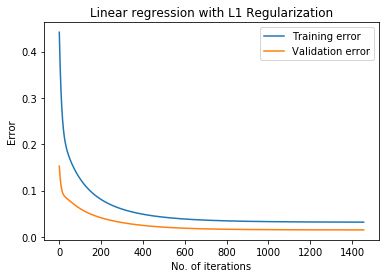

In [344]:
plt.plot([i for i in range(len(train_error_reg))], train_error_reg, label='Training error')
plt.plot([i for i in range(len(valid_error_reg))], valid_error_reg, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Linear regression with L1 Regularization')
plt.xlabel("No. of iterations")
plt.ylabel("Error")

In [345]:
theta_reg

array([ 0.0102997 , -0.10646155,  0.09355248,  0.04771993,  0.07681672,
       -0.14493919,  0.25899737,  0.02256986, -0.22902997,  0.23640384,
       -0.18041106, -0.25242193,  0.08767403, -0.43394991])

In [346]:
pred_y = np.matmul(X[test_set], theta_reg)

In [347]:
print("T and V error: ", train_error_reg[-1], valid_error_reg[-1])

T and V error:  0.03171727163085023 0.014966246713972783


In [348]:
print("RME on test set: ", np.linalg.norm(pred_y-y[test_set])/float(len(pred_y)))

RME on test set:  0.03807932644253985
